In [ ]:
#anything older than 540/728 is a faulty table. Correct tables start with corrected_
# Define the new labels dictionary
newlabels_corrected = {
  "ATTENTION": 0, "MOTOR": 1,  "EXECUTIVE": 2,
    "SENSORY": 3 , "BASALGANGLIA": 4, "THALAMUS": 5
}
newlabels = {
  "ATTENTION": 0, "MOTOR": 1,  "EXECUTIVE": 2,
    "SENSORY": 3, 4: "BASALGANGLIA", 5: "THALAMUS"
}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# # Define the new labels dictionary
# newlabels_corrected = {
#     "DMN": 0, "ATTENTION": 1, "MOTOR": 2, "VISUAL": 3, "EXECUTIVE": 4,
#     "SENSORY": 5, "SALIENCE": 6, "AUDITORY": 7, "COGNITIVE": 8, "BASALGANGLIA": 9,
#     "LANG": 10, "CEREBELLAR": 11, "HYPOTHALAMUS": 12, "THALAMUS": 13, "OTHERS": 14
# }
# newlabels = {
#     "DMN": 0, "ATTENTION": 1, "MOTOR": 2, "VISUAL": 3, "EXECUTIVE": 4,
#     "SENSORY": 5, "SALIENCE": 6, "AUDITORY": 7, "COGNITIVE": 8, "BASALGANGLIA": 9,
#     "LANG": 10, "CEREBELLAR": 11, "HYPOTHALAMUS": 12, "THALAMUS": 13, "OTHERS": 14
# }

def compute_new_connectivity_matrix(data, column_name):
    """Compute the connectivity matrix for the given data and column using the new approach."""
    # Create an empty matrix with zeros
    matrix = pd.DataFrame(0, index=newlabels_corrected.keys(), columns=newlabels_corrected.keys(), dtype=int)

    # For each unique item in the specified column (e.g., ordered_pair or ordered_triplet)
    for item in data[column_name].unique():
        # Filter data for the current item
        filtered_data = data[data[column_name] == item]
        parents = filtered_data['parent_network'].unique()

        # Update the matrix with co-occurrence counts
        for i in parents:
            for j in parents:
                if i != j:
                    matrix.at[i, j] += 1

    return matrix

In [ ]:
def compute_new_connectivity_matrix(data, column_name):
    """Compute the connectivity matrix for the given data and column using the new approach."""
    # Create an empty matrix with zeros
    matrix = pd.DataFrame(0, index=newlabels_corrected.keys(), columns=newlabels_corrected.keys(), dtype=int)

    # For each unique item in the specified column (e.g., ordered_pair or ordered_triplet)
    for item in data[column_name].unique():
        # count+=1
        # Filter data for the current item
        filtered_data = data[data[column_name] == item]

        # Count occurrences of each parent
        parent_counts = filtered_data['parent_network'].value_counts()
        # if len(parent_counts>1):
        #   print(item)
        #   print("second part")
        #   print(parent_counts)
        #   print("hello")


        # Update the matrix with the product of occurrences of pairs of different parents
        for i in parent_counts.index:
            for j in parent_counts.index:
                if i != j:
                    matrix.at[i, j] += parent_counts[i] * parent_counts[j]
                    # matrix.at[j, i] += parent_counts[i] * parent_counts[j]
                    # if i == "COGNITIVE" and j == "LANG":
                      # print(parent_counts[i],i,parent_counts[j],j)
                    # if i == "COGNITIVE" and j == "LANG":
                      # print(matrix.at[i,j],matrix.at[j,i])


    return matrix


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# # Define the new labels dictionary
# newlabels_corrected = {
#     "DMN": 0, "ATTENTION": 1, "MOTOR": 2, "VISUAL": 3, "EXECUTIVE": 4,
#     "SENSORY": 5, "SALIENCE": 6, "AUDITORY": 7, "COGNITIVE": 8, "BASALGANGLIA": 9,
#     "LANG": 10, "CEREBELLAR": 11, "HYPOTHALAMUS": 12, "THALAMUS": 13, "OTHERS": 14
# }
# newlabels = {
#     "DMN": 0, "ATTENTION": 1, "MOTOR": 2, "VISUAL": 3, "EXECUTIVE": 4,
#     "SENSORY": 5, "SALIENCE": 6, "AUDITORY": 7, "COGNITIVE": 8, "BASALGANGLIA": 9,
#     "LANG": 10, "CEREBELLAR": 11, "HYPOTHALAMUS": 12, "THALAMUS": 13, "OTHERS": 14
# }

def compute_new_connectivity_matrix_all_networks(data, column_name):
    """Compute the connectivity matrix for the given data and column using the new approach."""
    # Create an empty matrix with zeros
    matrix = pd.DataFrame(0, index=newlabels_corrected.keys(), columns=newlabels_corrected.keys(), dtype=int)

    # For each unique item in the specified column (e.g., ordered_pair or ordered_triplet)
    for item in data[column_name].unique():
        # Filter data for the current item
        filtered_data = data[data[column_name] == item]
        parents = filtered_data['parent_network'].unique()

        # Update the matrix with co-occurrence counts
        print(parents)
        for i in parents:
            for j in parents:
                if i != j:
                    print(i,j)
                    matrix.at[i, j] += 1

    return matrix

In [ ]:
    print(newlabels_corrected)

{'DMN': 0, 'ATTENTION': 1, 'MOTOR': 2, 'VISUAL': 3, 'EXECUTIVE': 4, 'SENSORY': 5, 'SALIENCE': 6, 'AUDITORY': 7, 'COGNITIVE': 8, 'BASALGANGLIA': 9, 'LANG': 10, 'CEREBELLAR': 11, 'HYPOTHALAMUS': 12, 'THALAMUS': 13, 'OTHERS': 14}


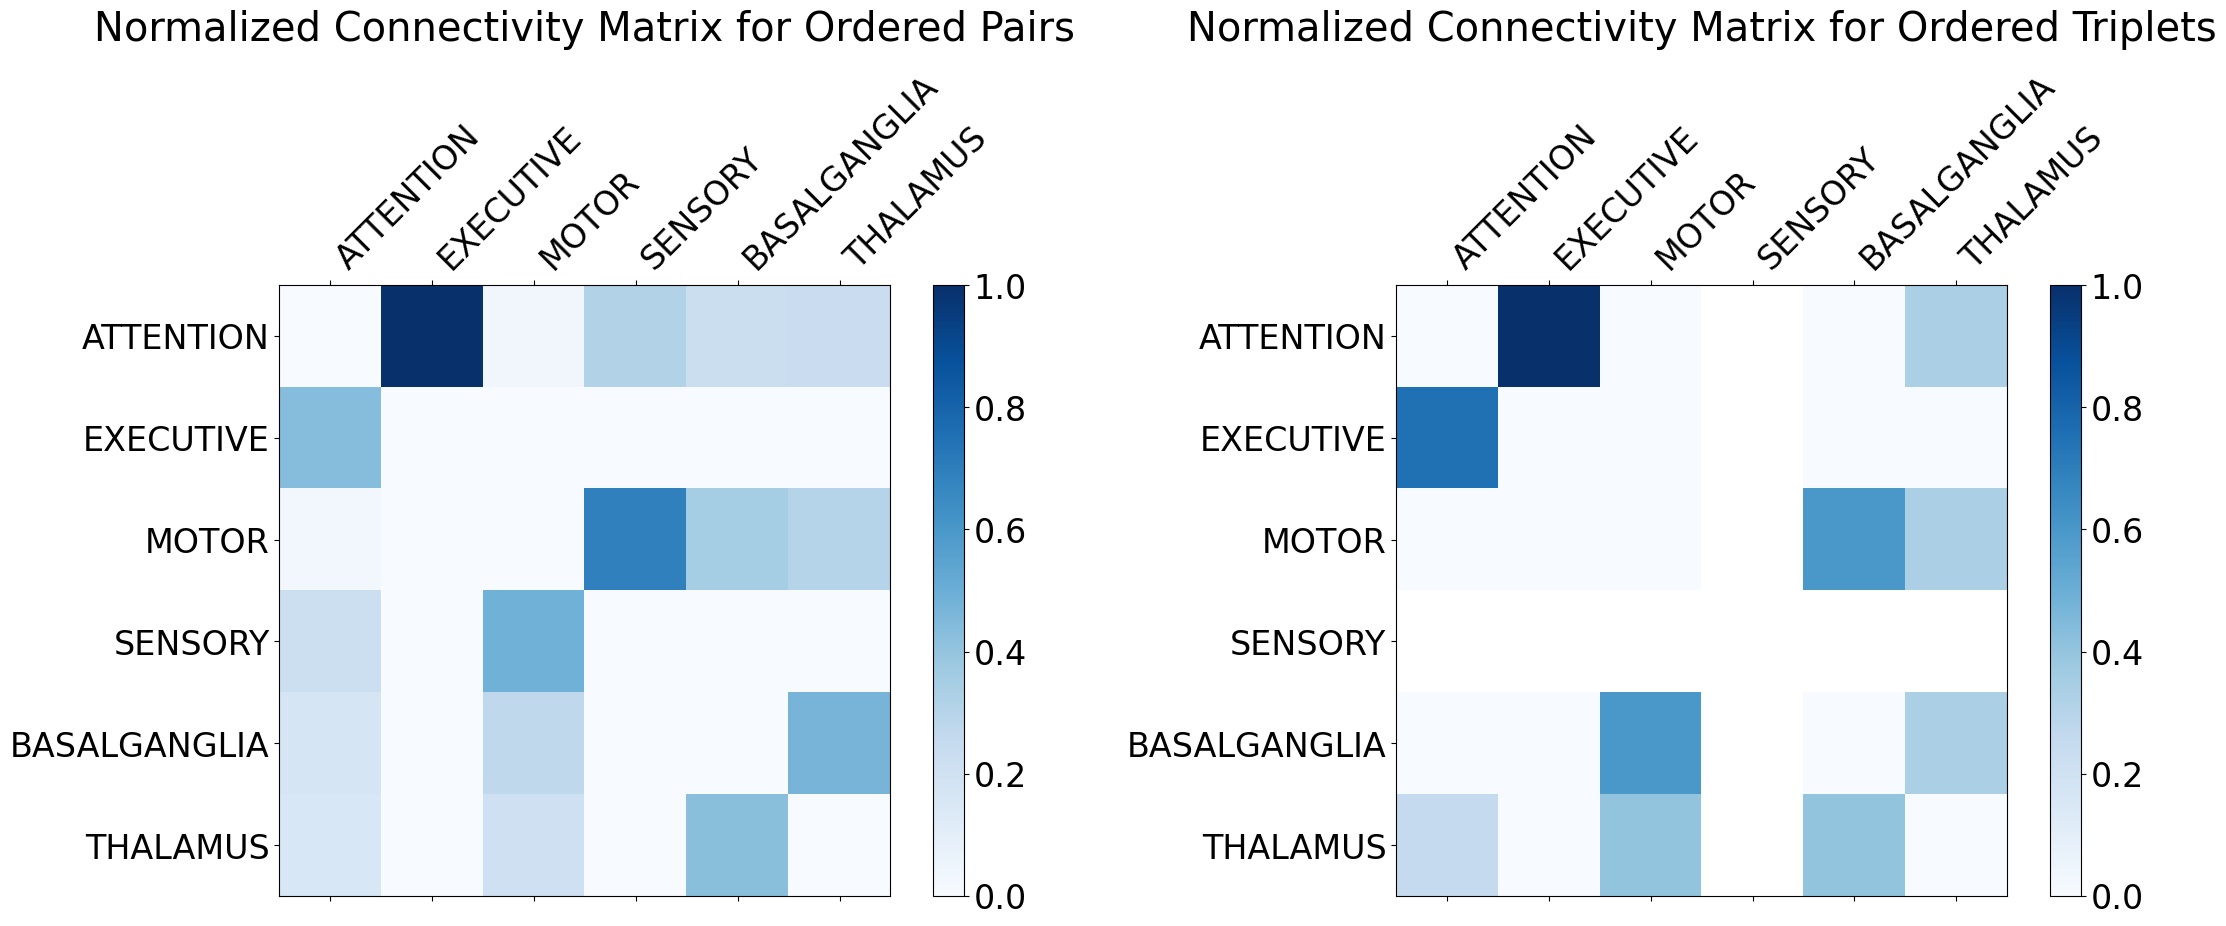

In [ ]:
# Load the data from the provided CSV file
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_789_motsenexeattbastha_ICA_progressive_strict_assymmetry.csv")
# # Append "-" right after "HYPOTHALAMUS" in the names
# data_new_5.iloc[:, -1] = data_new_5.iloc[:, -1].apply(lambda x: x[:12] + "-NONE" + x[12:] if "HYPOTHALAMUS" in x else x)
#Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs and triplets of the first two and three symbols respectively
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)
data_new_5['ordered_triplet'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str) + "-" + data_new_5.iloc[:, 2].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Compute connectivity matrix for ordered triplets using the new approach
matrix_ordered_triplet_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_triplet')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_triplet_new_5 = matrix_ordered_triplet_new_5.div(matrix_ordered_triplet_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_triplet_new_5 = normalized_matrix_ordered_triplet_new_5.div(normalized_matrix_ordered_triplet_new_5.sum(axis=0), axis=1)

# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)


# Increase font size
plt.rcParams.update({'font.size': 24})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='Blues')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)

plt.show()

In [ ]:
#Create a dendrogram for normalized_matrix_ordered_pair_new_5
normalized_matrix_ordered_pair_new_5

ATTENTION  EXECUTIVE     MOTOR   SENSORY  BASALGANGLIA  THALAMUS
ATTENTION      0.000000        1.0  0.031492  0.311111      0.223235  0.227519
EXECUTIVE      0.431507        0.0  0.000000  0.000000      0.000000  0.000000
MOTOR          0.030822        0.0  0.000000  0.688889      0.353075  0.302275
SENSORY        0.215753        0.0  0.488128  0.000000      0.000000  0.000000
BASALGANGLIA   0.167808        0.0  0.271182  0.000000      0.000000  0.470206
THALAMUS       0.154110        0.0  0.209198  0.000000      0.423690  0.000000

In [ ]:
# prompt: Using dataframe normalized_matrix_ordered_pair_new_5: Make the matrix symmetric by take its average with its transpose and store it in a new varirable

new_matrix = (normalized_matrix_ordered_pair_new_5 + normalized_matrix_ordered_pair_new_5.T) / 2


In [ ]:
# prompt: Make every value the (1 - value) and print the new matrix in a new variable

new_matrix = (1 - new_matrix)
print(new_matrix)

              ATTENTION     MOTOR  EXECUTIVE   SENSORY  BASALGANGLIA  THALAMUS
ATTENTION      1.000000  0.968843   0.284247  0.736568      0.804479  0.809186
MOTOR          0.968843  1.000000   1.000000  0.411492      0.687871  0.744264
EXECUTIVE      0.284247  1.000000   1.000000  1.000000      1.000000  1.000000
SENSORY        0.736568  0.411492   1.000000  1.000000      1.000000  1.000000
BASALGANGLIA   0.804479  0.687871   1.000000  1.000000      1.000000  0.553052
THALAMUS       0.809186  0.744264   1.000000  1.000000      0.553052  1.000000


In [ ]:
# prompt: Make the matrix's diagonal elements 0

# new_matrix = (new_matrix + new_matrix.T) / 2
# new_matrix = (1 - new_matrix)
new_matrix.values[np.diag_indices_from(new_matrix)] = 0
new_matrix

ATTENTION     MOTOR  EXECUTIVE   SENSORY  BASALGANGLIA  THALAMUS
ATTENTION      0.000000  0.968843   0.284247  0.736568      0.804479  0.809186
MOTOR          0.968843  0.000000   1.000000  0.411492      0.687871  0.744264
EXECUTIVE      0.284247  1.000000   0.000000  1.000000      1.000000  1.000000
SENSORY        0.736568  0.411492   1.000000  0.000000      1.000000  1.000000
BASALGANGLIA   0.804479  0.687871   1.000000  1.000000      0.000000  0.553052
THALAMUS       0.809186  0.744264   1.000000  1.000000      0.553052  0.000000

<ipython-input-52-8f4bfa48e0d8>:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(new_matrix, method='complete')


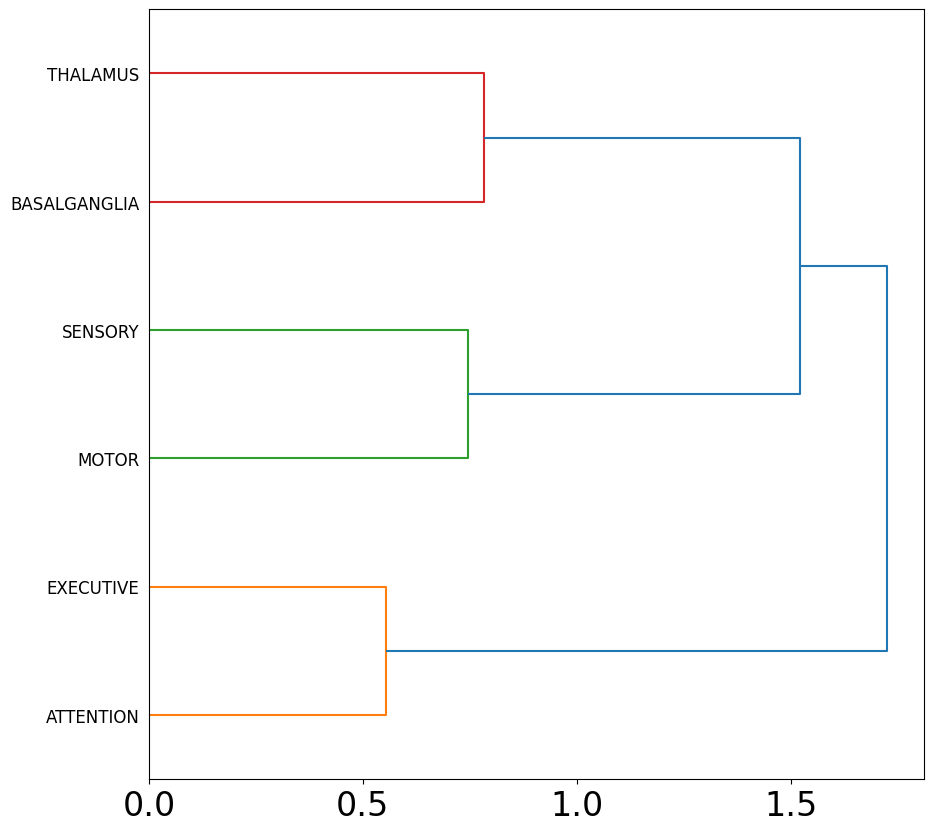

In [ ]:
# prompt: Create a dendrogram with the new matrix

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix using complete linkage
linkage_matrix = linkage(new_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 10))
dendrogram(linkage_matrix, labels=new_matrix.index, orientation='right')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
data_matrix = [[0,0.8,0.9],[0.8,0,0.2],[0.9,0.2,0]]
model = AgglomerativeClustering(metric='precomputed', n_clusters=2, linkage='complete').fit(normalized_matrix_ordered_pair_new_5)
print(model.labels_)

[0 1 1 0 0 0]


              ATTENTION     MOTOR  EXECUTIVE   SENSORY  BASALGANGLIA  THALAMUS
ATTENTION      0.000000  0.031492        1.0  0.311111      0.223235  0.227519
MOTOR          0.030822  0.000000        0.0  0.688889      0.353075  0.302275
EXECUTIVE      0.431507  0.000000        0.0  0.000000      0.000000  0.000000
SENSORY        0.215753  0.488128        0.0  0.000000      0.000000  0.000000
BASALGANGLIA   0.167808  0.271182        0.0  0.000000      0.000000  0.470206
THALAMUS       0.154110  0.209198        0.0  0.000000      0.423690  0.000000
              ATTENTION     MOTOR  EXECUTIVE   SENSORY  BASALGANGLIA  THALAMUS
ATTENTION      0.010000  0.031492       1.00  0.311111      0.223235  0.227519
MOTOR          0.030822  0.010000       0.01  0.688889      0.353075  0.302275
EXECUTIVE      0.431507  0.010000       0.01  0.010000      0.010000  0.010000
SENSORY        0.215753  0.488128       0.01  0.010000      0.010000  0.010000
BASALGANGLIA   0.167808  0.271182       0.01  0.0100

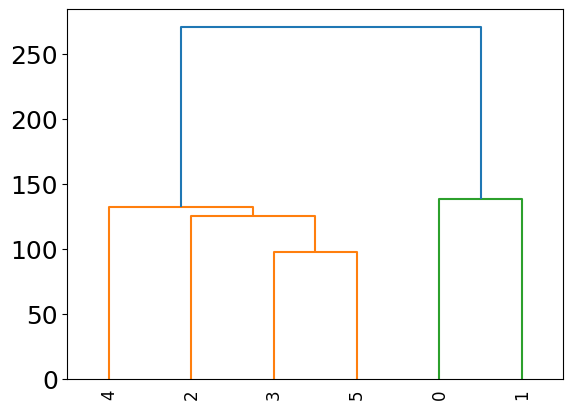

In [ ]:
# prompt: Using dataframe normalized_matrix_ordered_pair_new_5: dendrogram based on the inverse of the values of the matrix. If the value was Nan, handle it. The dendrogram should be based on all pairs of distances, not just to the last column.

import numpy as np
import scipy.cluster.hierarchy as hierarchy
import matplotlib.pyplot as plt

# Calculate the distance matrix
distance_matrix = np.zeros((normalized_matrix_ordered_pair_new_5.shape[0], normalized_matrix_ordered_pair_new_5.shape[0]))
for i in range(normalized_matrix_ordered_pair_new_5.shape[0]):
  for j in range(normalized_matrix_ordered_pair_new_5.shape[0]):
    if np.isnan(normalized_matrix_ordered_pair_new

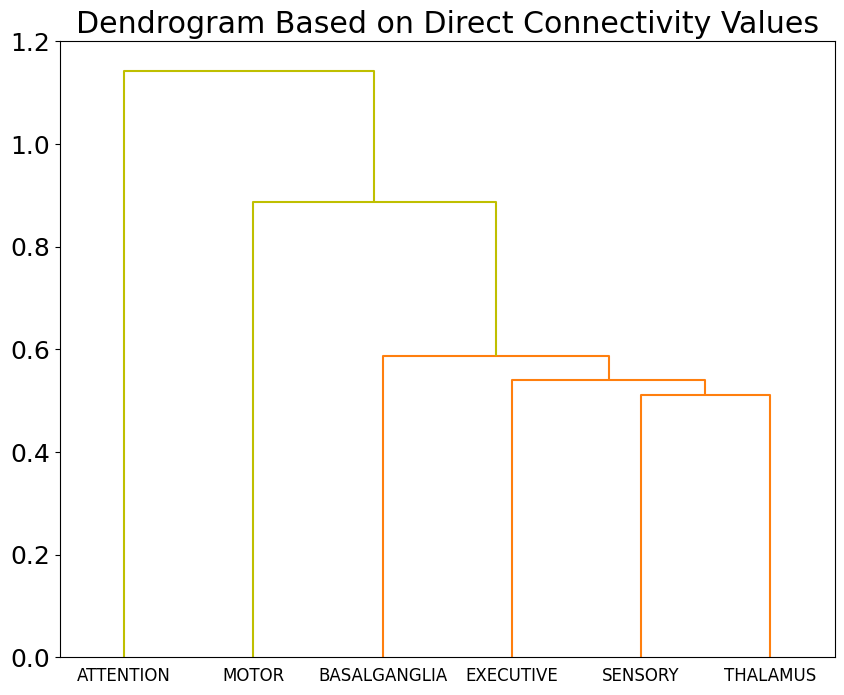

In [ ]:
# Starting from scratch to create a dendrogram that accurately reflects the connectivity values
import scipy.cluster.hierarchy as sch
# Use the normalized matrix directly for the dendrogram
dendrogram_data_direct = normalized_matrix_ordered_pair_new_5.fillna(1)

# Inverting the values for distance calculation (since higher values indicate closer relationship)
# Using 1 - value, to ensure that higher connectivity values result in shorter distances
distance_data_direct = 1-dendrogram_data_direct

# Compute the linkage using this direct distance data
linkage_direct = sch.linkage(sch.distance.pdist(distance_data_direct), method='average')

# Create a new figure for the dendrogram
fig, ax = plt.subplots(figsize=(10, 8))

# Generate and plot the dendrogram using the direct distance data
dendro_direct = sch.dendrogram(linkage_direct, labels=distance_data_direct.columns, ax=ax, above_threshold_color='y', orientation='top')
ax.set_title("Dendrogram Based on Direct Connectivity Values")

plt.show()

In [ ]:
# Define the new labels dictionary
newlabels_corrected = {
  "ATTENTION": 0, "EXECUTIVE": 1,  "MOTOR": 2,
    "SENSORY": 3 , "BASALGANGLIA": 4, "THALAMUS": 5
}
newlabels = {
  "ATTENTION": 0, "EXECUTIVE": 1,  "MOTOR": 2,
    "SENSORY": 3, 4: "BASALGANGLIA", 5: "THALAMUS"
}

In [ ]:
# prompt: Create new_labels_corrected again, but this time, with different ordered elements

newlabels_corrected = {
  "ATTENTION": 0, "SENSORY": 1,  "MOTOR": 2,
    "BASALGANGLIA": 3, "EXECUTIVE": 4, "THALAMUS": 5
}


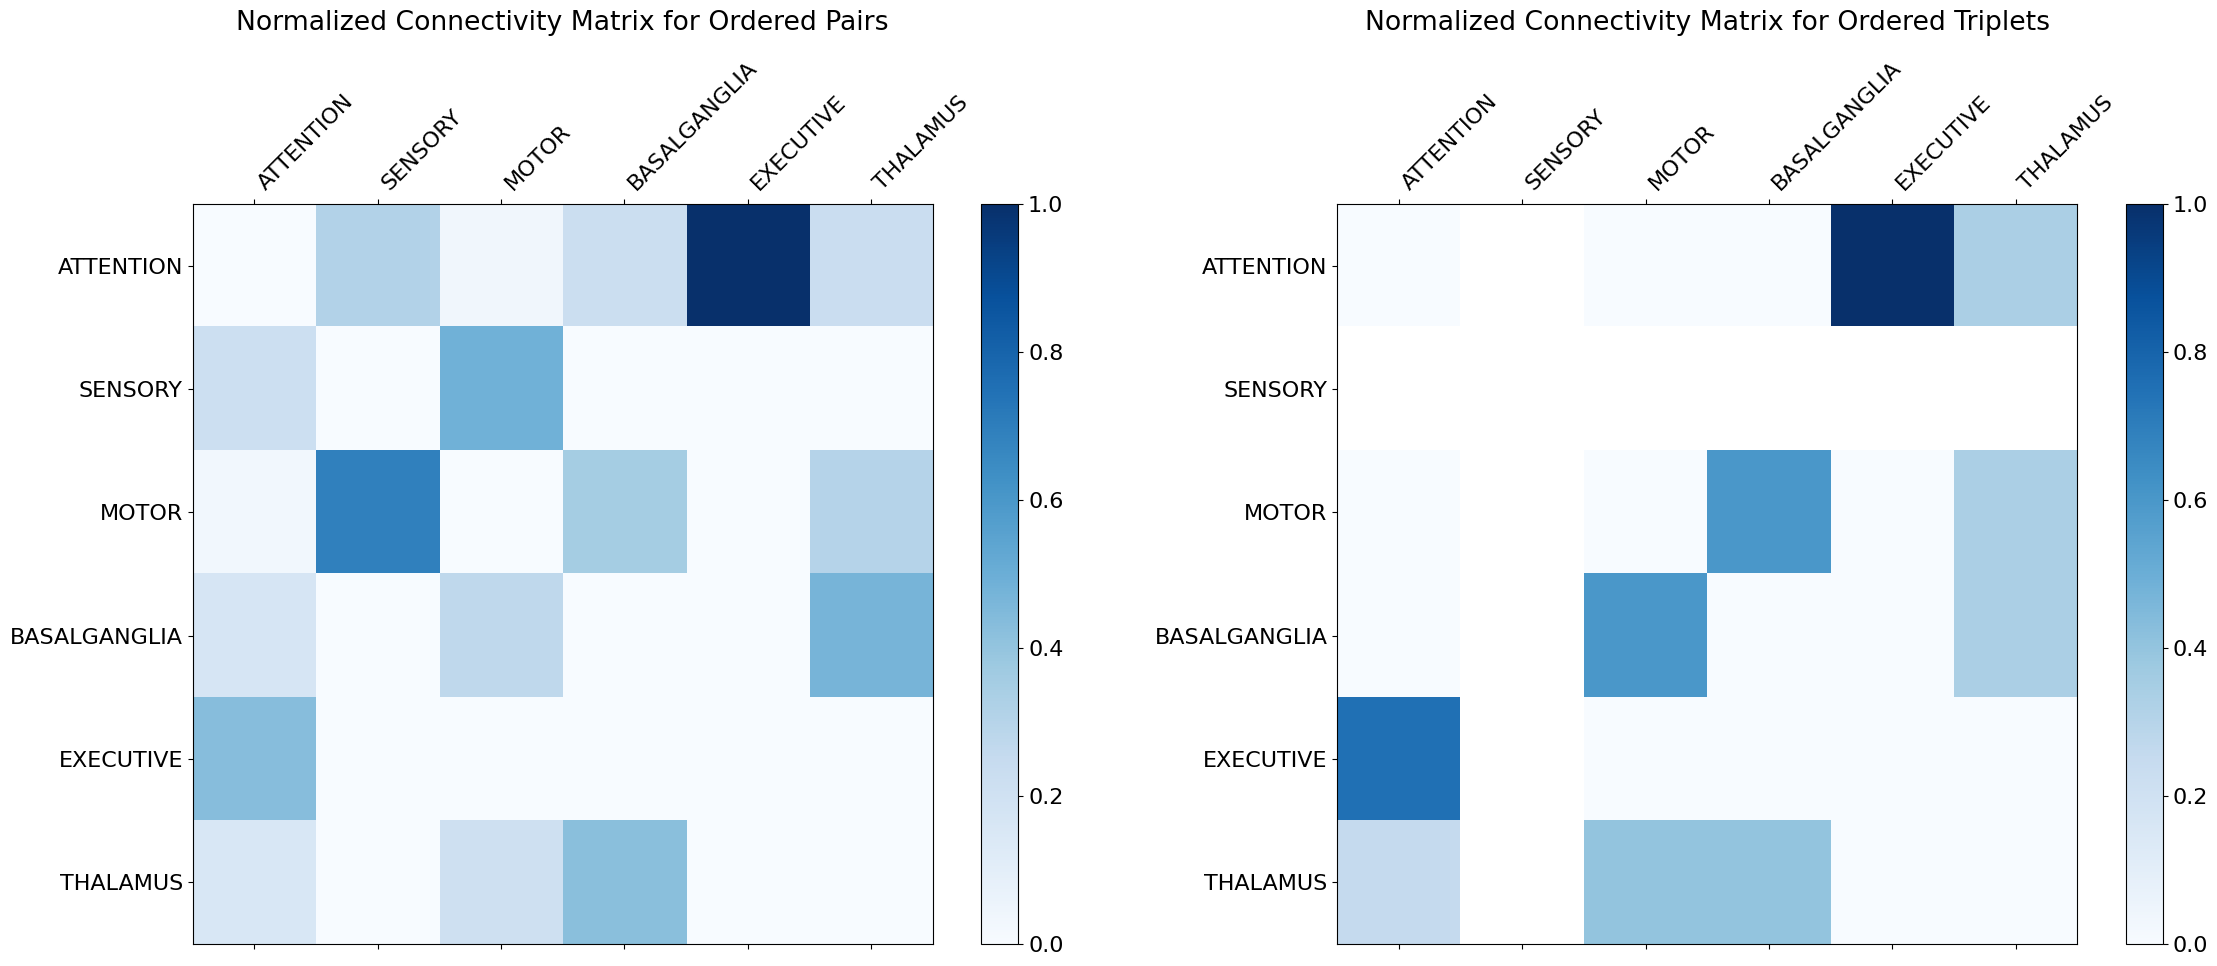

In [ ]:
import pandas as pd
# Load the data from the provided CSV file
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_789_motsenexeattbastha_ICA_progressive_strict_assymmetry.csv")
# # Append "-" right after "HYPOTHALAMUS" in the names
# data_new_5.iloc[:, -1] = data_new_5.iloc[:, -1].apply(lambda x: x[:12] + "-NONE" + x[12:] if "HYPOTHALAMUS" in x else x)
#Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs and triplets of the first two and three symbols respectively
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)
data_new_5['ordered_triplet'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str) + "-" + data_new_5.iloc[:, 2].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Compute connectivity matrix for ordered triplets using the new approach
matrix_ordered_triplet_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_triplet')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_triplet_new_5 = matrix_ordered_triplet_new_5.div(matrix_ordered_triplet_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_triplet_new_5 = normalized_matrix_ordered_triplet_new_5.div(normalized_matrix_ordered_triplet_new_5.sum(axis=0), axis=1)

# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)


# Increase font size
plt.rcParams.update({'font.size': 16})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='Blues')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)

plt.show()


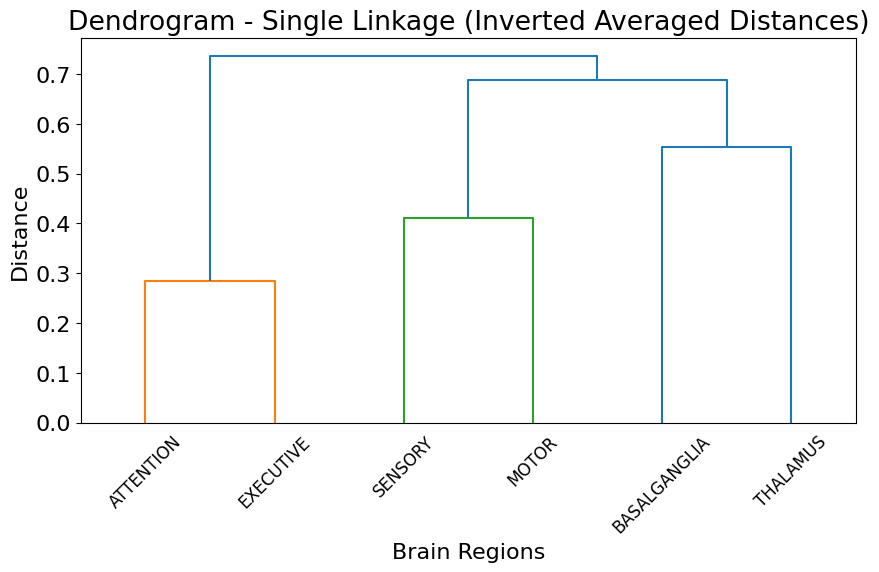

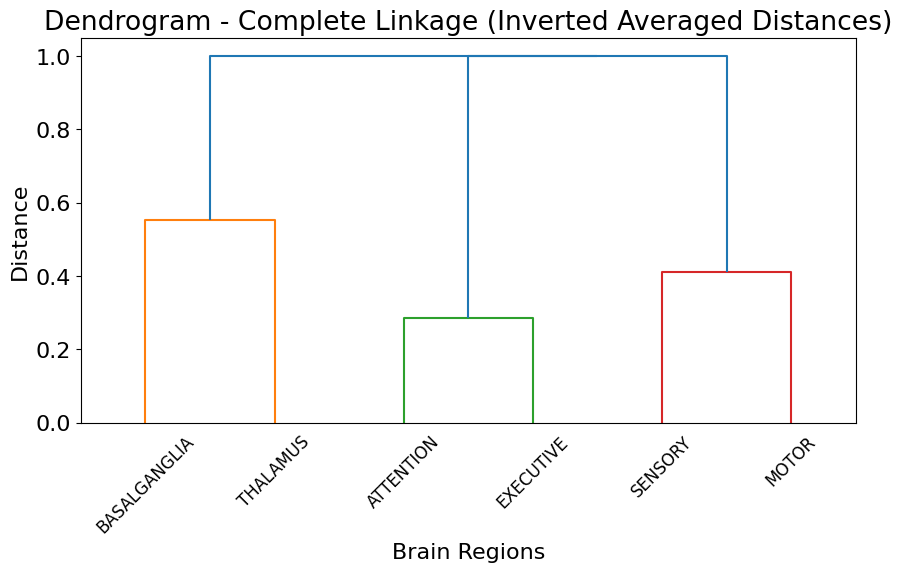

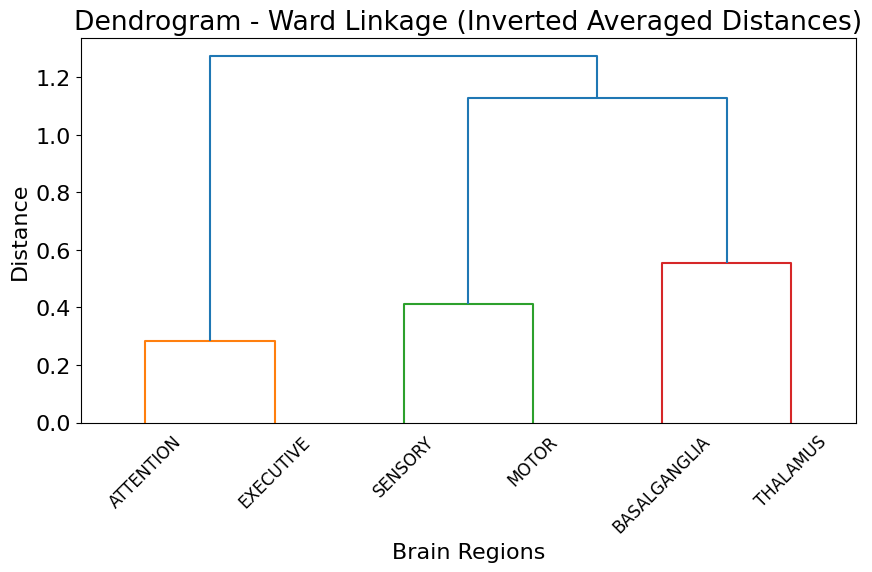

In [ ]:
# Function to plot dendrogram with brain region labels
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=45)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')


# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]

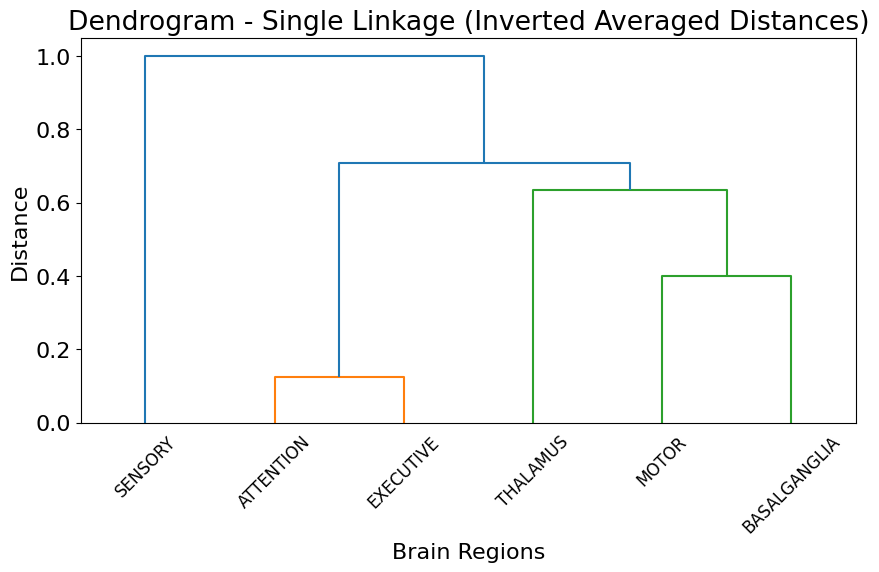

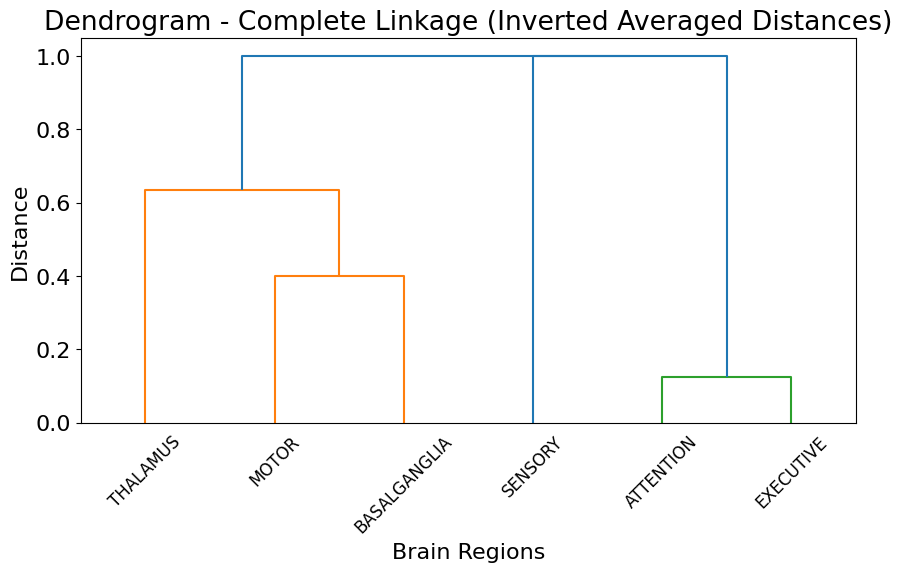

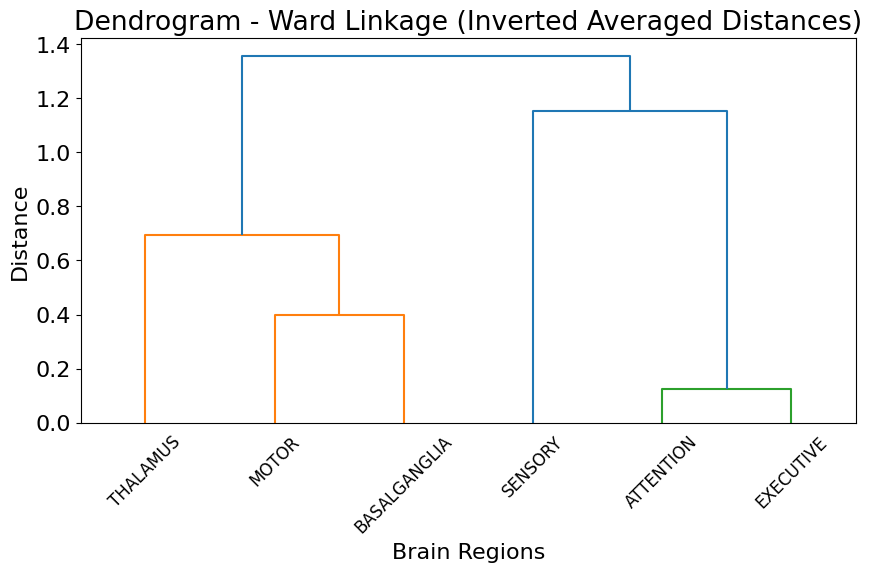

In [ ]:
# Function to plot dendrogram with brain region labels
brain_regions_df_nan = normalized_matrix_ordered_triplet_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
#Replace Nan with 0
brain_regions_df = brain_regions_df_nan.fillna(0)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=45)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')


# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_triplet= leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_triplet= sym_brain_regions_df.iloc[order_avg_inverted_complete_triplet, order_avg_inverted_complete_triplet]

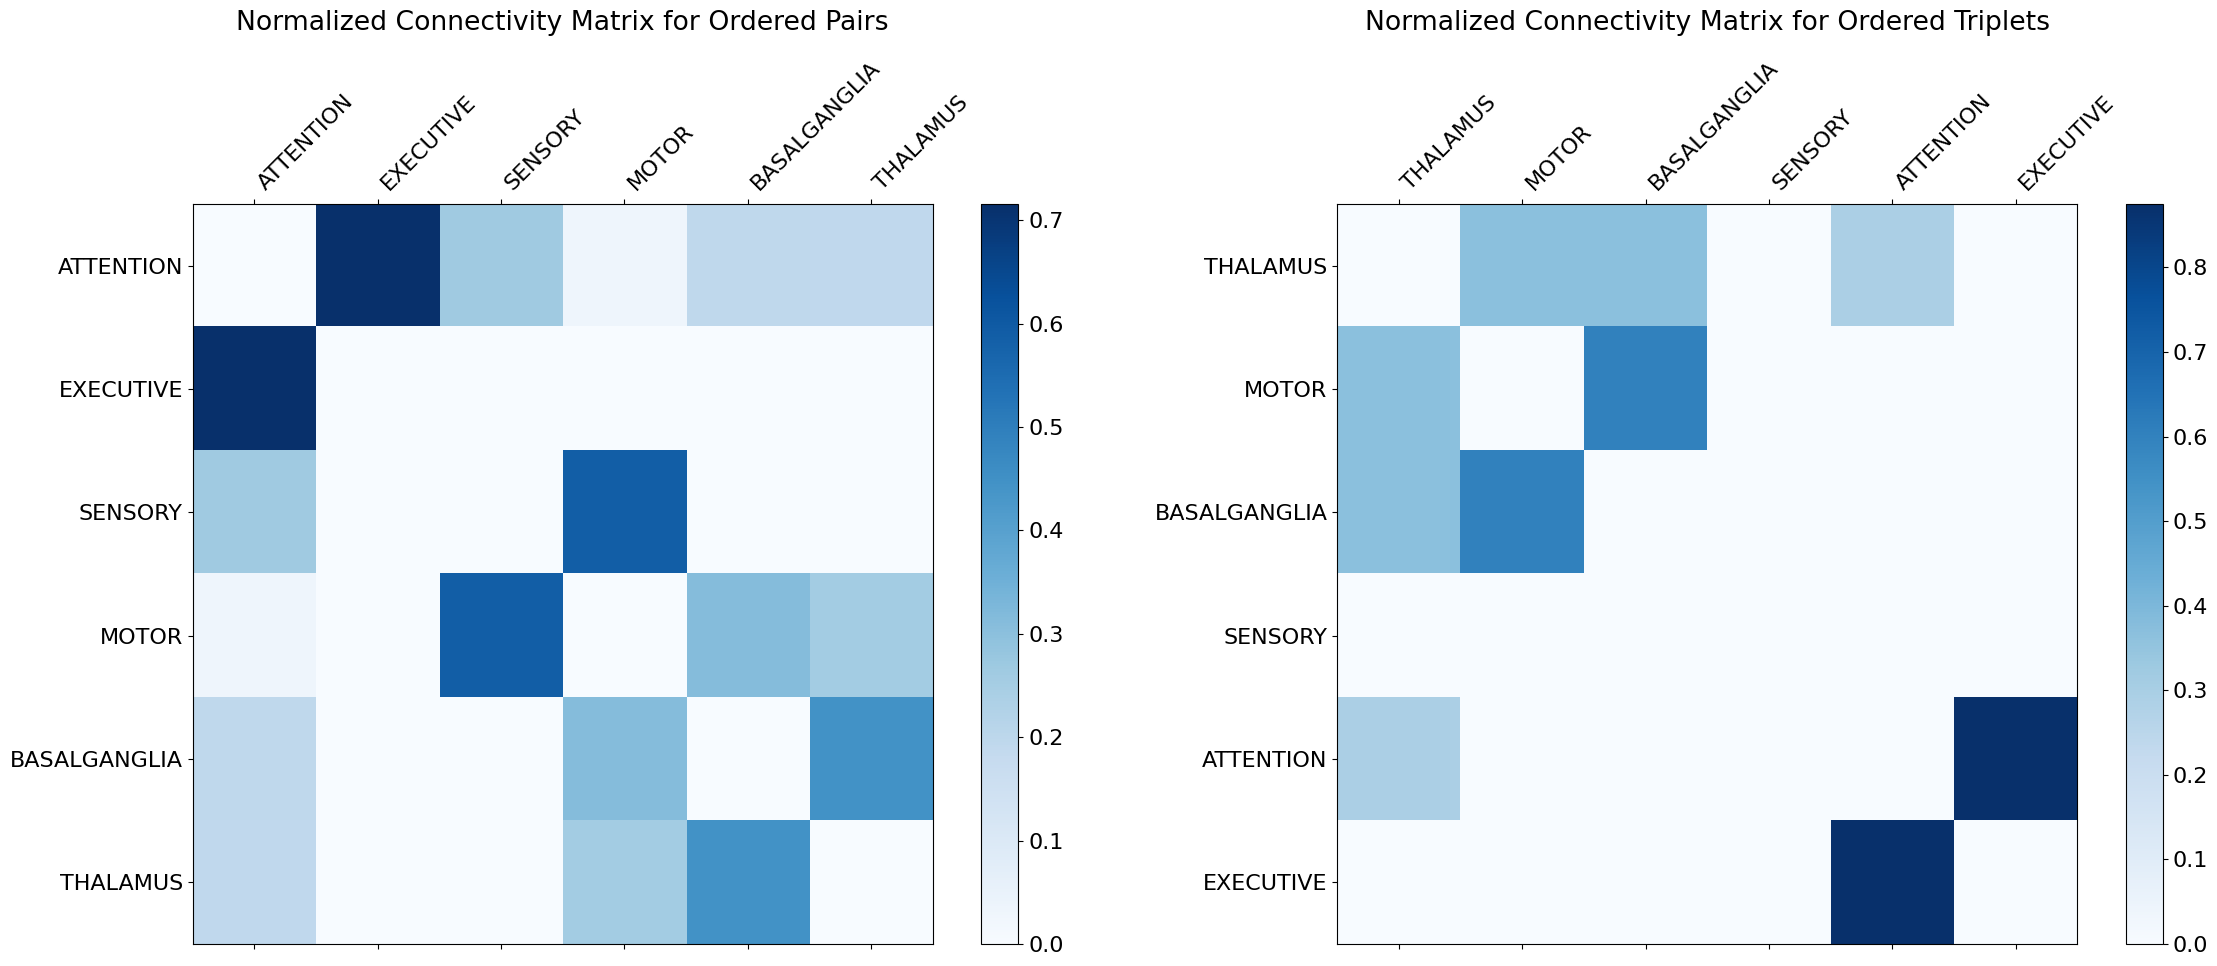

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



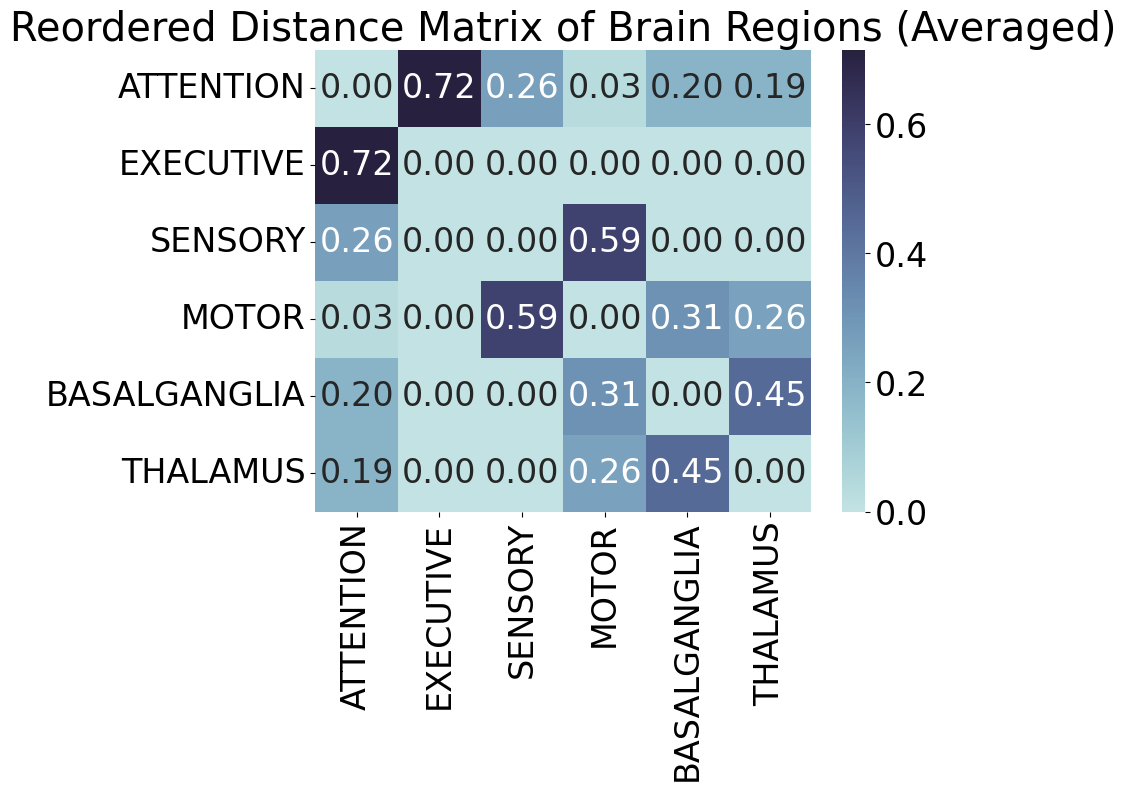

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(reordered_avg_brain_regions_df, annot=True, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), fmt=".2f")
plt.title("Reordered Distance Matrix of Brain Regions (Averaged)")
plt.show()

In [ ]:
# prompt: save the reordered matrix

reordered_avg_brain_regions_df.to_csv("reordered_avg_brain_regions_df_5.csv")


In [ ]:
newlabels_corrected = {
    "DMN": 0, "ATTENTION": 1, "MOTOR": 2, "VISUAL": 3, "EXECUTIVE": 4,
    "SENSORY": 5, "SALIENCE": 6, "AUDITORY": 7, "COGNITIVE": 8, "BASALGANGLIA": 9,
    "LANG": 10, "CEREBELLAR": 11, "HYPOTHALAMUS": 12, "THALAMUS": 13, "OTHERS": 14
}

(52799, 6)
(17599, 6)


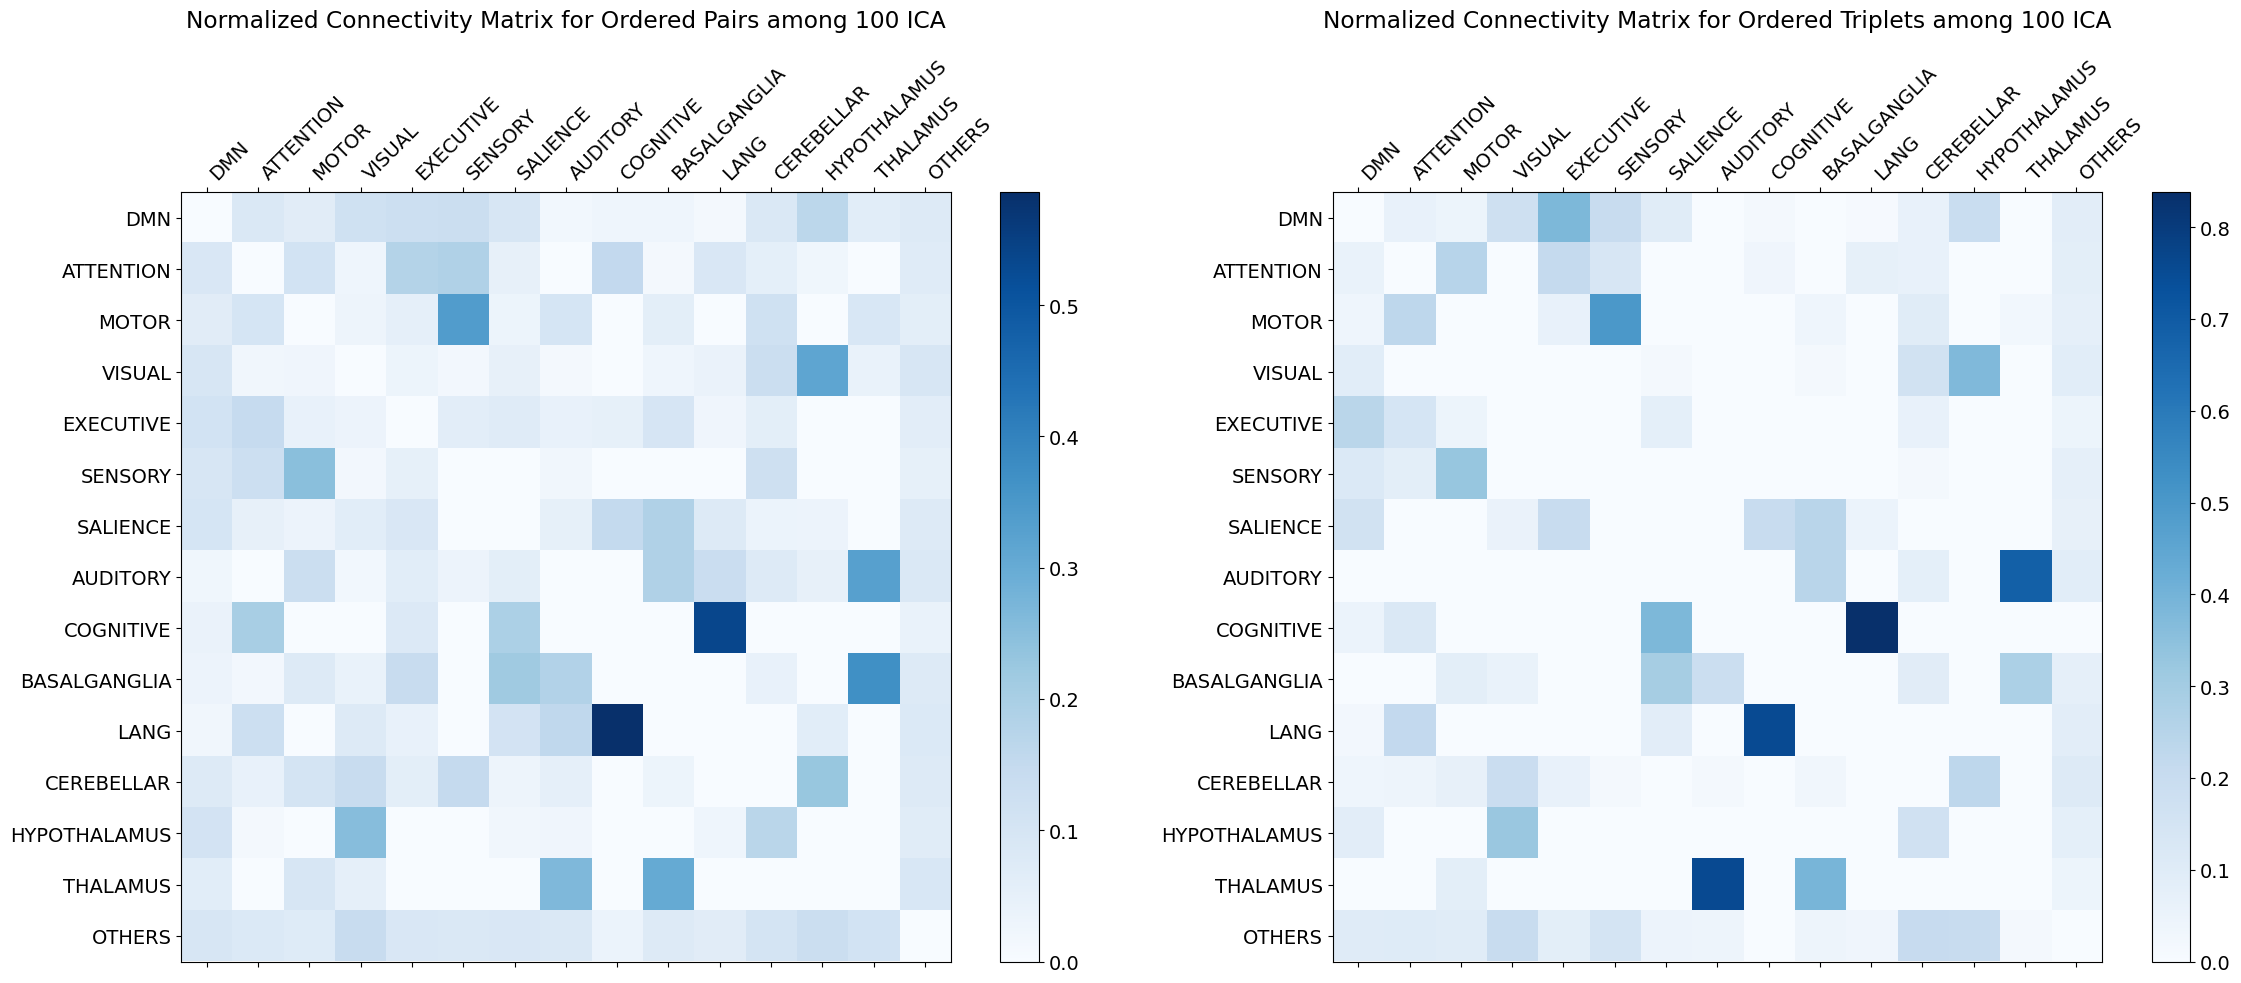

In [ ]:
# Load the data from the provided CSV file
data_new_5 = pd.read_csv("/content/corrected_table_sent_5_epoch_197_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
#Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)
# Append "-" right after "HYPOTHALAMUS" in the names
# data_new_5.iloc[:, -1] = data_new_5.iloc[:, -1].apply(lambda x: x[:12] + "-NONE" + x[12:] if "HYPOTHALAMUS" in x else x)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs and triplets of the first two and three symbols respectively
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)
data_new_5['ordered_triplet'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str) + "-" + data_new_5.iloc[:, 2].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Compute connectivity matrix for ordered triplets using the new approach
matrix_ordered_triplet_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_triplet')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_triplet_new_5 = matrix_ordered_triplet_new_5.div(matrix_ordered_triplet_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_triplet_new_5 = normalized_matrix_ordered_triplet_new_5.div(normalized_matrix_ordered_triplet_new_5.sum(axis=0), axis=1)

# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='Blues')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets among 100 ICA", pad=20)

plt.show()

(52799, 6)
(17599, 6)


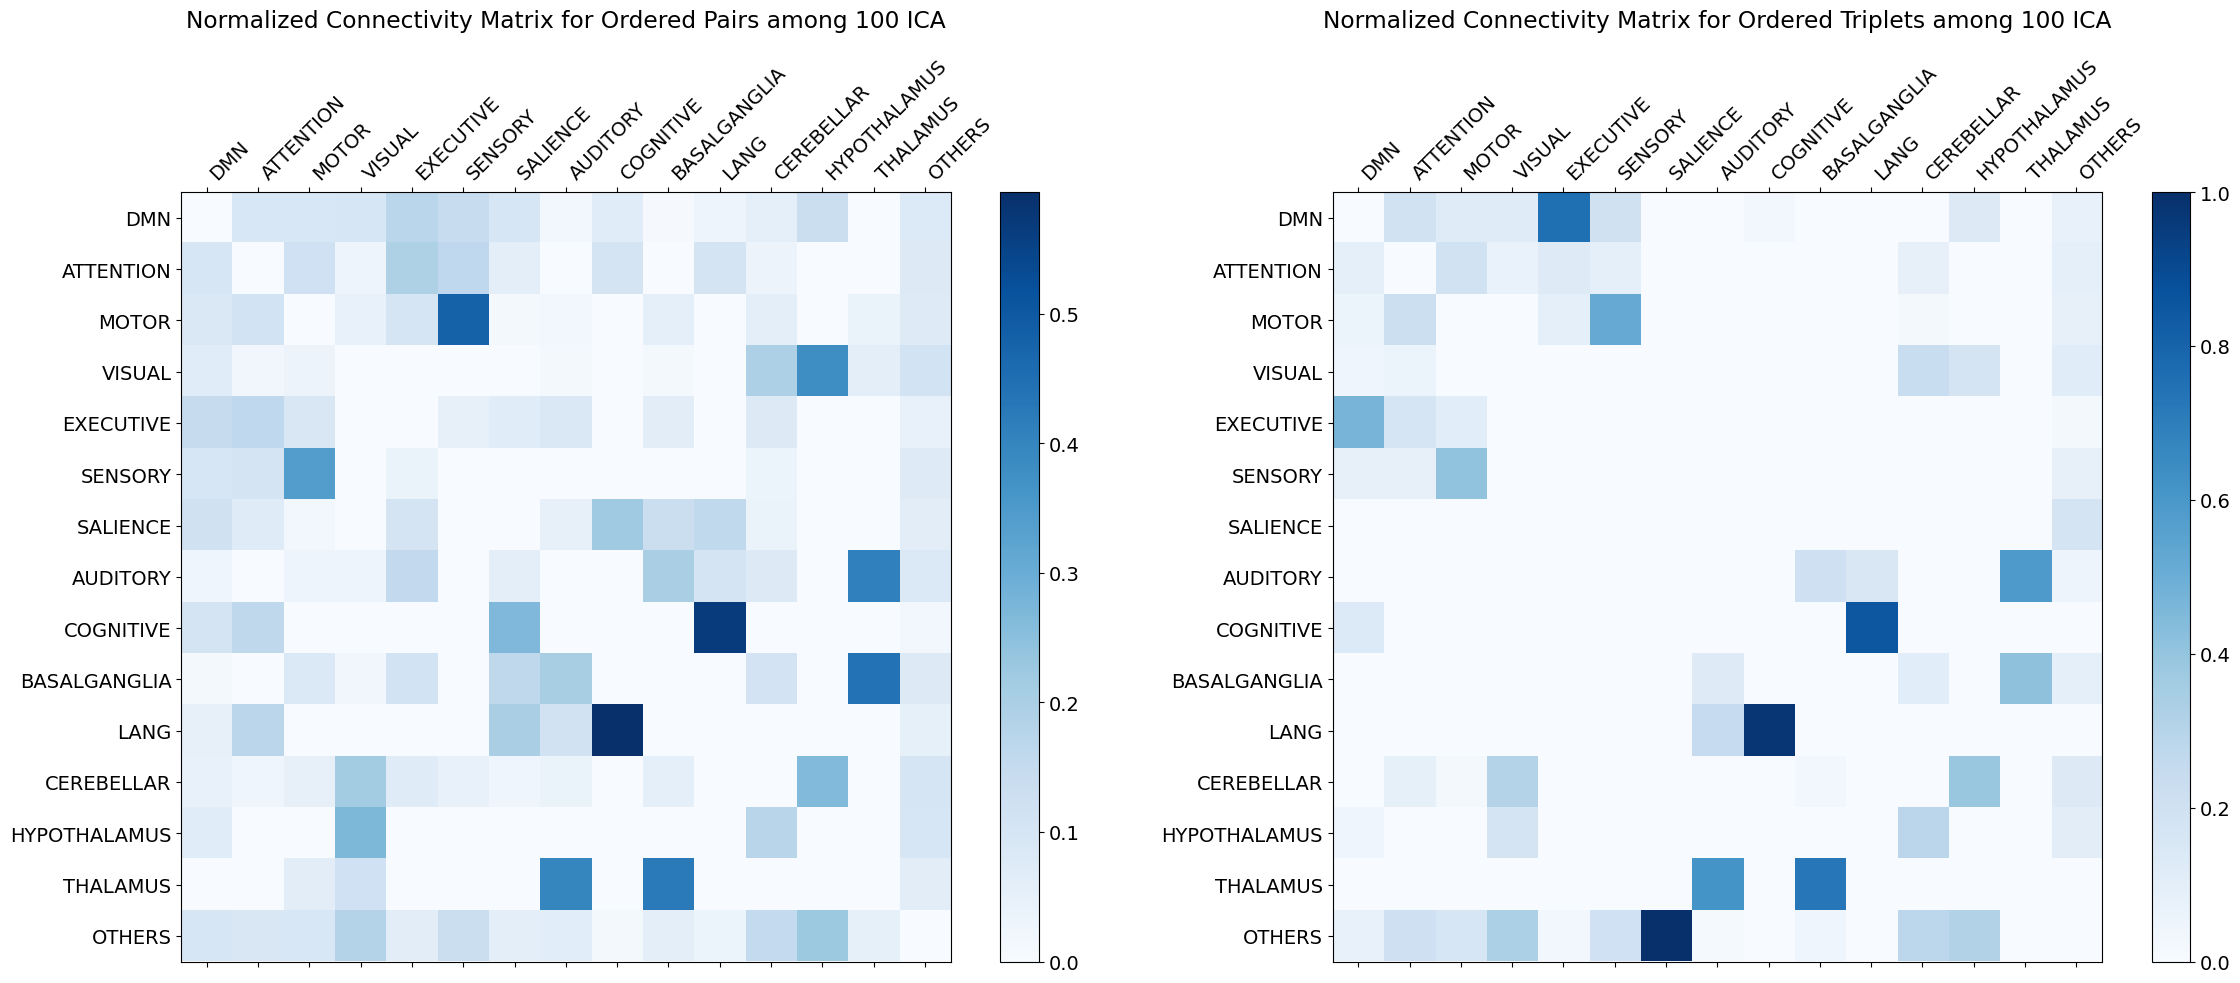

In [ ]:
# Load the data from the provided CSV file
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
#Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)
# Append "-" right after "HYPOTHALAMUS" in the names
# data_new_5.iloc[:, -1] = data_new_5.iloc[:, -1].apply(lambda x: x[:12] + "-NONE" + x[12:] if "HYPOTHALAMUS" in x else x)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs and triplets of the first two and three symbols respectively
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)
data_new_5['ordered_triplet'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str) + "-" + data_new_5.iloc[:, 2].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Compute connectivity matrix for ordered triplets using the new approach
matrix_ordered_triplet_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_triplet')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_triplet_new_5 = matrix_ordered_triplet_new_5.div(matrix_ordered_triplet_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_triplet_new_5 = normalized_matrix_ordered_triplet_new_5.div(normalized_matrix_ordered_triplet_new_5.sum(axis=0), axis=1)

# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='Blues')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets among 100 ICA", pad=20)

plt.show()

(52799, 6)
(17599, 6)


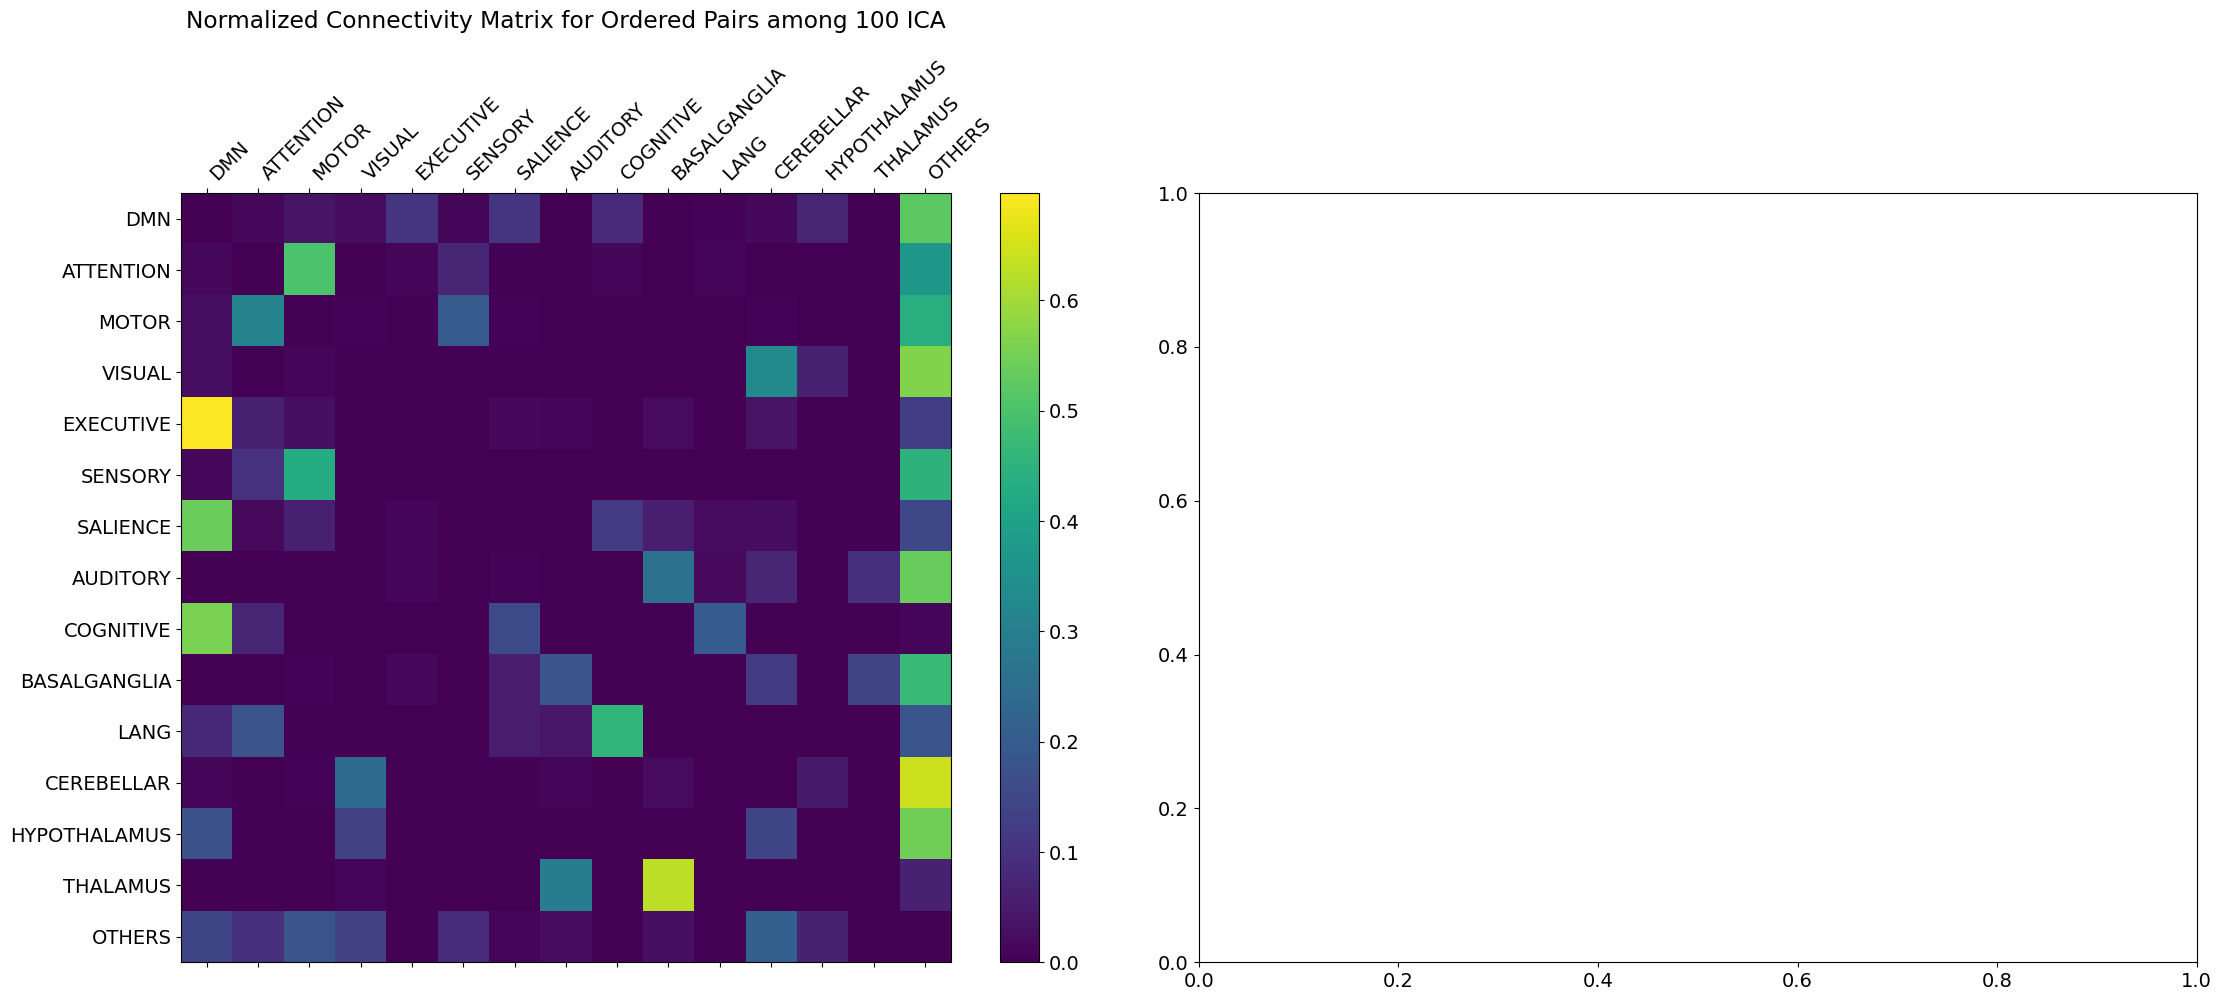

In [ ]:
# Load the data from the provided CSV file
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
#Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)
# Append "-" right after "HYPOTHALAMUS" in the names
# data_new_5.iloc[:, -1] = data_new_5.iloc[:, -1].apply(lambda x: x[:12] + "-NONE" + x[12:] if "HYPOTHALAMUS" in x else x)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs and triplets of the first two and three symbols respectively
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)
data_new_5['ordered_triplet'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str) + "-" + data_new_5.iloc[:, 2].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)


# normalized_matrix_ordered_pair_new_5 =  matrix_ordered_pair_new_5.copy()
# Compute connectivity matrix for ordered triplets using the new approach
matrix_ordered_triplet_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_triplet')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_triplet_new_5 = matrix_ordered_triplet_new_5.div(matrix_ordered_triplet_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_triplet_new_5 = normalized_matrix_ordered_triplet_new_5.div(normalized_matrix_ordered_triplet_new_5.sum(axis=0), axis=1)

# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='viridis')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets among 100 ICA", pad=20)

plt.show()

(52799, 6)
(17599, 6)


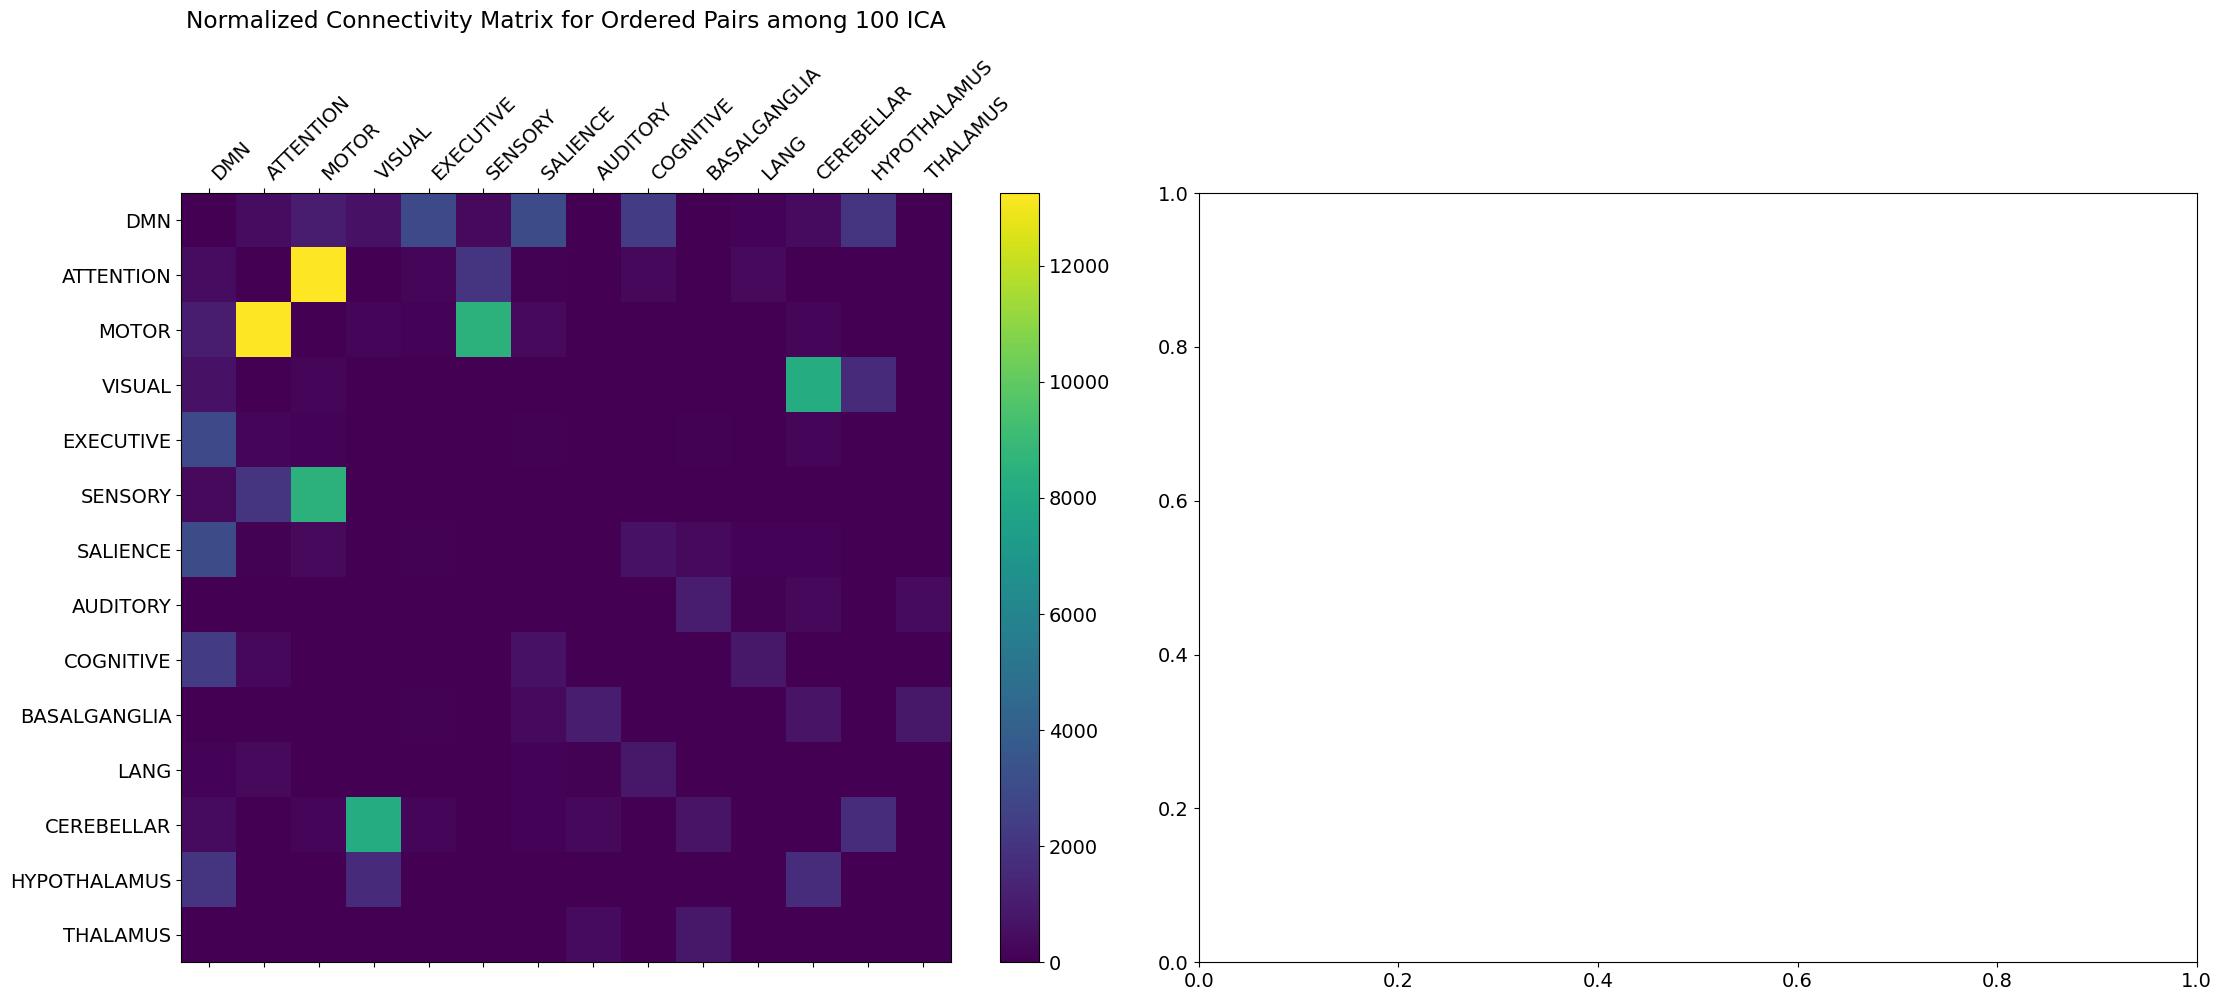

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#FIXED
# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# # Normalize the matrix by the sum of the row elements
# normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# # Normalize the matrix by the sum of the column elements
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Remove the "OTHERS" row and column from the matrix
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

# normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.copy()
# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='viridis')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets among 100 ICA", pad=20)

plt.show()


(52799, 6)
(17600, 6)


<ipython-input-36-c207aebf67c7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))
<ipython-input-36-c207aebf67c7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)


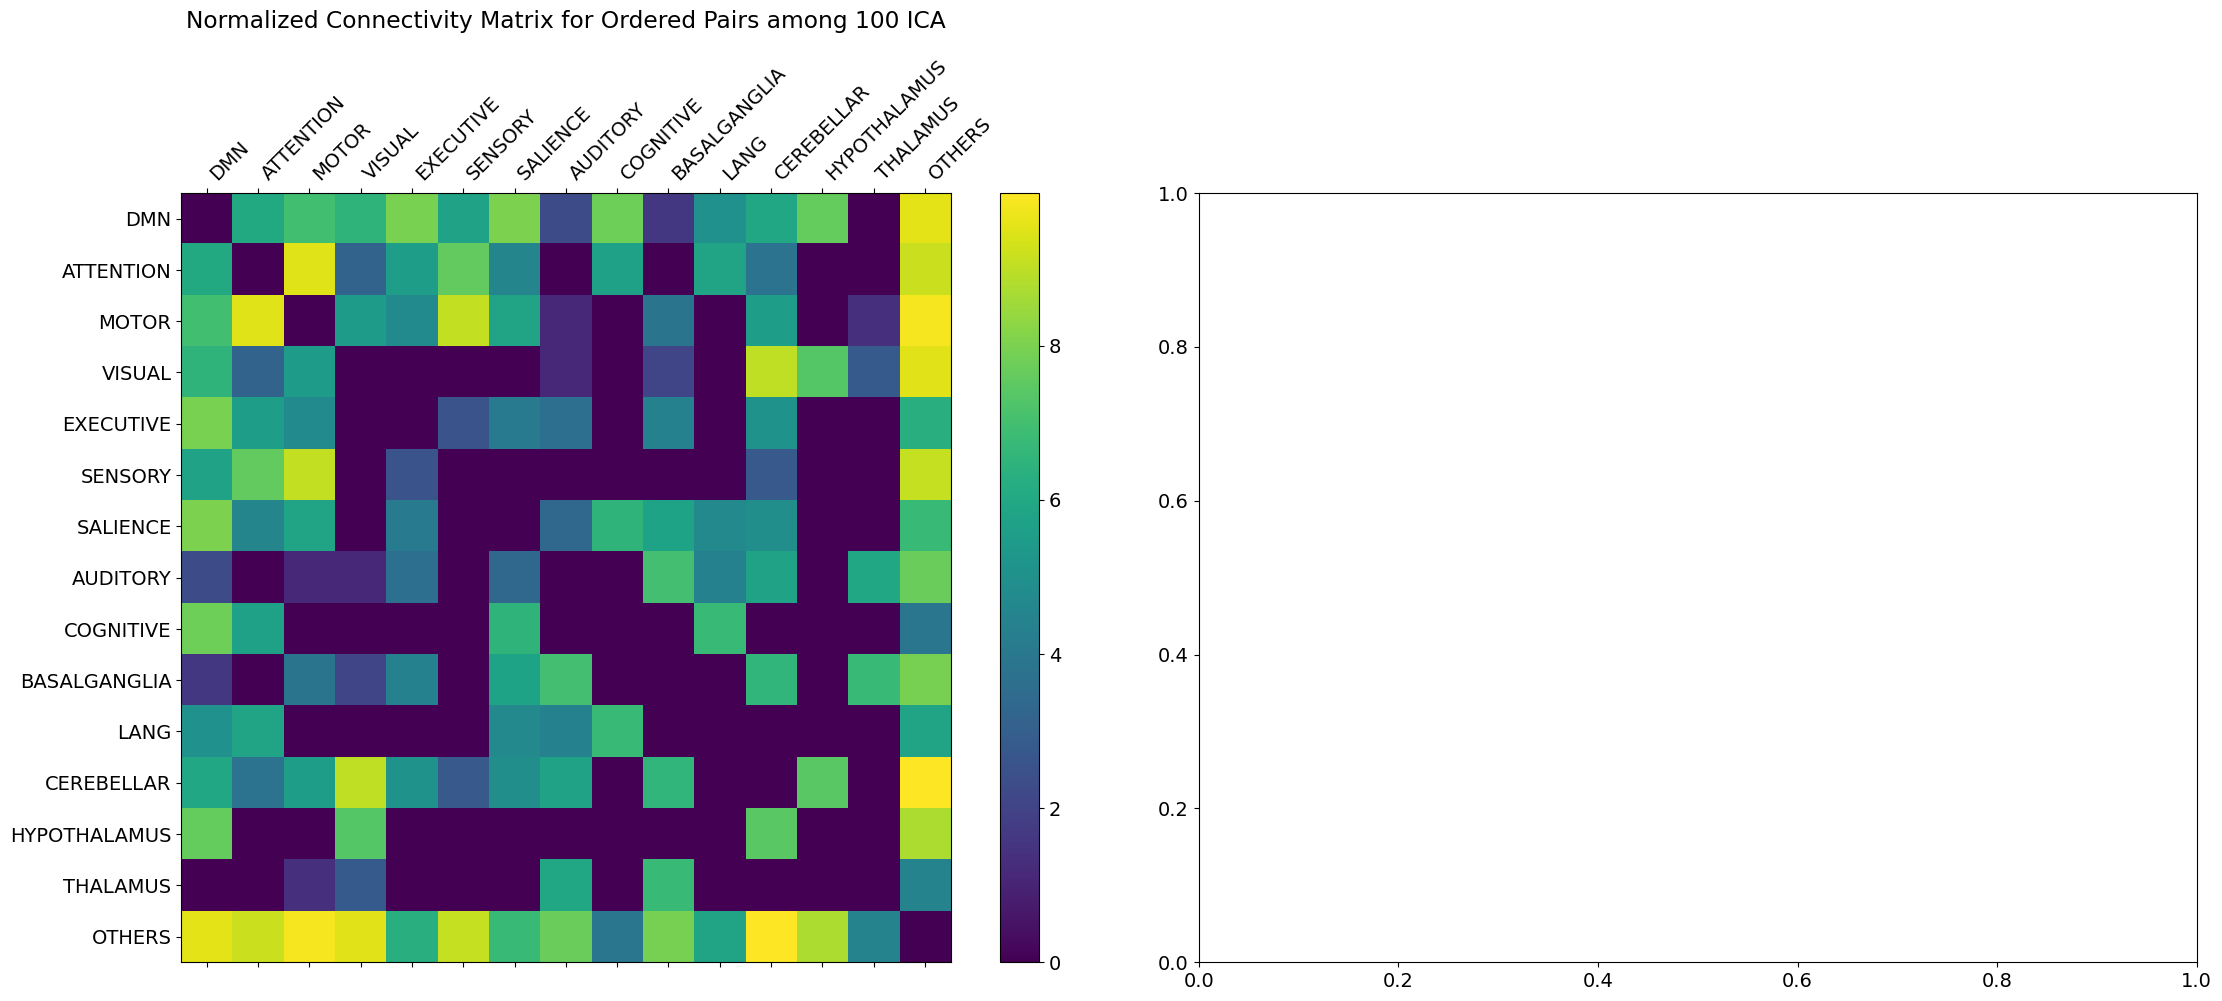

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#FIXED, same as above but testing for sorted table
# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')



# Remove the "OTHERS" row and column from the matrix
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
# normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

normalized_matrix_ordered_pair_new_5 = np.log1p(matrix_ordered_pair_new_5)


# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)


plt.show()


(52799, 6)
(17600, 6)


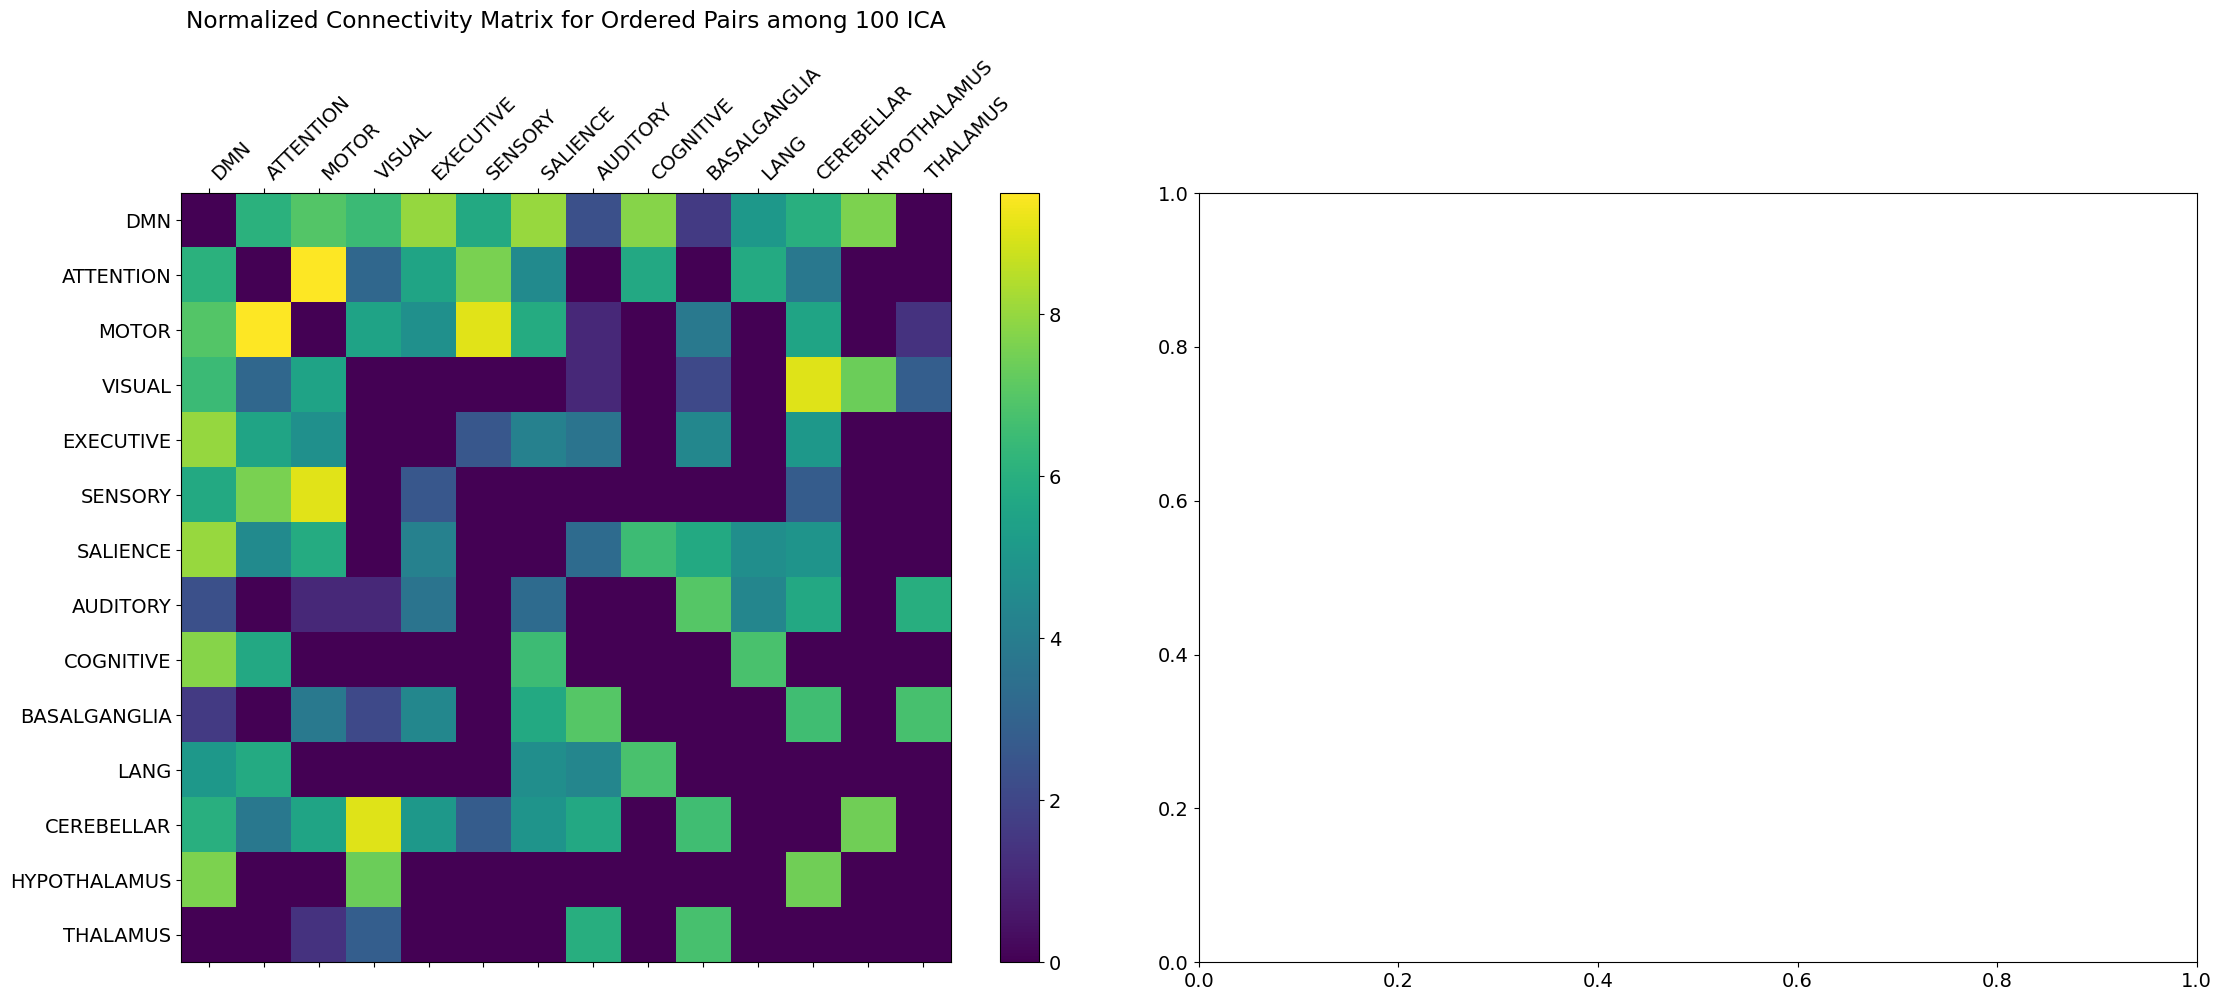

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#FIXED, same as above but testing for sorted table, removing others
# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')



# Remove the "OTHERS" row and column from the matrix
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

normalized_matrix_ordered_pair_new_5 = np.log1p(normalized_matrix_ordered_pair_new_5)


# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)


plt.show()


(52799, 6)
(17600, 6)


<ipython-input-23-68be3137ae95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))
<ipython-input-23-68be3137ae95>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)


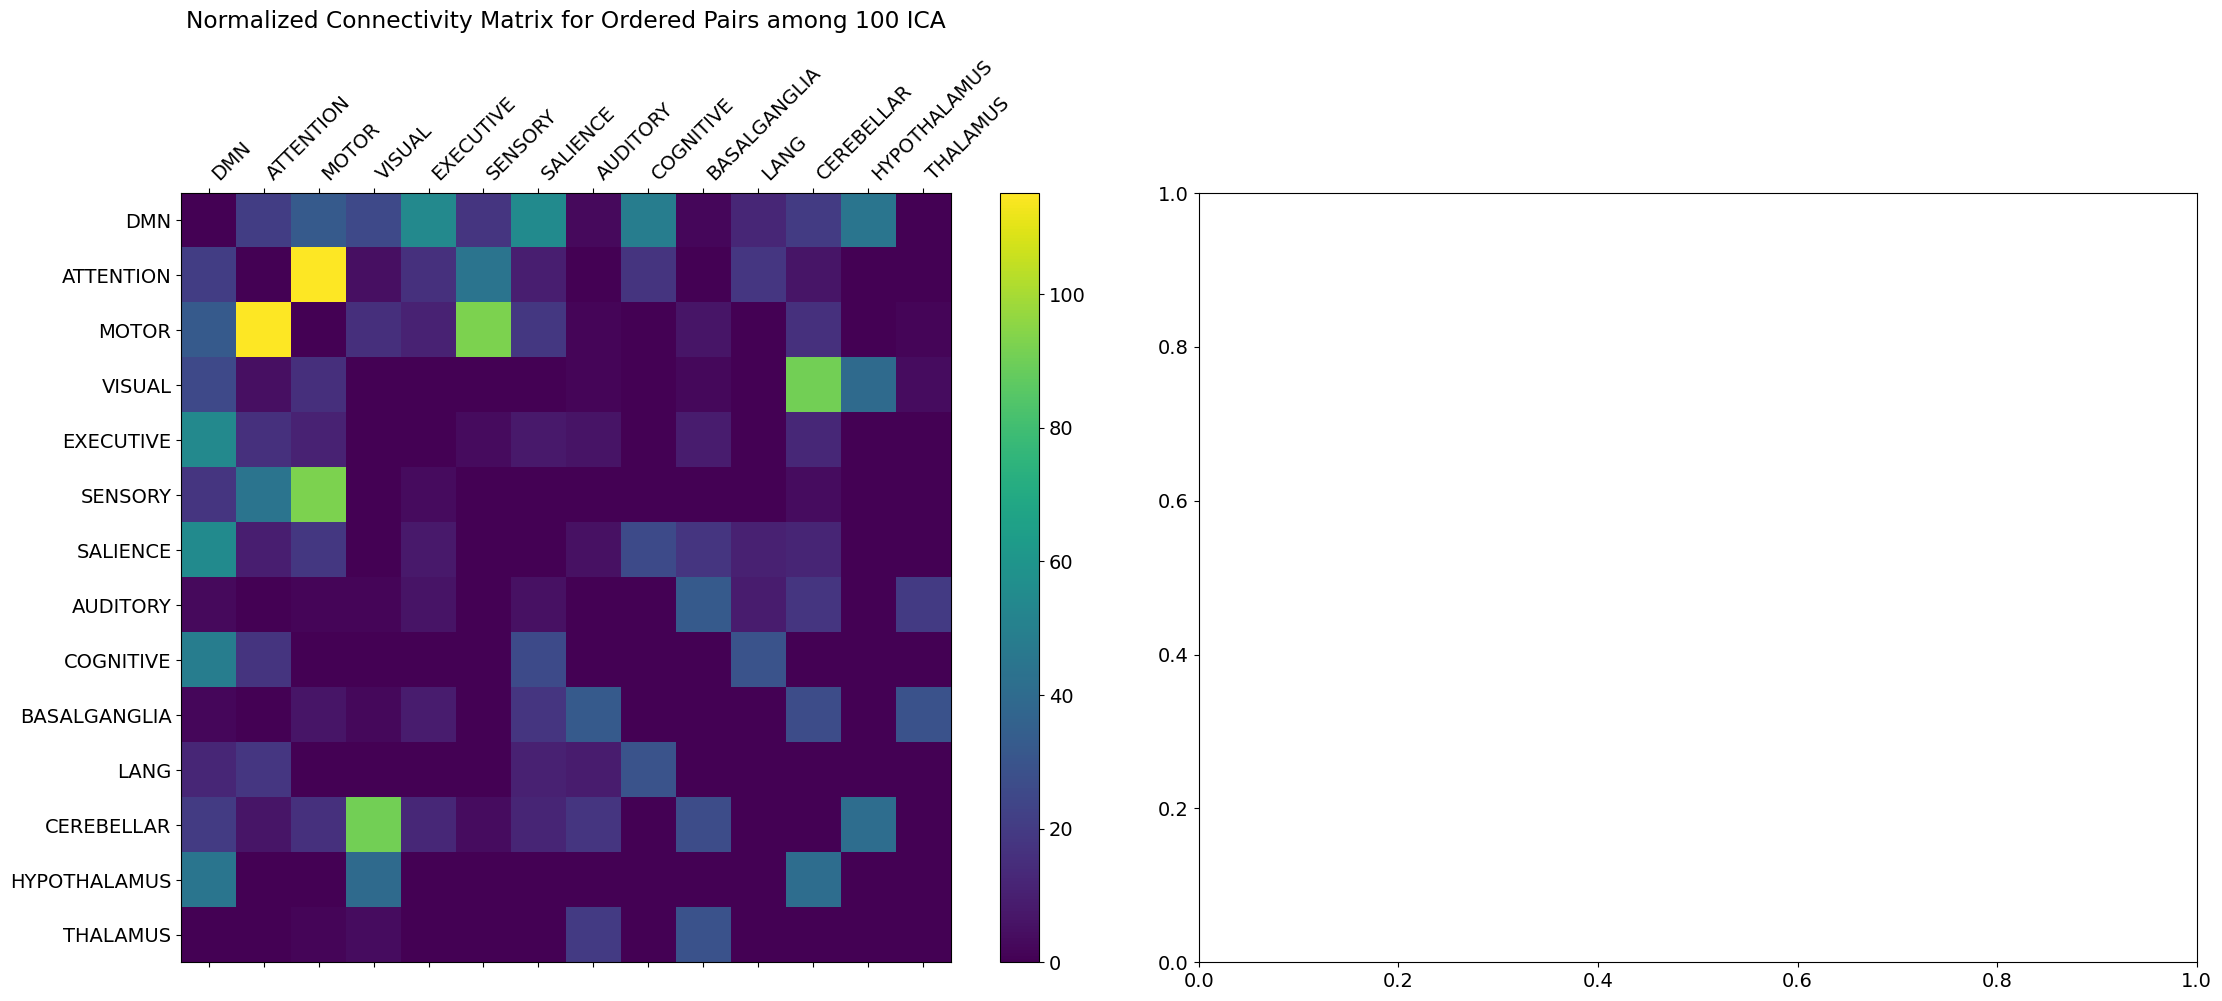

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#FIXED, same as above but testing for sorted table, but with sqrt normalization
# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')



#Remove the "OTHERS" row and column from the matrix
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

normalized_matrix_ordered_pair_new_5 = np.sqrt(normalized_matrix_ordered_pair_new_5)


# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)


plt.show()


(52799, 6)
(17599, 6)


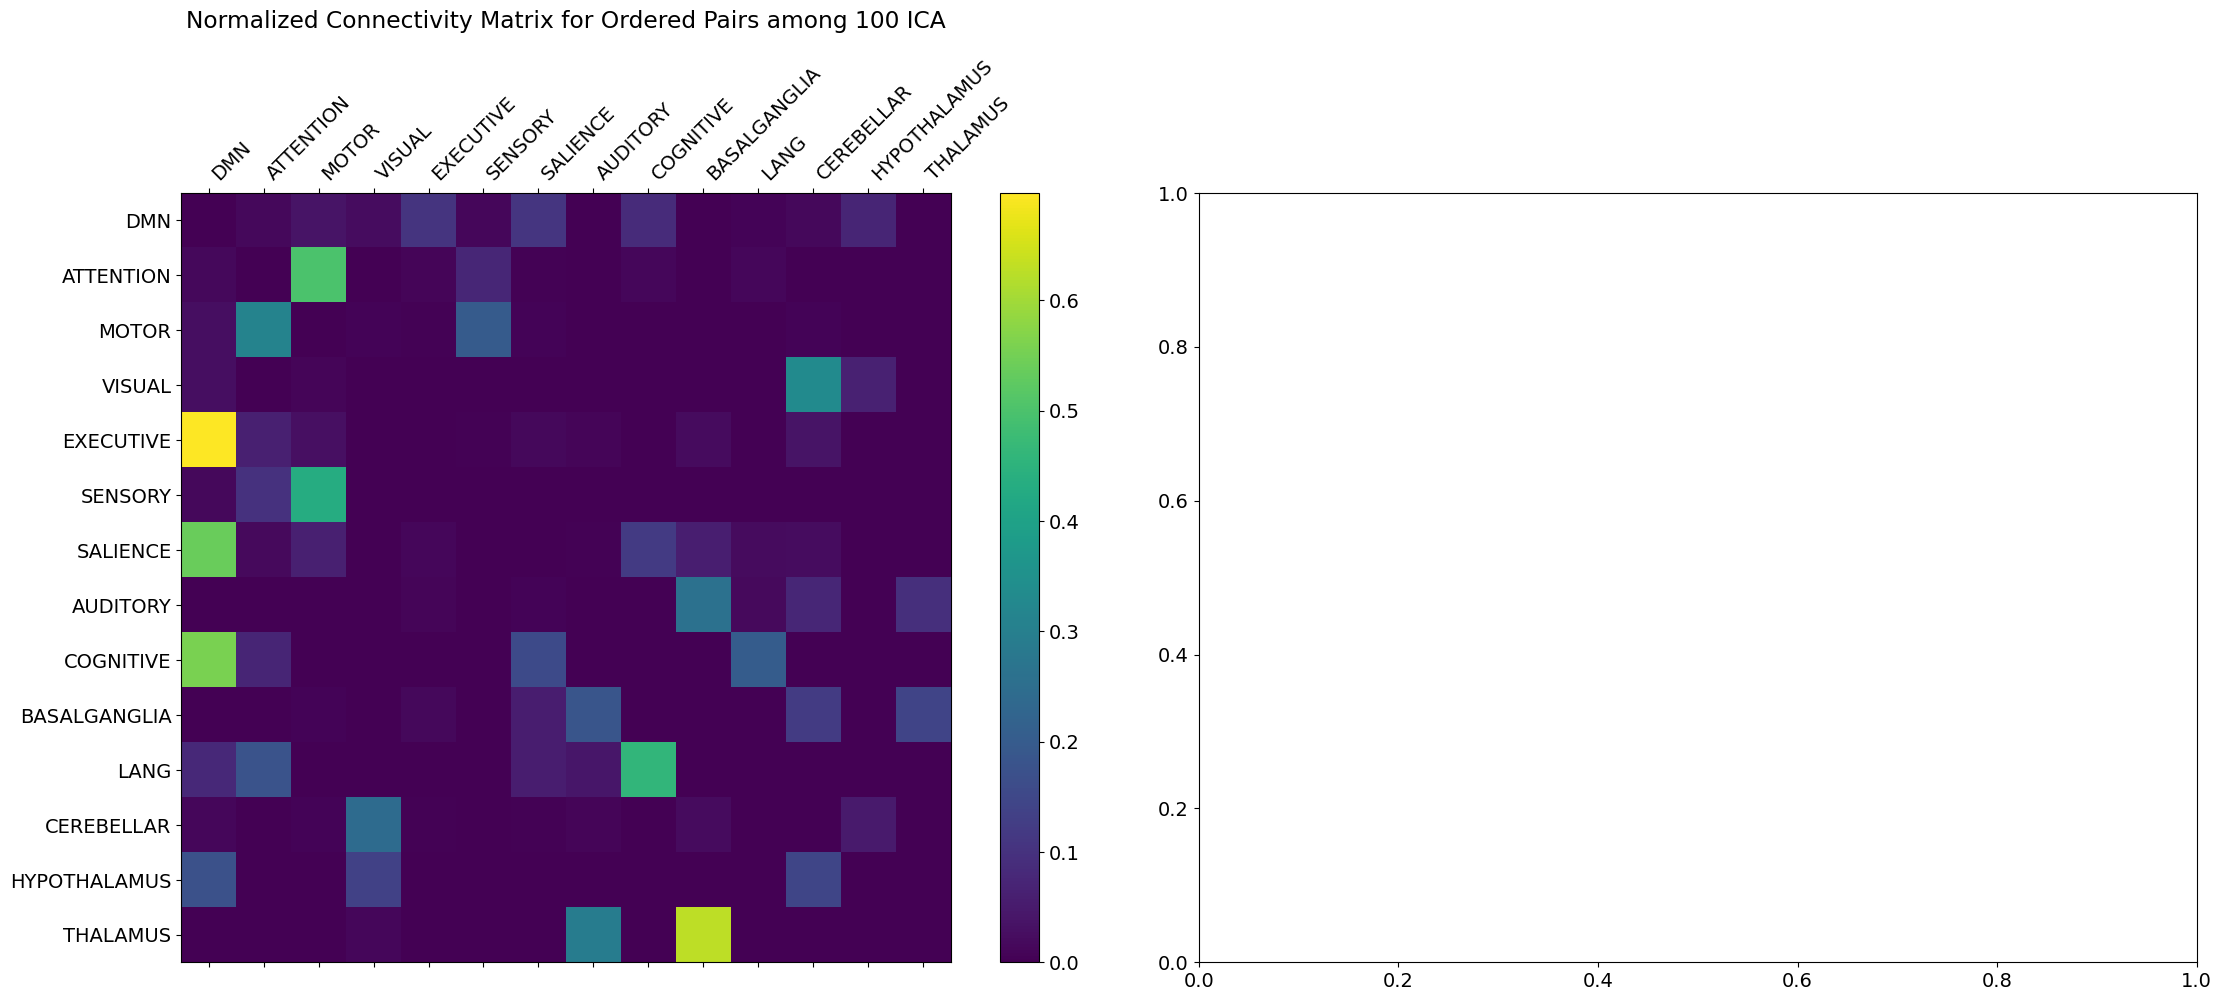

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#FIXED, ROW ONLY
# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# # Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# # Normalize the matrix by the sum of the column elements
# normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Remove the "OTHERS" row and column from the matrix
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
# normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

# normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.copy()
# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='viridis')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets among 100 ICA", pad=20)

plt.show()


(52799, 6)
(17599, 6)


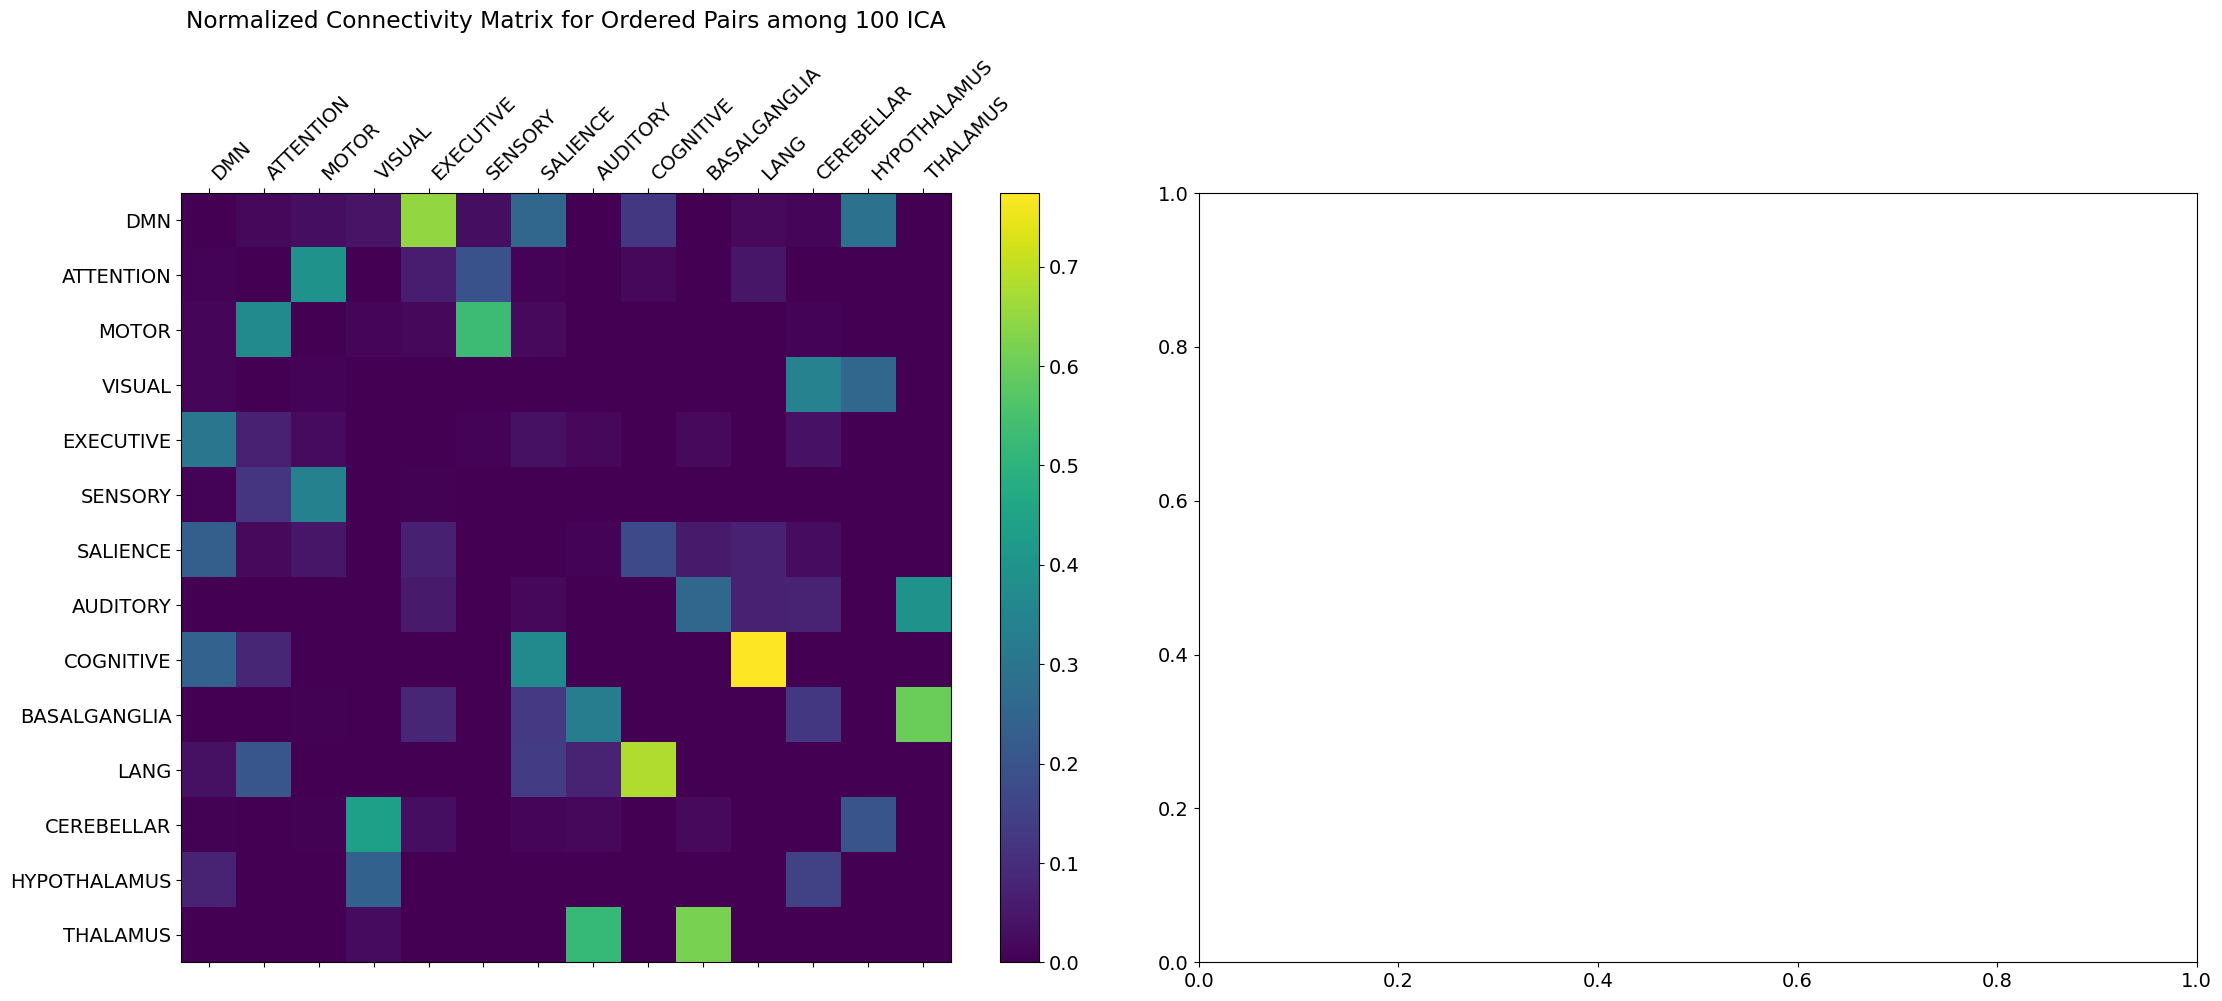

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#FIXED
# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# # Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# # Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Remove the "OTHERS" row and column from the matrix
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
# normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)

# normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.copy()
# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='viridis')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets among 100 ICA", pad=20)

plt.show()


(52799, 6)
(17599, 6)


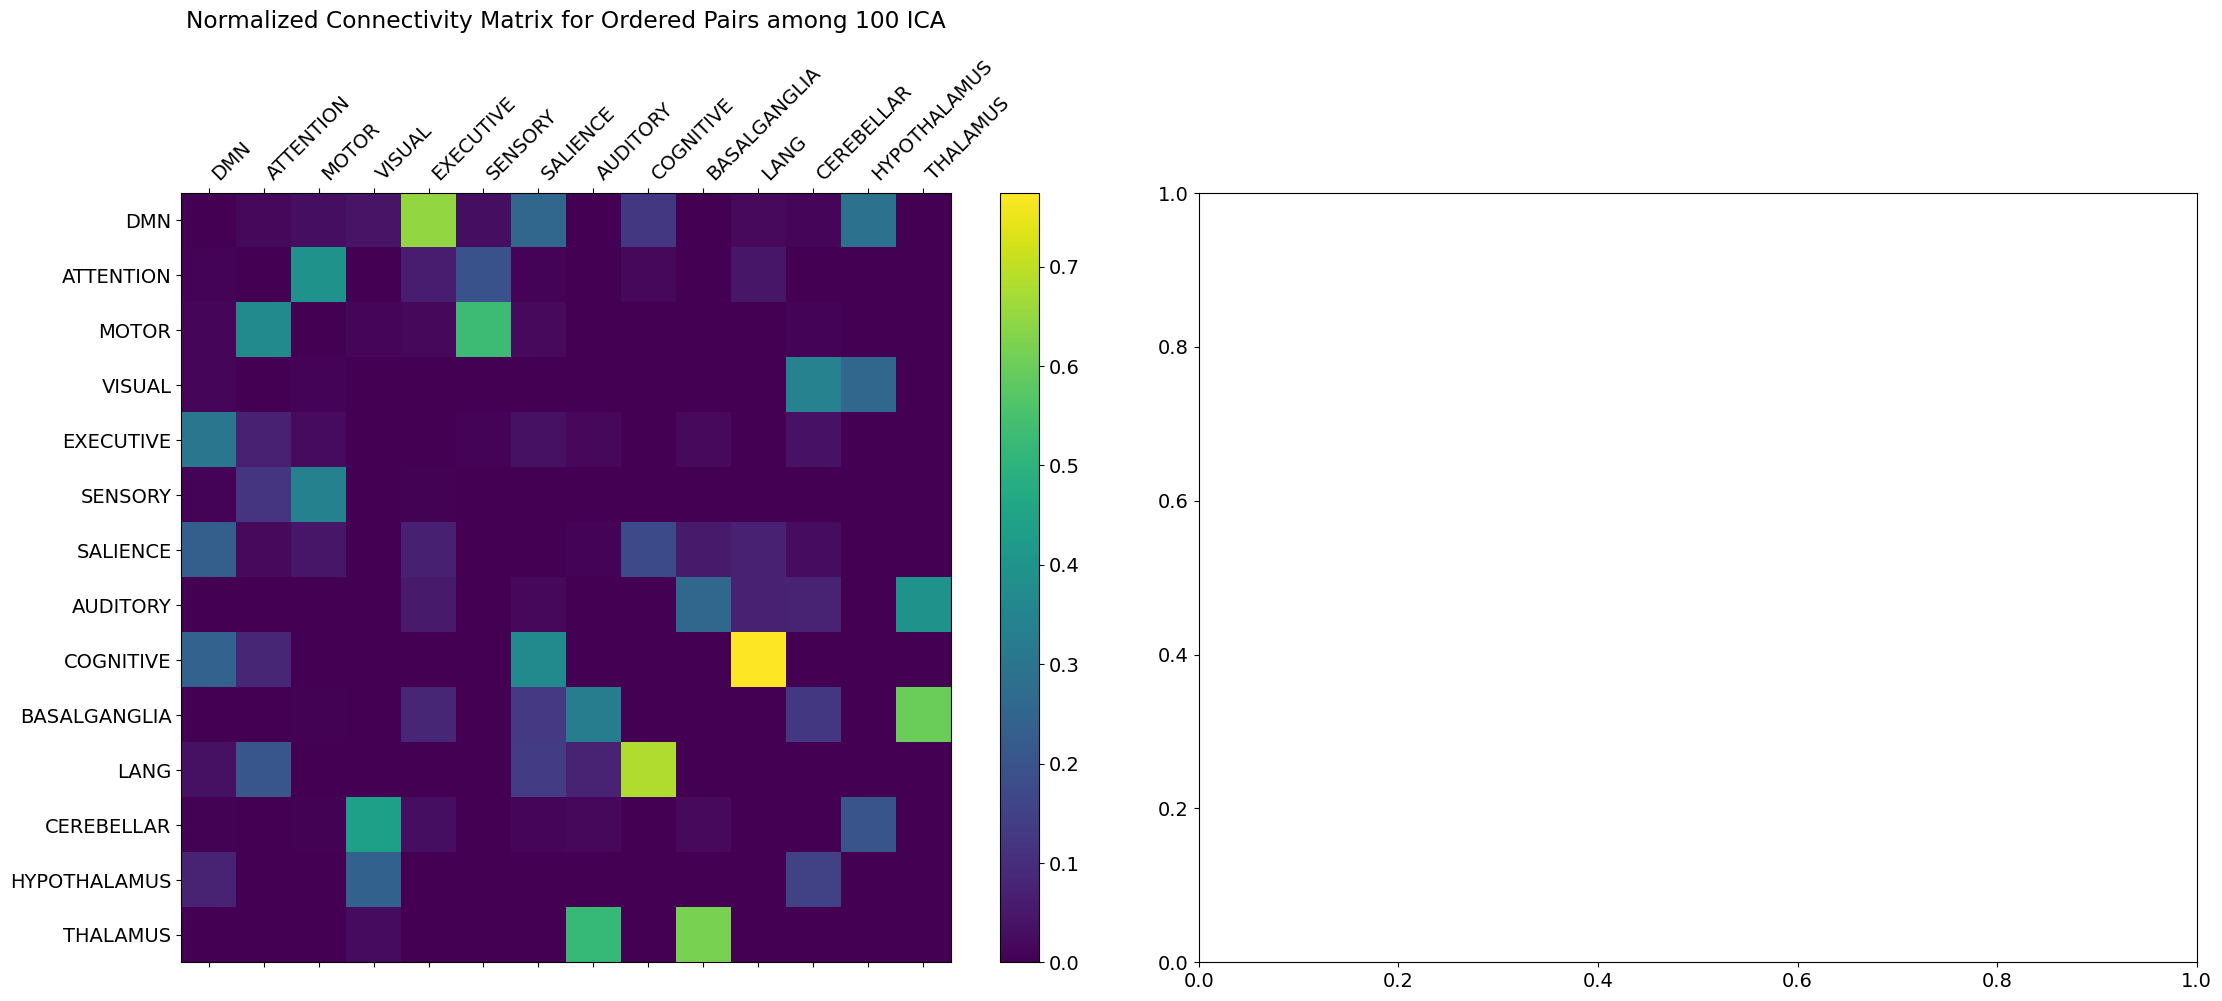

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
# Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# # Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# # Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Remove the "OTHERS" row and column from the matrix
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
# normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)


# Plot the normalized connectivity matrices for ordered pairs and triplets
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='viridis')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets among 100 ICA", pad=20)

plt.show()


<ipython-input-111-666f78b0bd28>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))


Text(0.5, 1.0, 'Normalized Connectivity Matrix for Ordered Pairs among 100 ICA')

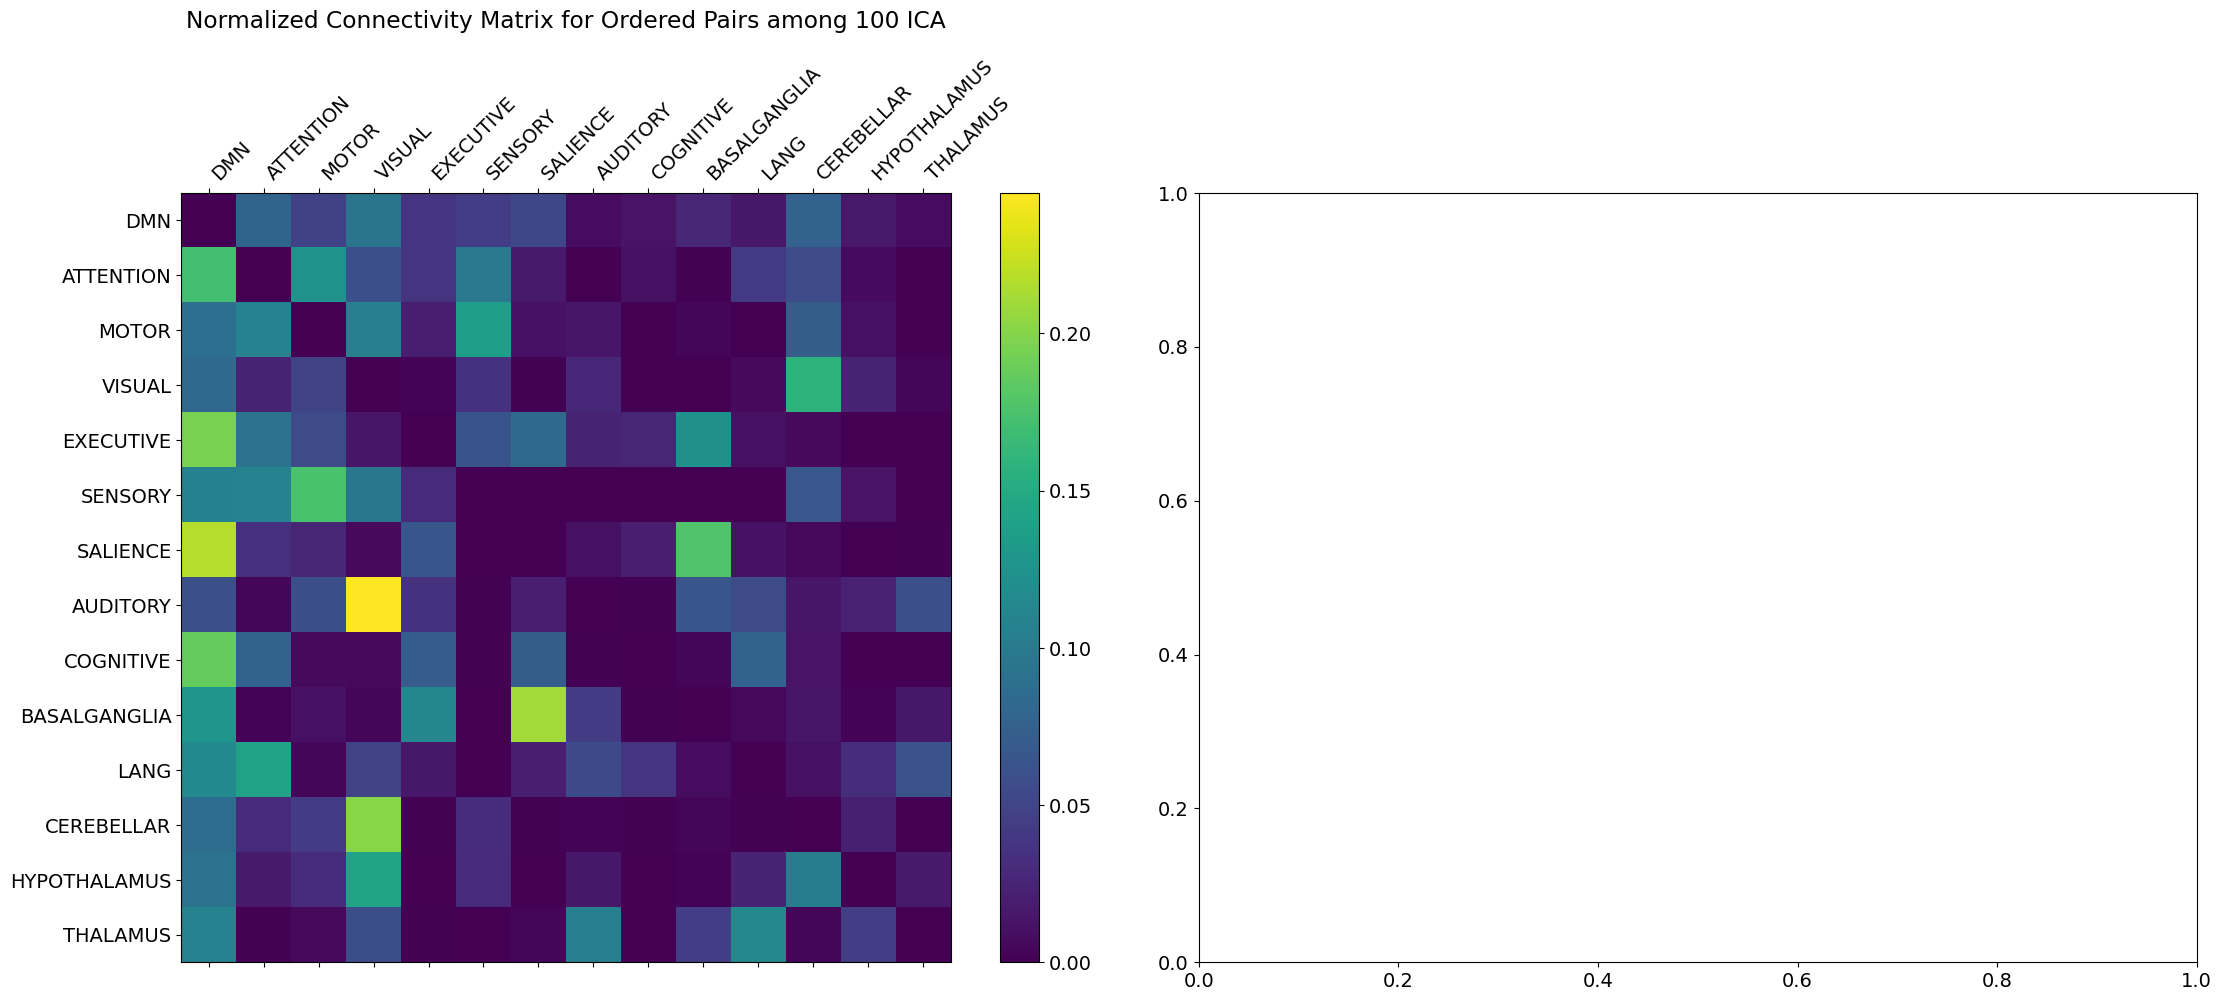

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")

# Filter rows with final column ending with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]

# Extract parent_network using corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Initialize an empty matrix for the combined connectivity matrix
combined_matrix = None
weights = [0,1,2,3,4,5]

# Compute and weight connectivity matrices for prefix sizes 1 to 5
for prefix_size in range(1, 6):
    # Create a column for the prefix
    if weights[prefix_size] == 0:
      continue
    prefix_column = '-'.join(data_new_5.iloc[:, :prefix_size].astype(str).columns)
    data_new_5[prefix_column] = data_new_5.iloc[:, :prefix_size].astype(str).apply(lambda row: '-'.join(row.values), axis=1)

    # Compute connectivity matrix
    # print(data_new_5)
    matrix = compute_new_connectivity_matrix(data_new_5, prefix_column)

    # Weight the matrix
    weighted_matrix = matrix * weights[prefix_size]

    # Add to the combined matrix
    combined_matrix = weighted_matrix if combined_matrix is None else combined_matrix + weighted_matrix

# Normalize the combined matrix by the sum of the row elements and then by the sum of the column elements
normalized_matrix = combined_matrix.div(combined_matrix.sum(axis=1), axis=0)
# normalized_matrix = normalized_matrix.div(normalized_matrix.sum(axis=0), axis=1)
# Remove the "OTHERS" row and column from the matrix
# Remove the "OTHERS" row and column from the matrix
normalized_matrix_ordered_pair_new_5 = normalized_matrix.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
# normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)


fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix.columns)))
axes[0].set_yticks(range(len(normalized_matrix.columns)))
axes[0].set_xticklabels(normalized_matrix.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

Text(0.5, 1.0, 'Normalized Connectivity Matrix for Ordered Pairs among 100 ICA')

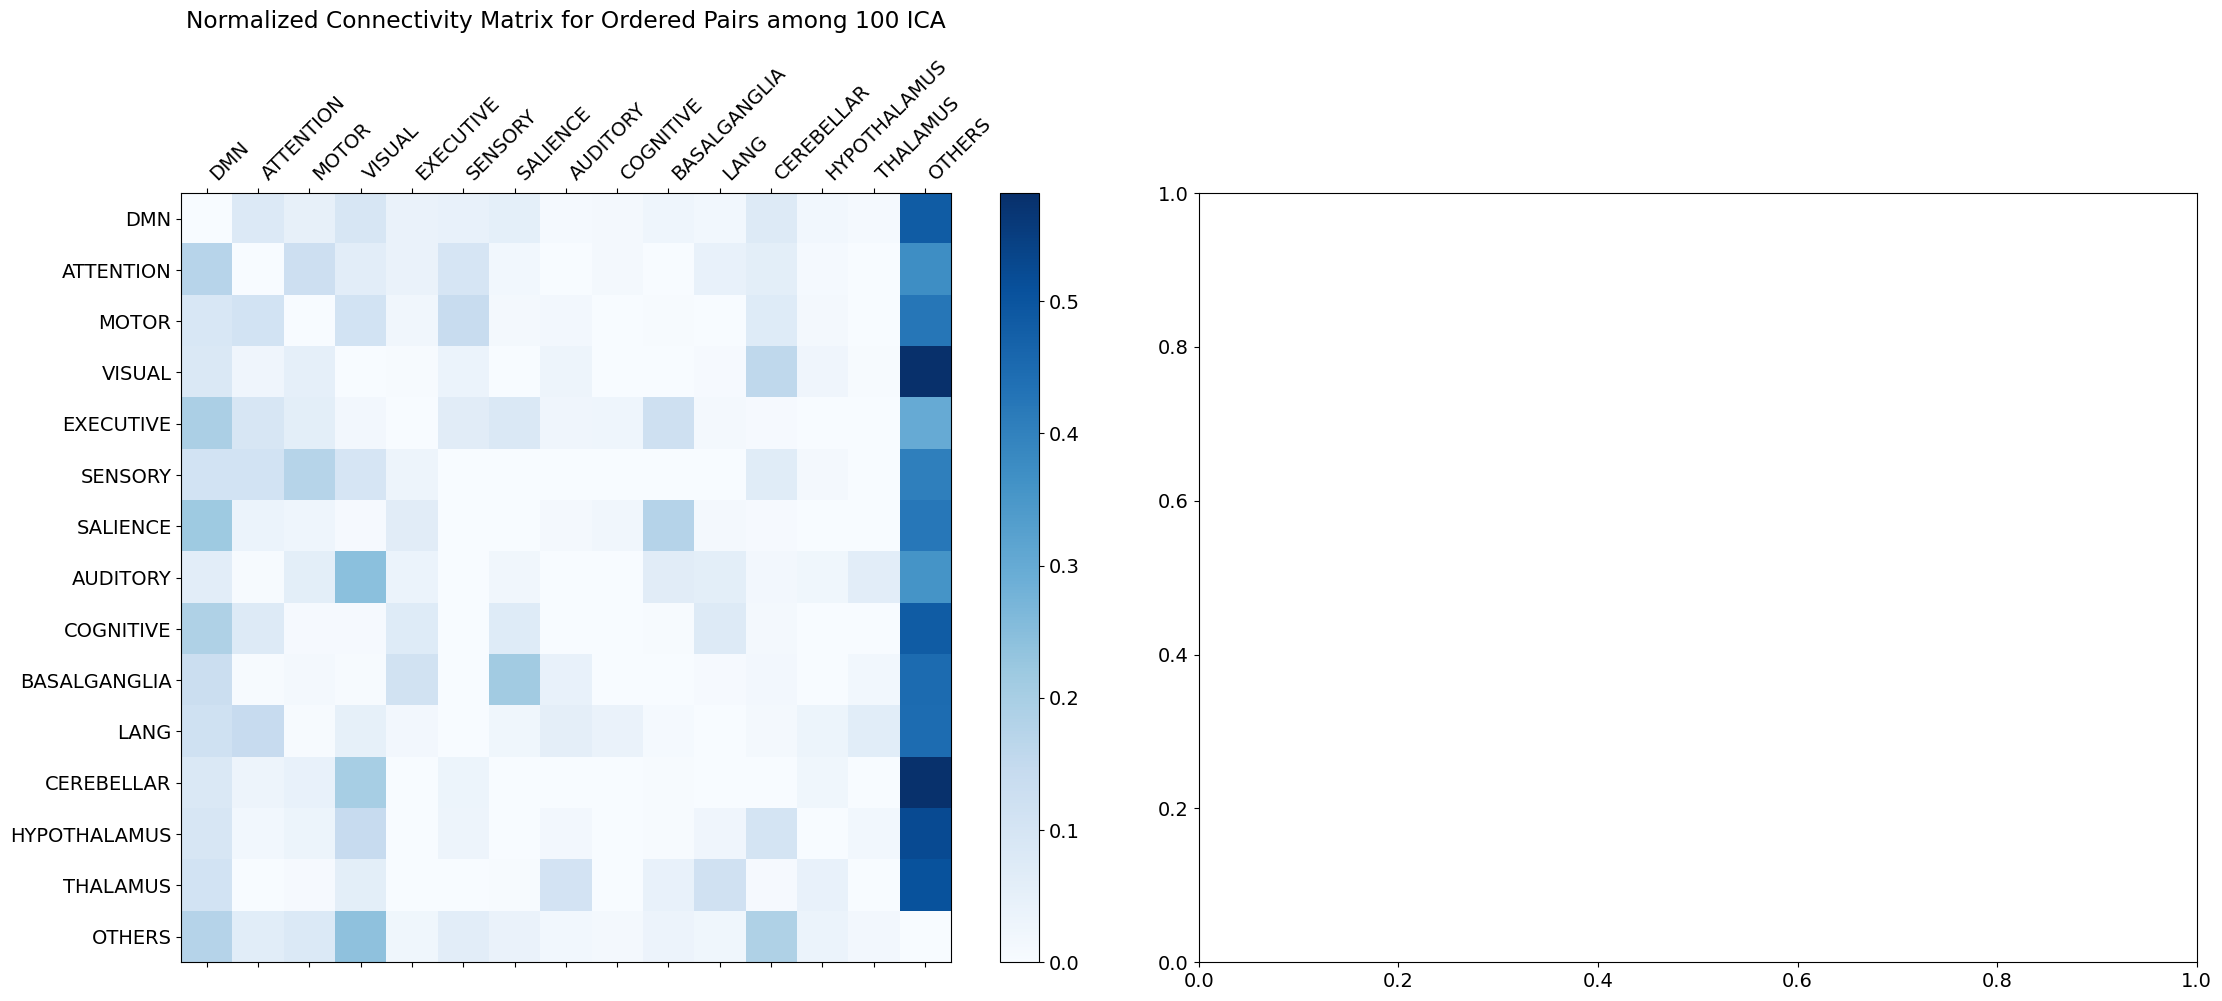

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Just ran again, idk why
# Load data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")

# Filter rows with final column ending with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]

# Extract parent_network using corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Initialize an empty matrix for the combined connectivity matrix
combined_matrix = None
weights = [0,1,2,3,4,5]

# Compute and weight connectivity matrices for prefix sizes 1 to 5
for prefix_size in range(1, 6):
    # Create a column for the prefix
    if weights[prefix_size] == 0:
      continue
    prefix_column = '-'.join(data_new_5.iloc[:, :prefix_size].astype(str).columns)
    data_new_5[prefix_column] = data_new_5.iloc[:, :prefix_size].astype(str).apply(lambda row: '-'.join(row.values), axis=1)

    # Compute connectivity matrix
    # print(data_new_5)
    matrix = compute_new_connectivity_matrix(data_new_5, prefix_column)

    # Weight the matrix
    weighted_matrix = matrix * weights[prefix_size]

    # Add to the combined matrix
    combined_matrix = weighted_matrix if combined_matrix is None else combined_matrix + weighted_matrix

# Normalize the combined matrix by the sum of the row elements and then by the sum of the column elements
normalized_matrix = combined_matrix.div(combined_matrix.sum(axis=1), axis=0)
# normalized_matrix = normalized_matrix.div(normalized_matrix.sum(axis=0), axis=1)
# Remove the "OTHERS" row and column from the matrix
# Remove the "OTHERS" row and column from the matrix
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)
# normalized_matrix_ordered_pair_new_5 =matrix_ordered_pair_new_5.drop("OTHERS", axis=1).drop("OTHERS", axis=0)


fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix.columns)))
axes[0].set_yticks(range(len(normalized_matrix.columns)))
axes[0].set_xticklabels(normalized_matrix.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

Text(0.5, 1.0, 'Normalized Connectivity Matrix for Ordered Pairs among 100 ICA')

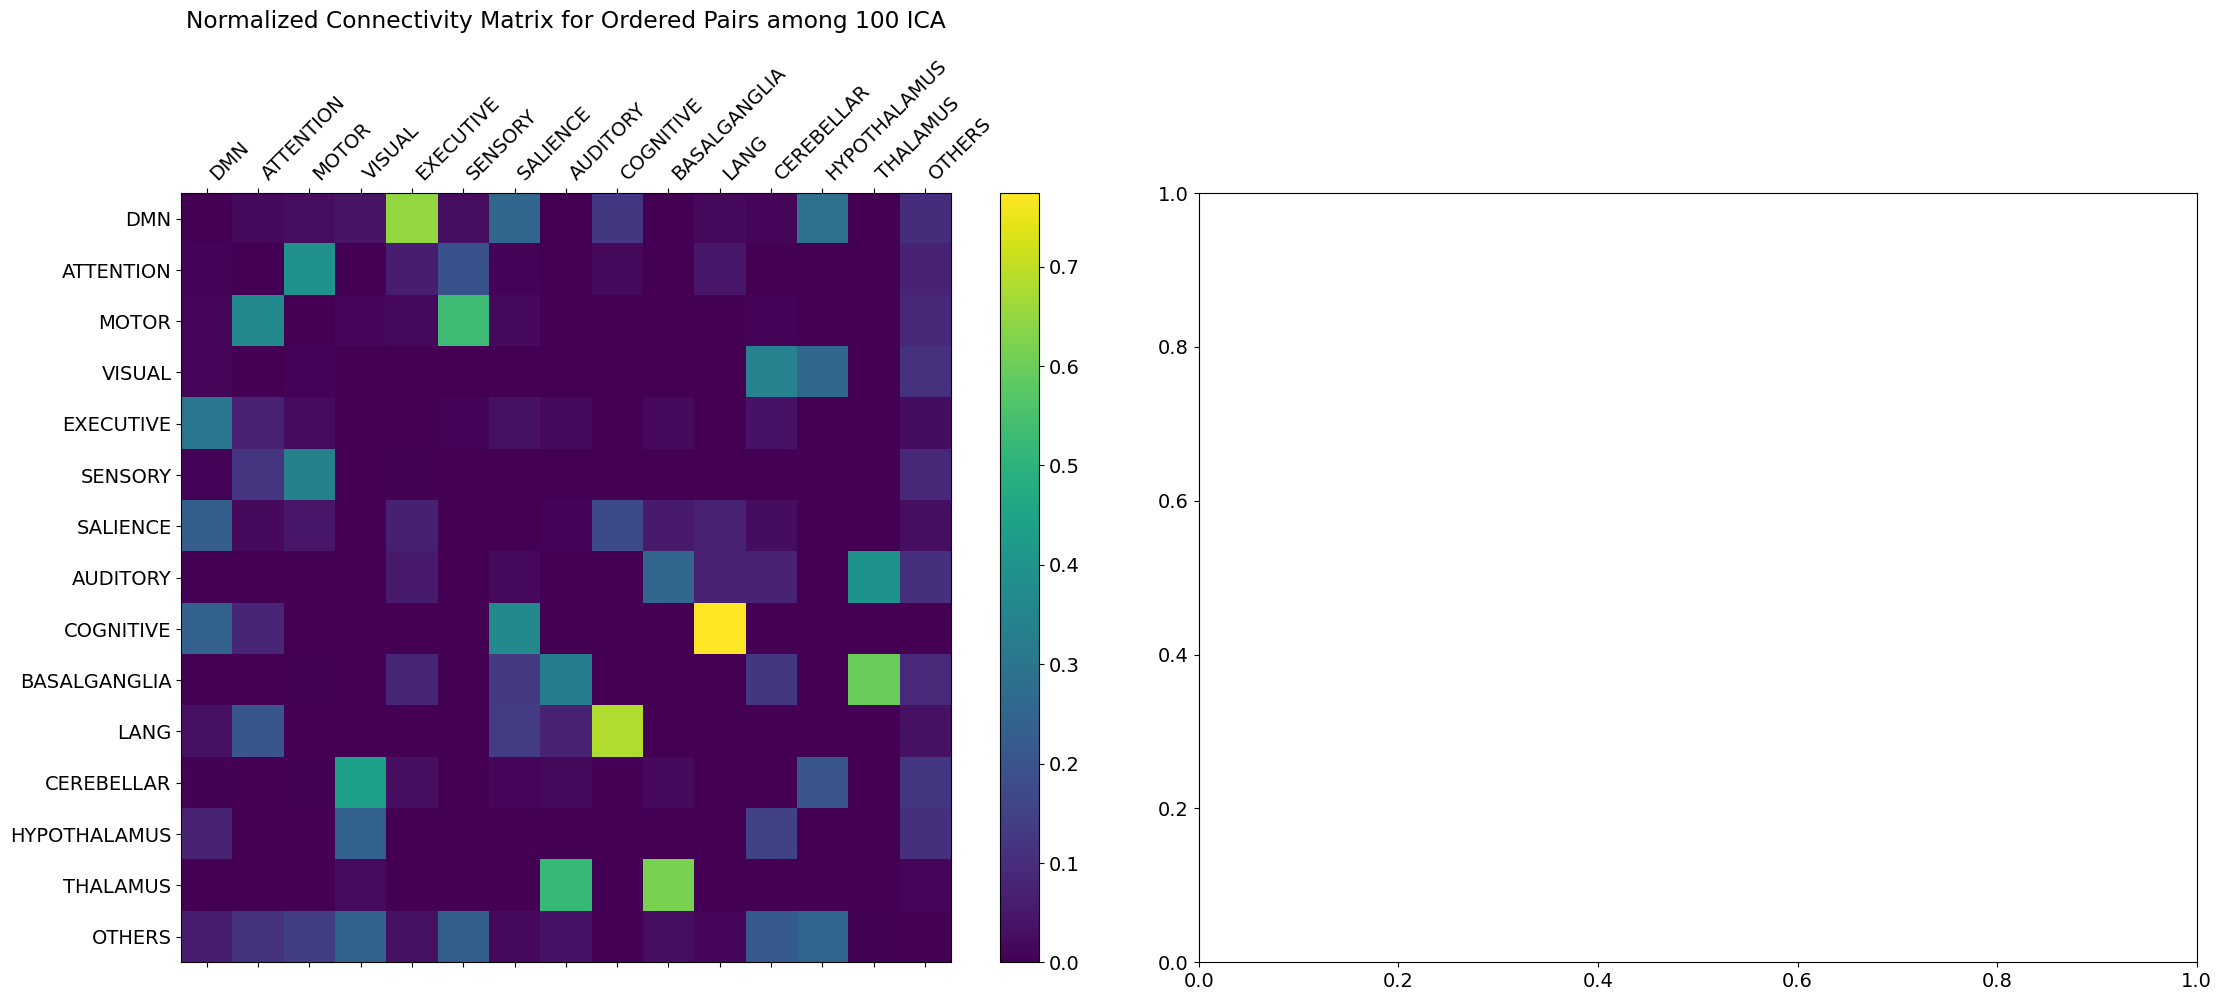

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")

# Filter rows with final column ending with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]

# Extract parent_network using corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Initialize an empty matrix for the combined connectivity matrix
combined_matrix = None
weights = [0,0,1,0,0,0]

# Compute and weight connectivity matrices for prefix sizes 1 to 5
for prefix_size in range(1, 6):
    # Create a column for the prefix
    if weights[prefix_size] == 0:
      continue
    prefix_column = '-'.join(data_new_5.iloc[:, :prefix_size].astype(str).columns)
    data_new_5[prefix_column] = data_new_5.iloc[:, :prefix_size].astype(str).apply(lambda row: '-'.join(row.values), axis=1)

    # Compute connectivity matrix
    # print(data_new_5)
    matrix = compute_new_connectivity_matrix(data_new_5, prefix_column)

    # Weight the matrix
    weighted_matrix = matrix * weights[prefix_size]

    # Add to the combined matrix
    combined_matrix = weighted_matrix if combined_matrix is None else combined_matrix + weighted_matrix

# Normalize the combined matrix by the sum of the row elements and then by the sum of the column elements
normalized_matrix = combined_matrix.div(combined_matrix.sum(axis=1), axis=0)
normalized_matrix = normalized_matrix.div(normalized_matrix.sum(axis=0), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix.columns)))
axes[0].set_yticks(range(len(normalized_matrix.columns)))
axes[0].set_xticklabels(normalized_matrix.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

Text(0.5, 1.0, 'Normalized Connectivity Matrix for Ordered Pairs among 100 ICA')

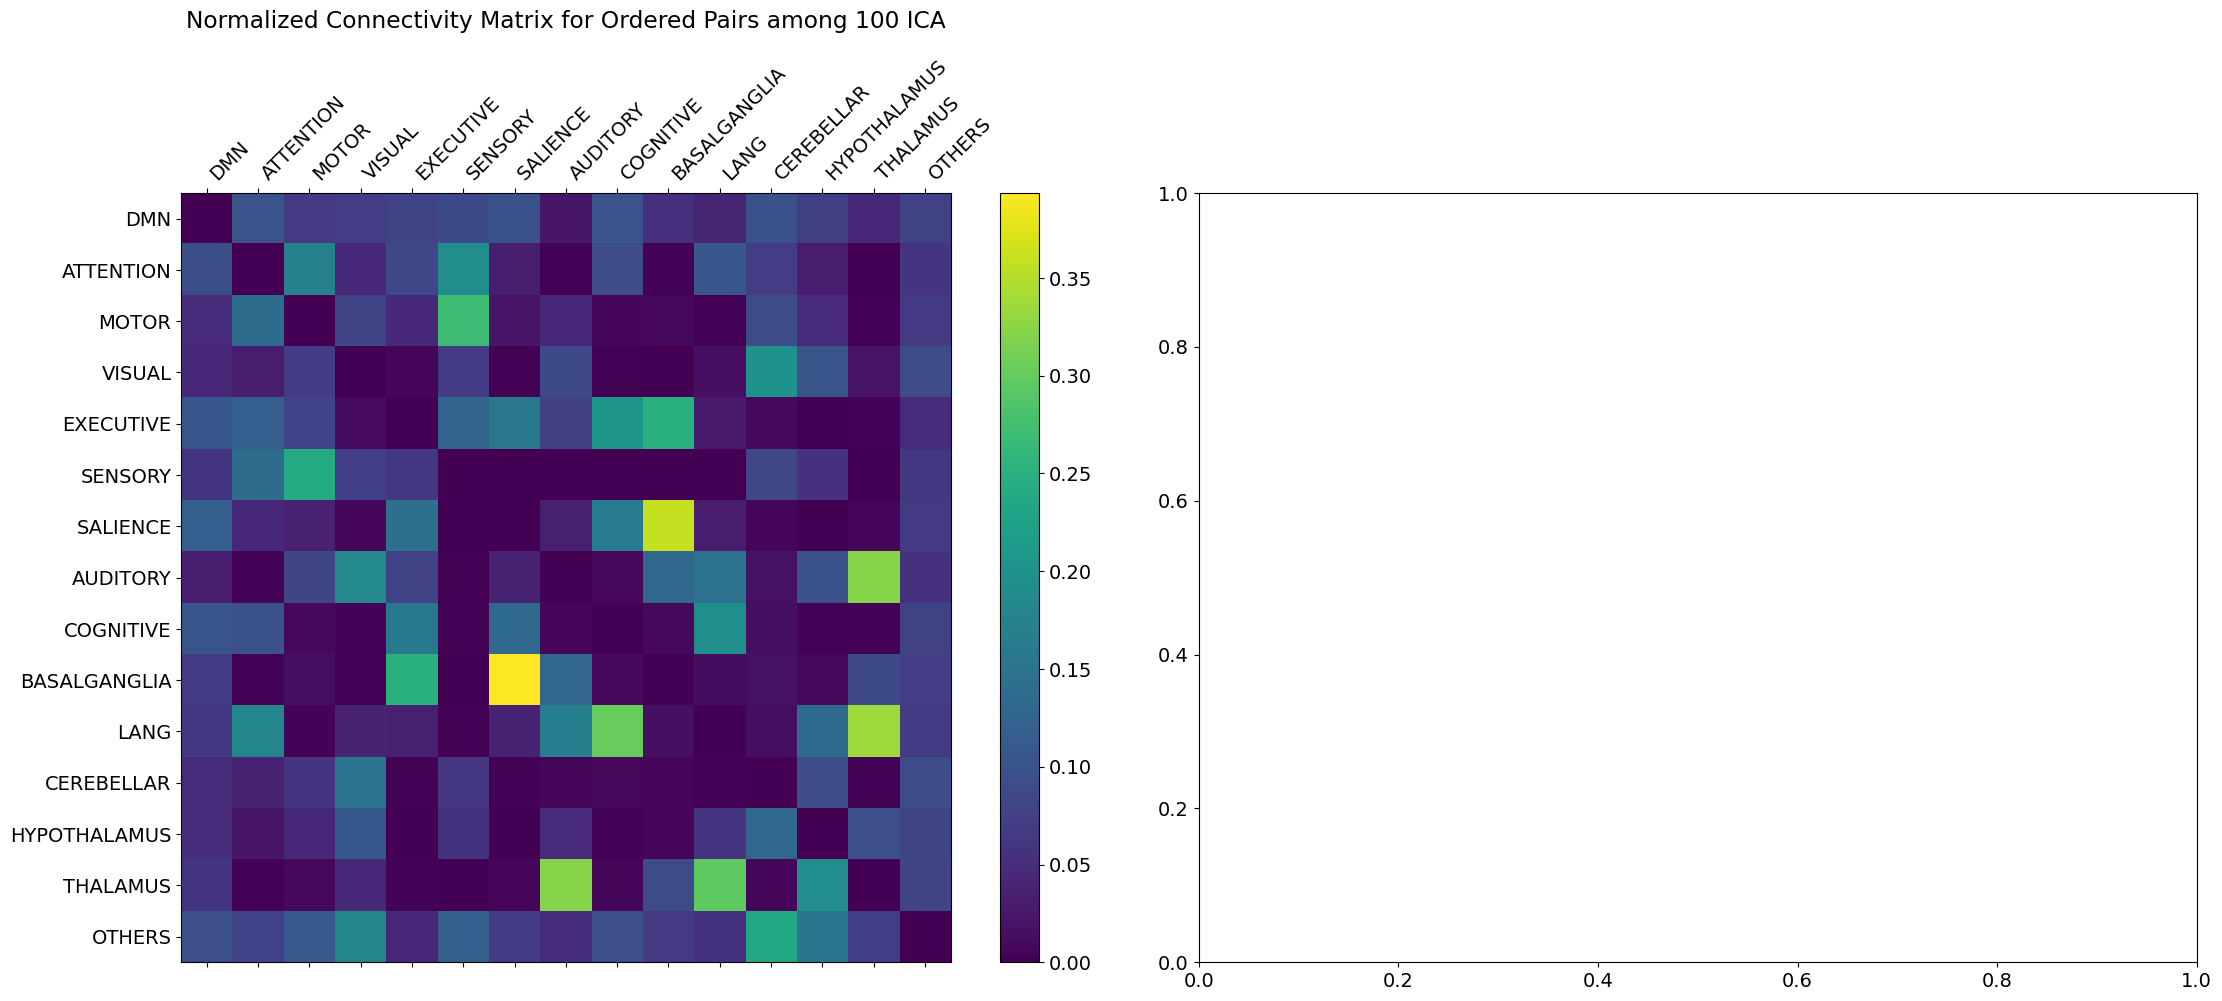

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#FIXED
# Load data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")

# Filter rows with final column ending with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]

# Extract parent_network using corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Initialize an empty matrix for the combined connectivity matrix
combined_matrix = None
weights = [0,1,2,3,4,5]

# Compute and weight connectivity matrices for prefix sizes 1 to 5
for prefix_size in range(1, 6):
    # Create a column for the prefix
    if weights[prefix_size] == 0:
      continue
    prefix_column = '-'.join(data_new_5.iloc[:, :prefix_size].astype(str).columns)
    data_new_5[prefix_column] = data_new_5.iloc[:, :prefix_size].astype(str).apply(lambda row: '-'.join(row.values), axis=1)

    # Compute connectivity matrix
    # print(data_new_5)
    matrix = compute_new_connectivity_matrix(data_new_5, prefix_column)

    # Weight the matrix
    weighted_matrix = matrix * weights[prefix_size]

    # Add to the combined matrix
    combined_matrix = weighted_matrix if combined_matrix is None else combined_matrix + weighted_matrix

# Normalize the combined matrix by the sum of the row elements and then by the sum of the column elements
normalized_matrix = combined_matrix.div(combined_matrix.sum(axis=1), axis=0)
normalized_matrix = normalized_matrix.div(normalized_matrix.sum(axis=0), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix.columns)))
axes[0].set_yticks(range(len(normalized_matrix.columns)))
axes[0].set_xticklabels(normalized_matrix.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#FIXED
# Load data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")

# Filter rows with final column ending with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]

# Extract parent_network using corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Initialize an empty matrix for the combined connectivity matrix
combined_matrix = None
weights = [0,1,2,3,4,5]

# Compute and weight connectivity matrices for prefix sizes 1 to 5
for prefix_size in range(1, 6):
    # Create a column for the prefix
    if weights[prefix_size] == 0:
      continue
    prefix_column = '-'.join(data_new_5.iloc[:, :prefix_size].astype(str).columns)
    data_new_5[prefix_column] = data_new_5.iloc[:, :prefix_size].astype(str).apply(lambda row: '-'.join(row.values), axis=1)

    # Compute connectivity matrix
    # print(data_new_5)
    matrix = compute_new_connectivity_matrix(data_new_5, prefix_column)

    # Weight the matrix
    weighted_matrix = matrix * weights[prefix_size]

    # Add to the combined matrix
    combined_matrix = weighted_matrix if combined_matrix is None else combined_matrix + weighted_matrix

# Normalize the combined matrix by the sum of the row elements and then by the sum of the column elements
normalized_matrix = combined_matrix.div(combined_matrix.sum(axis=1), axis=0)
normalized_matrix = normalized_matrix.div(normalized_matrix.sum(axis=0), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix.columns)))
axes[0].set_yticks(range(len(normalized_matrix.columns)))
axes[0].set_xticklabels(normalized_matrix.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

Text(0.5, 1.0, 'Normalized Connectivity Matrix for Ordered Pairs among 100 ICA')

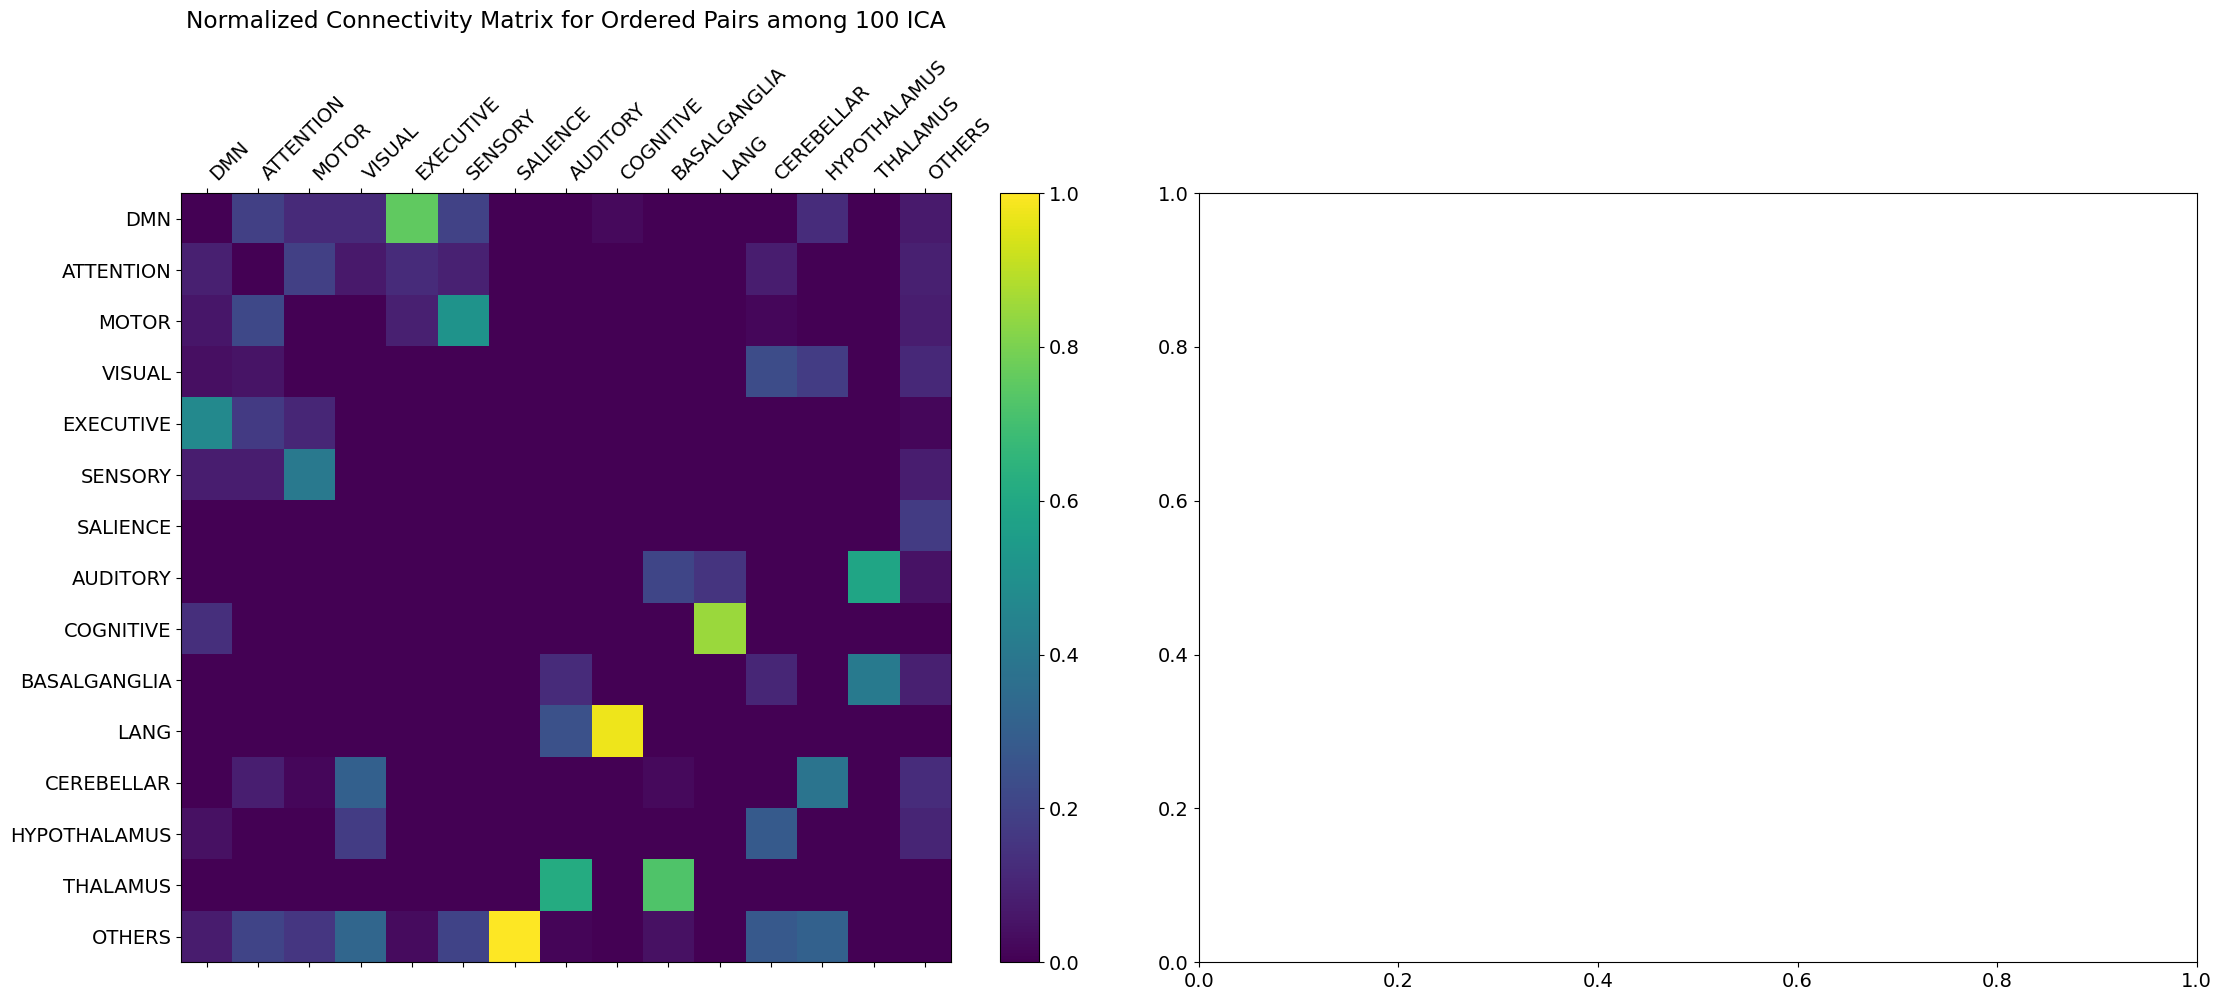

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")

# Filter rows with final column ending with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]

# Extract parent_network using corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Initialize an empty matrix for the combined connectivity matrix
combined_matrix = None
weights = [0,0,0,1,0,0]

# Compute and weight connectivity matrices for prefix sizes 1 to 5
for prefix_size in range(1, 6):
    # Create a column for the prefix
    if weights[prefix_size] == 0:
      continue
    prefix_column = '-'.join(data_new_5.iloc[:, :prefix_size].astype(str).columns)
    data_new_5[prefix_column] = data_new_5.iloc[:, :prefix_size].astype(str).apply(lambda row: '-'.join(row.values), axis=1)

    # Compute connectivity matrix
    matrix = compute_new_connectivity_matrix(data_new_5, prefix_column)

    # Weight the matrix
    weighted_matrix = matrix * weights[prefix_size]

    # Add to the combined matrix
    combined_matrix = weighted_matrix if combined_matrix is None else combined_matrix + weighted_matrix

# Normalize the combined matrix by the sum of the row elements and then by the sum of the column elements
normalized_matrix = combined_matrix.div(combined_matrix.sum(axis=1), axis=0)
normalized_matrix = normalized_matrix.div(normalized_matrix.sum(axis=0), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix.columns)))
axes[0].set_yticks(range(len(normalized_matrix.columns)))
axes[0].set_xticklabels(normalized_matrix.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

Text(0.5, 1.0, 'Normalized Connectivity Matrix for Ordered Pairs among 100 ICA')

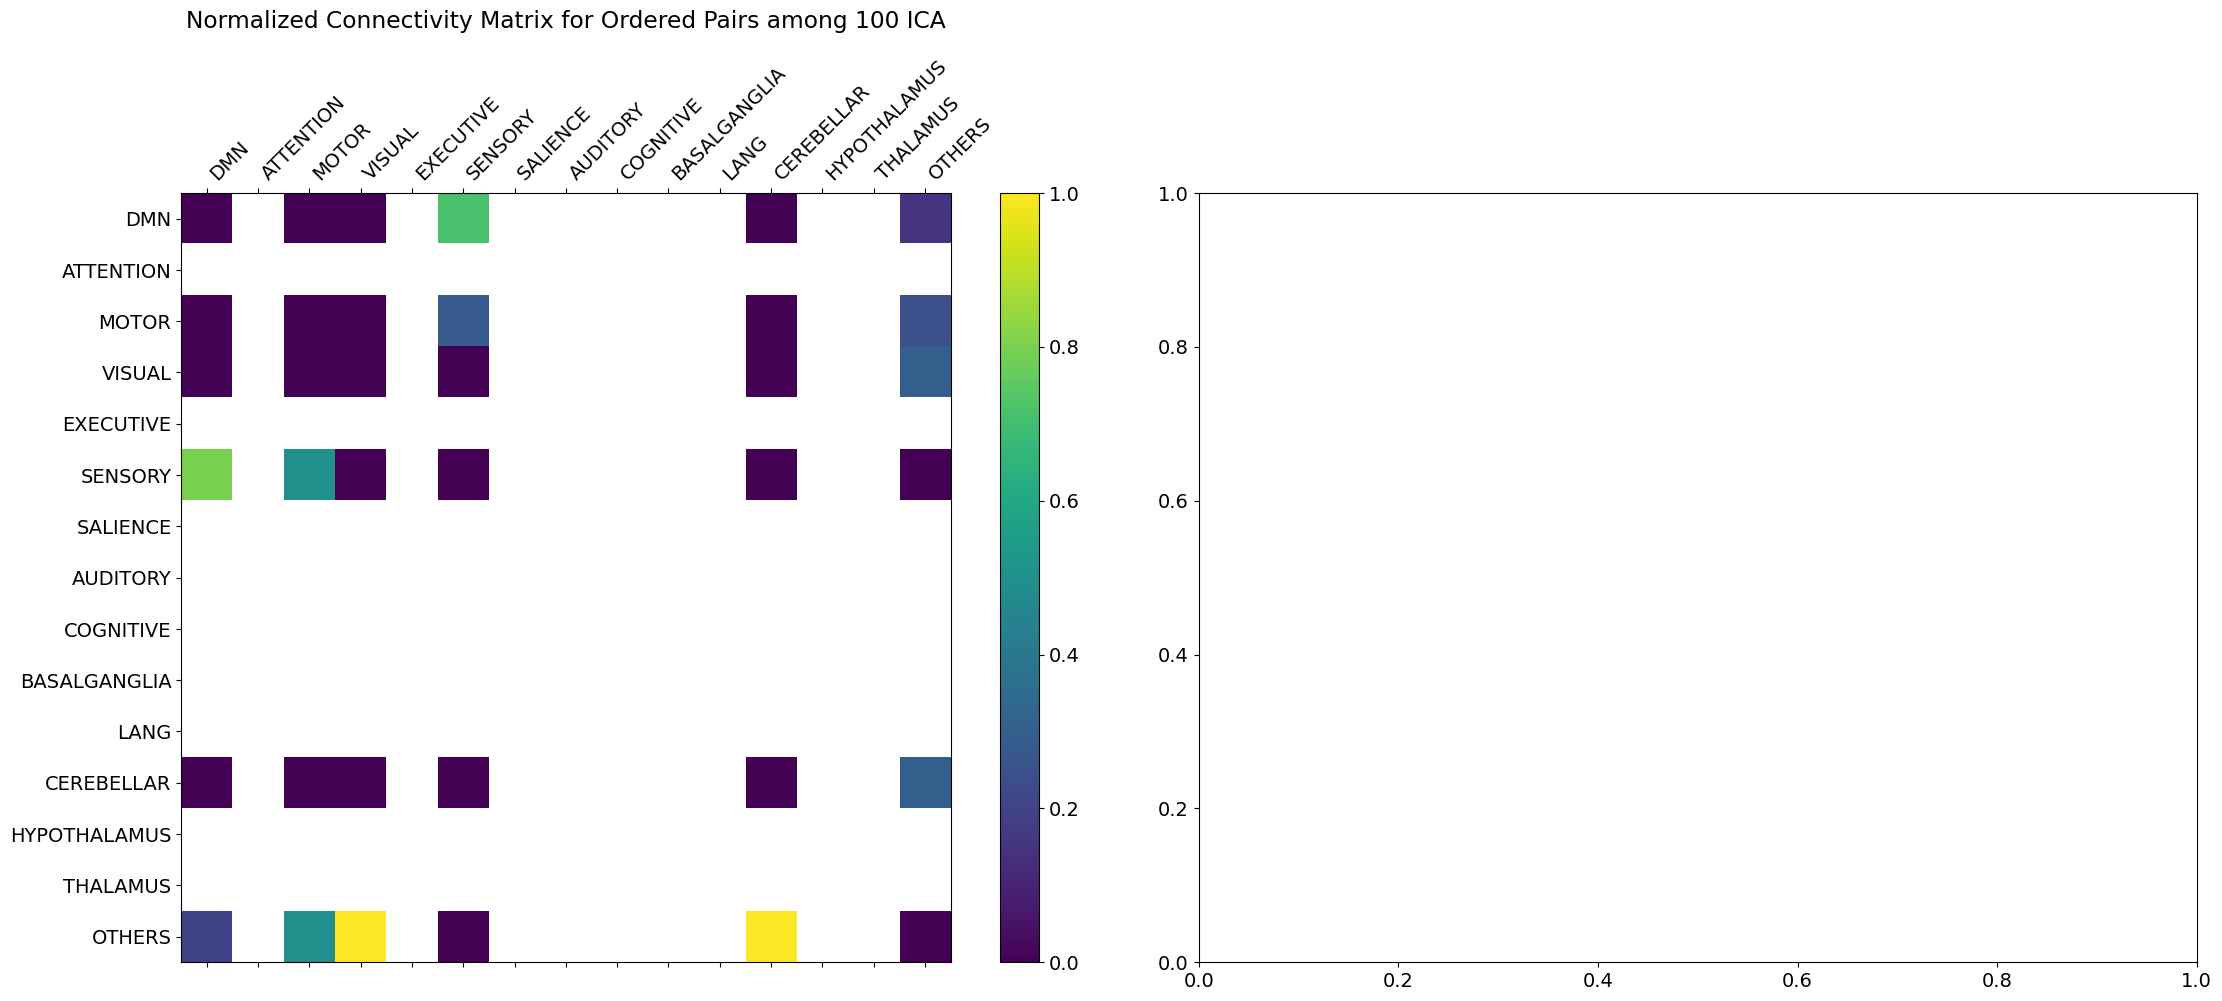

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data_new_5 = pd.read_csv("corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv")

# Filter rows with final column ending with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]

# Extract parent_network using corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Initialize an empty matrix for the combined connectivity matrix
combined_matrix = None
weights = [0,0,0,0,0,1]

# Compute and weight connectivity matrices for prefix sizes 1 to 5
for prefix_size in range(1, 6):
    # Create a column for the prefix
    if weights[prefix_size] == 0:
      continue
    prefix_column = '-'.join(data_new_5.iloc[:, :prefix_size].astype(str).columns)
    data_new_5[prefix_column] = data_new_5.iloc[:, :prefix_size].astype(str).apply(lambda row: '-'.join(row.values), axis=1)

    # Compute connectivity matrix
    matrix = compute_new_connectivity_matrix(data_new_5, prefix_column)

    # Weight the matrix
    weighted_matrix = matrix * weights[prefix_size]

    # Add to the combined matrix
    combined_matrix = weighted_matrix if combined_matrix is None else combined_matrix + weighted_matrix

# Normalize the combined matrix by the sum of the row elements and then by the sum of the column elements
normalized_matrix = combined_matrix.div(combined_matrix.sum(axis=1), axis=0)
normalized_matrix = normalized_matrix.div(normalized_matrix.sum(axis=0), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
plt.rcParams.update({'font.size': 14})
# Plot for ordered pairs
cax1 = axes[0].matshow(normalized_matrix, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(normalized_matrix.columns)))
axes[0].set_yticks(range(len(normalized_matrix.columns)))
axes[0].set_xticklabels(normalized_matrix.columns, rotation=45, ha='left')
axes[0].set_yticklabels(normalized_matrix.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

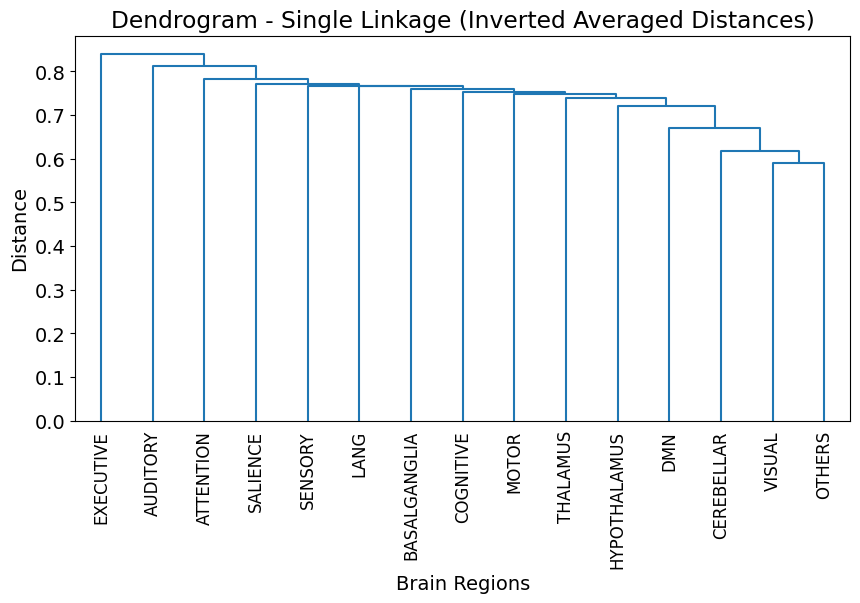

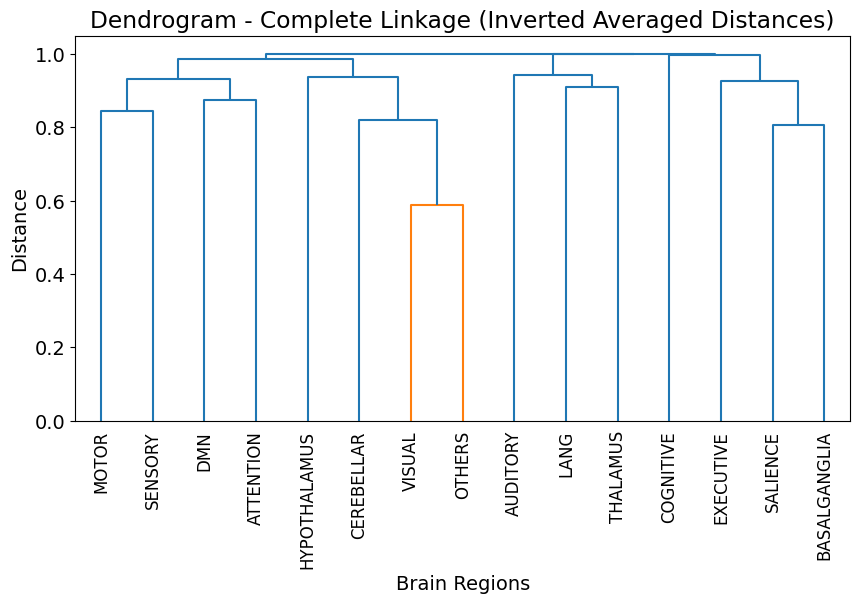

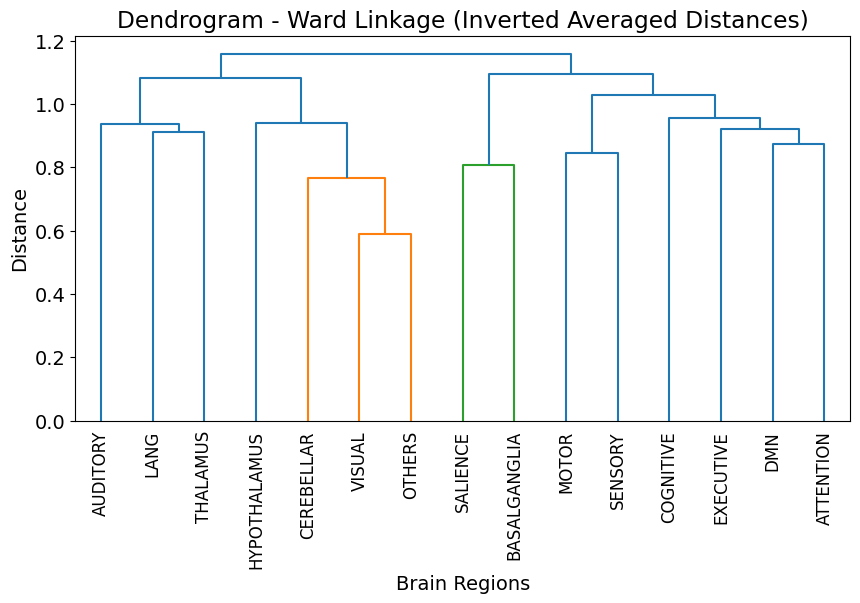

In [ ]:
# Function to plot dendrogram with brain region labels
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


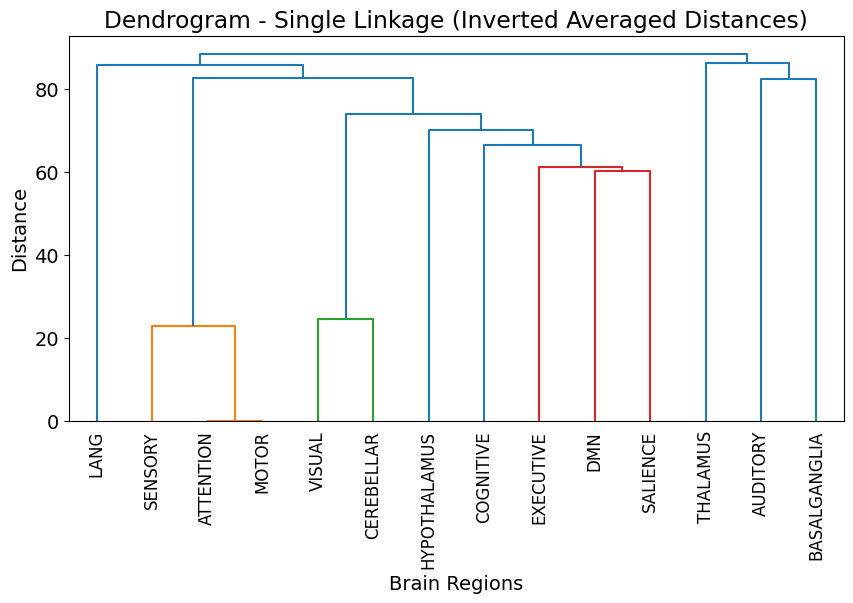

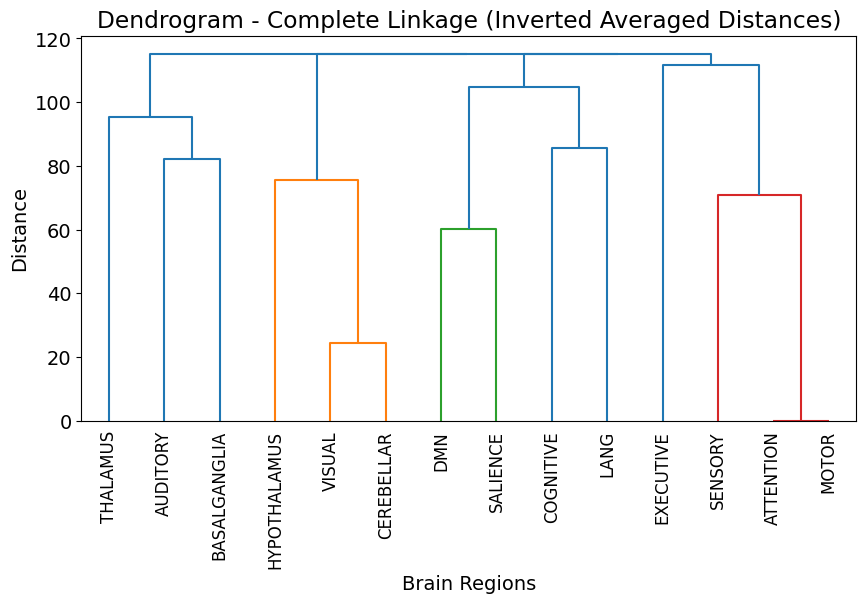

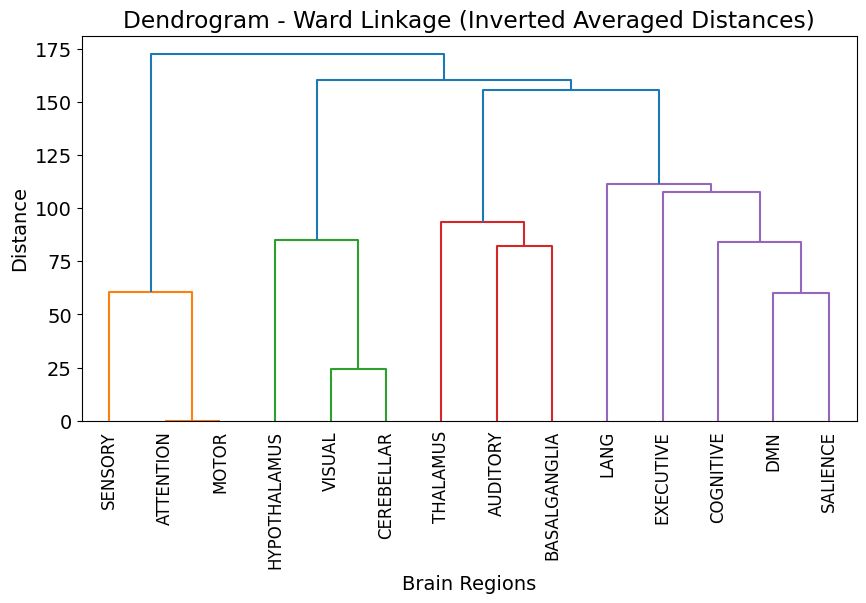

In [ ]:
# Function to plot dendrogram with brain region labels
#FIXED
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(sym_brain_regions_df.max().max() - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


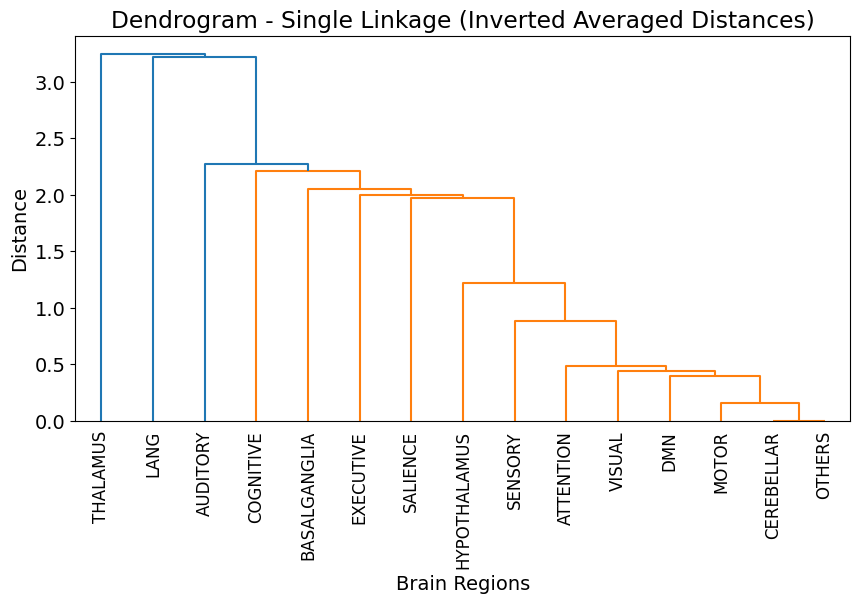

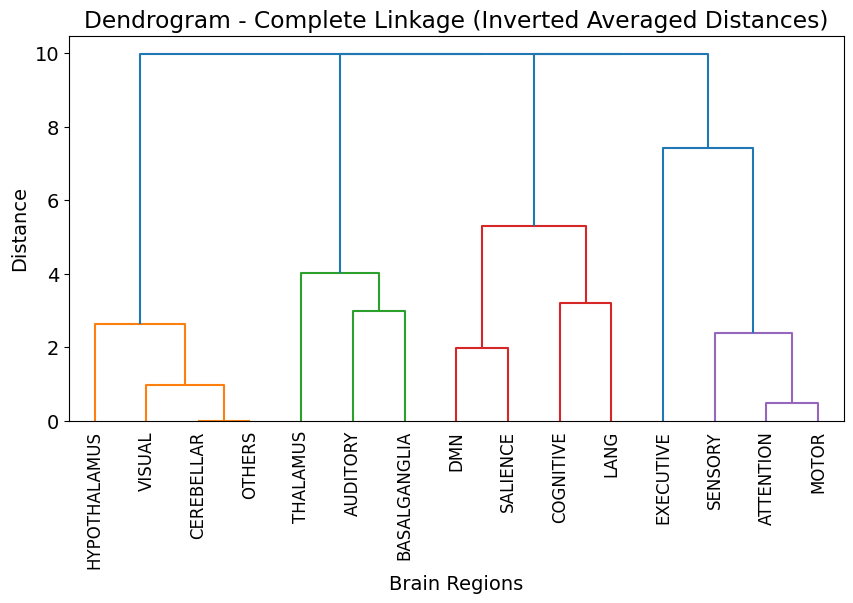

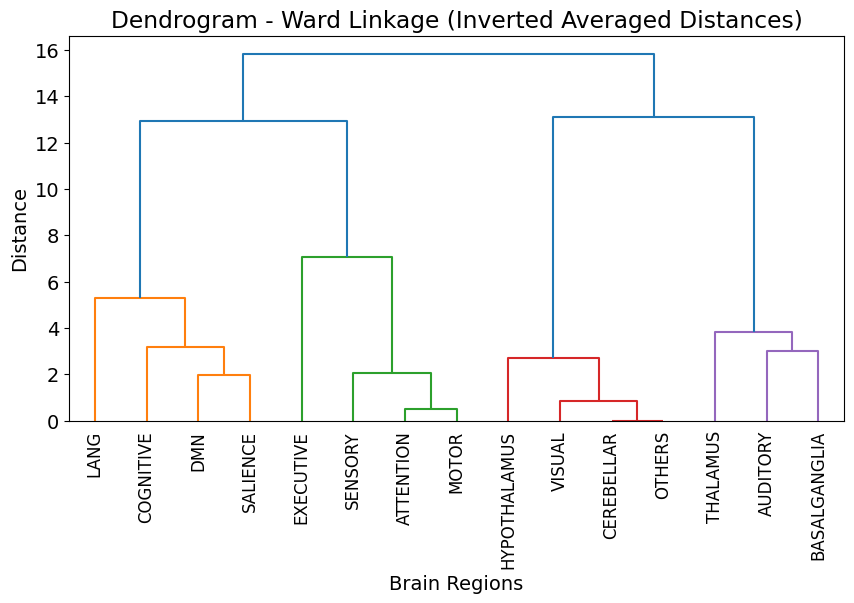

In [ ]:
# Function to plot dendrogram with brain region labels
#FIXED
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(sym_brain_regions_df.max().max() - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


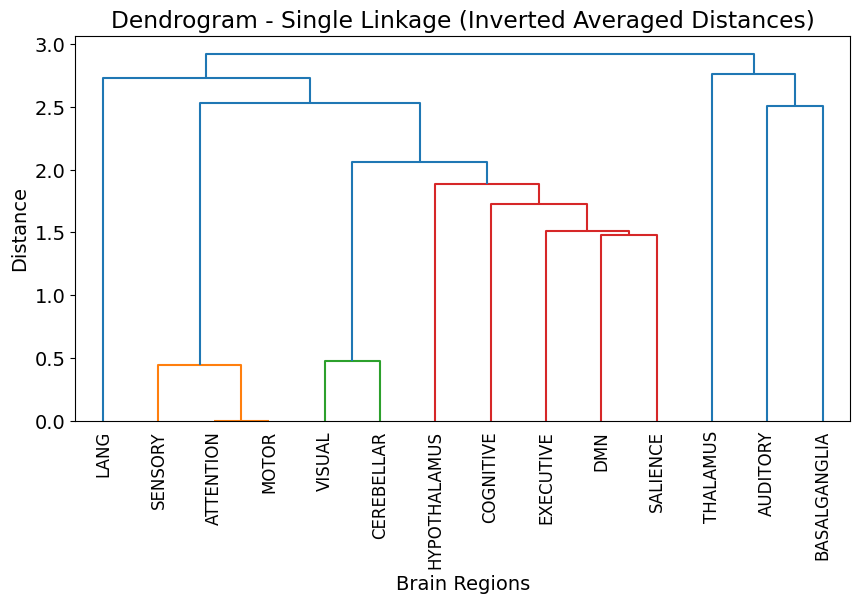

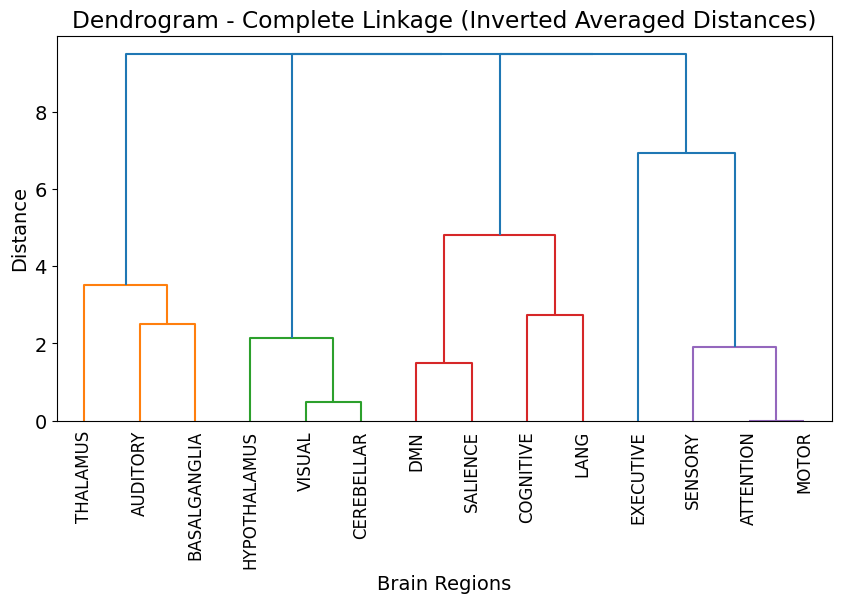

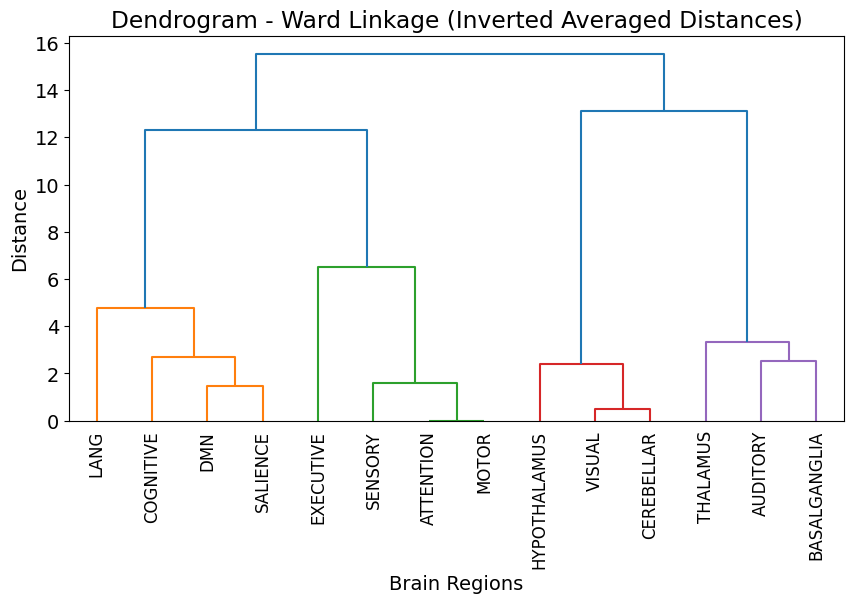

In [ ]:
# Function to plot dendrogram with brain region labels
#FIXED
from scipy.cluster.hierarchy import dendrogram, linkage
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
# print(sym_brain_regions_df.max().max())
inverted_dist_array = squareform(sym_brain_regions_df.max().max() - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


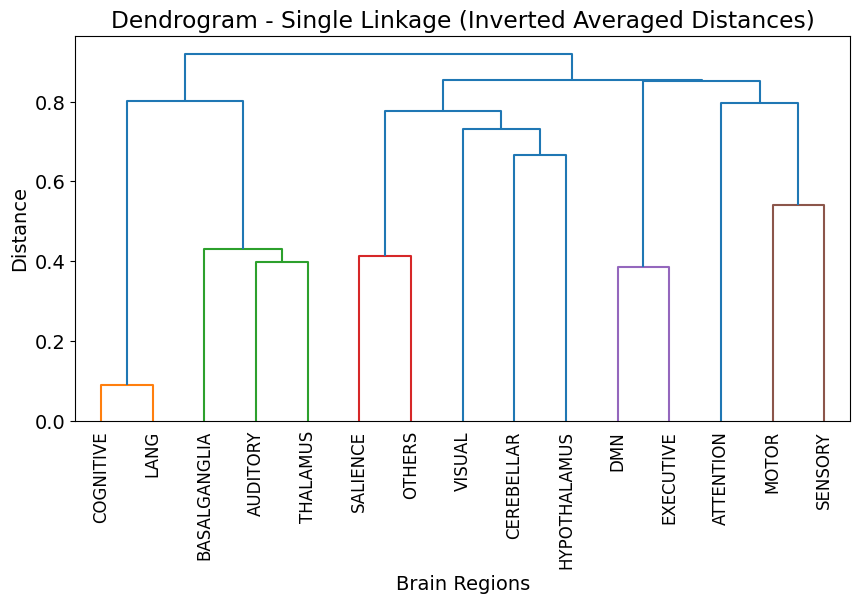

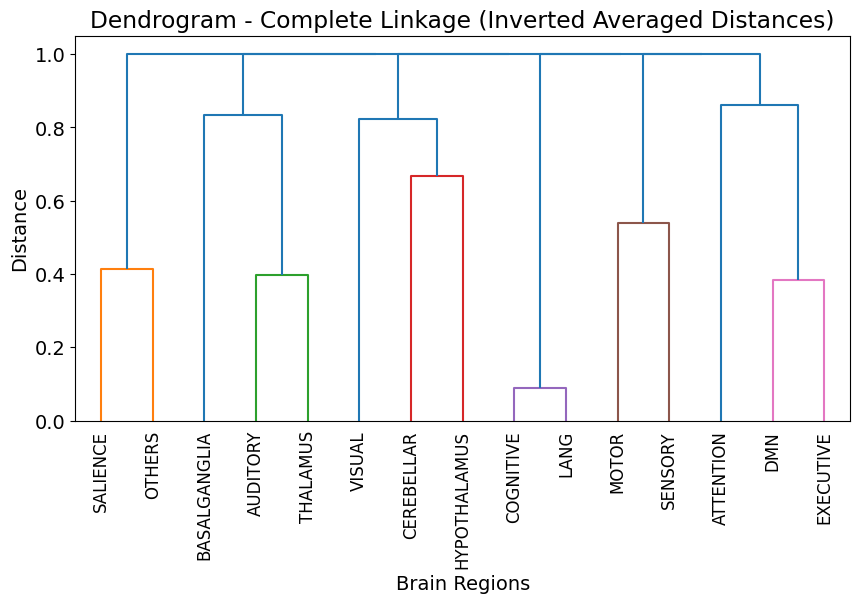

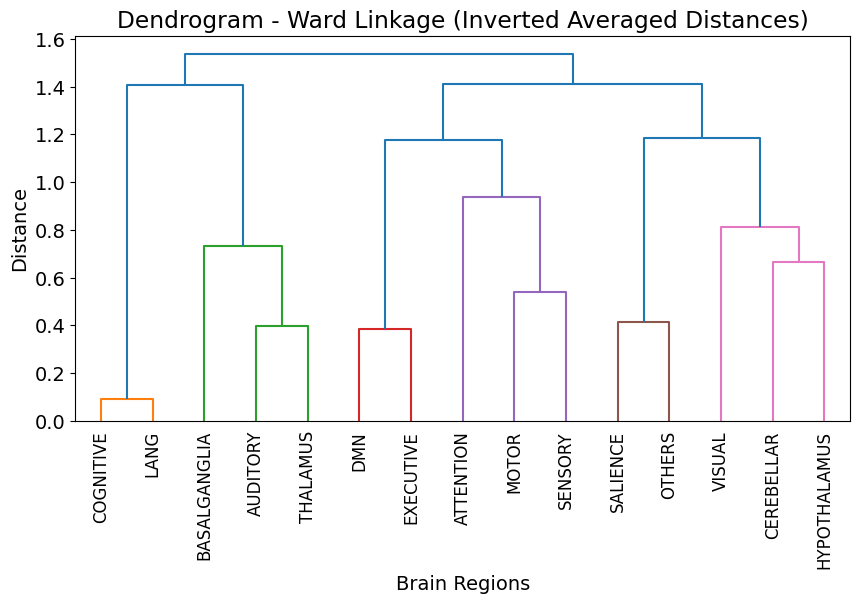

In [ ]:
# Function to plot dendrogram with brain region labels
brain_regions_df = normalized_matrix_ordered_triplet_new_5.copy()
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_triplet = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_triplet = sym_brain_regions_df.iloc[order_avg_inverted_complete_triplet, order_avg_inverted_complete_triplet]


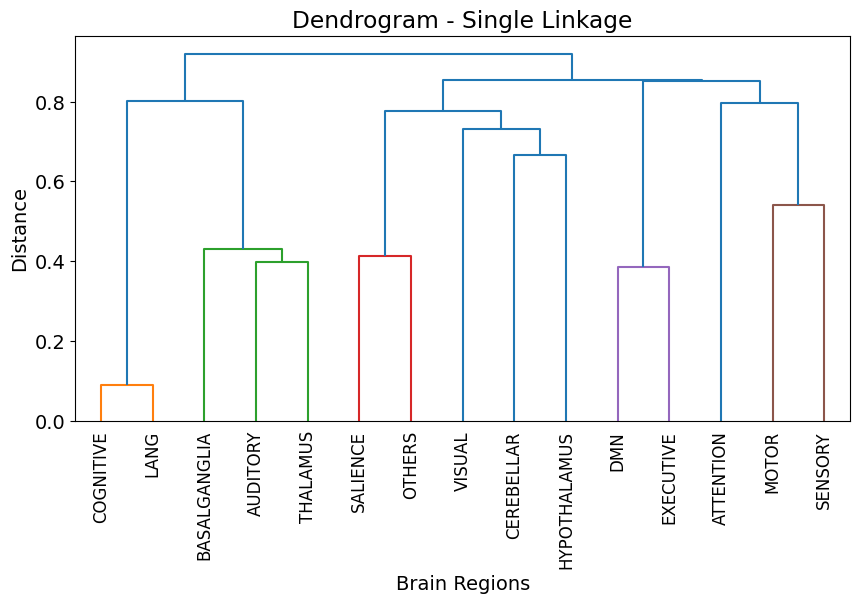

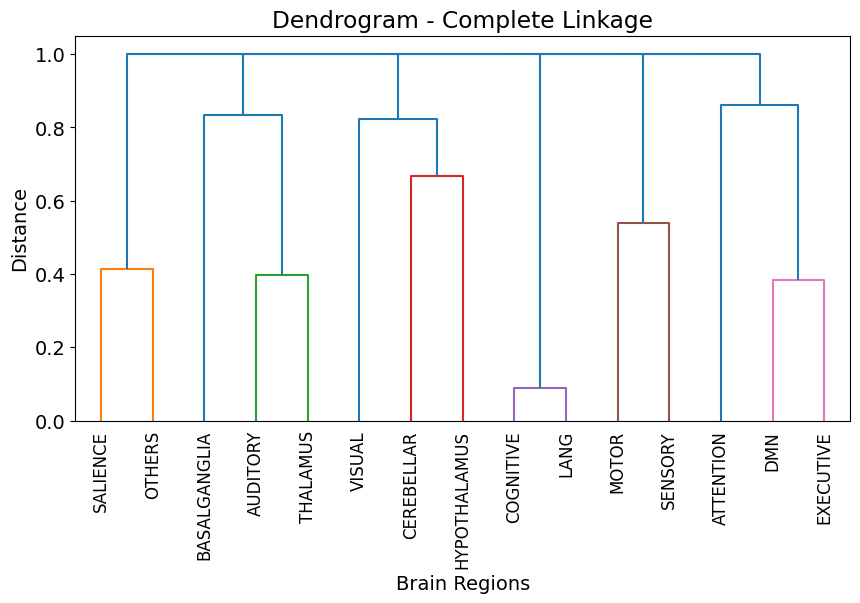

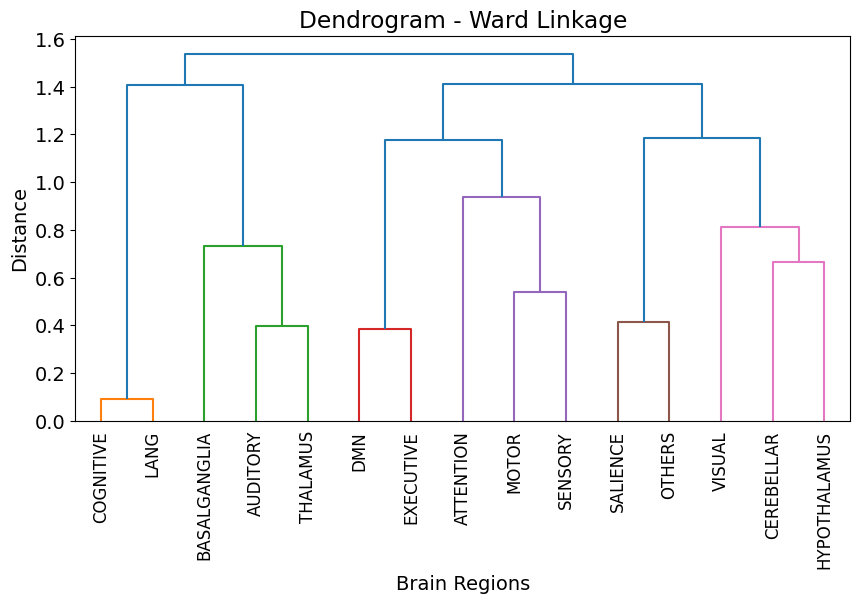

In [ ]:
# Function to plot dendrogram with brain region labels
brain_regions_df = normalized_matrix_ordered_triplet_new_5.copy()
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_triplet = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_triplet = sym_brain_regions_df.iloc[order_avg_inverted_complete_triplet, order_avg_inverted_complete_triplet]


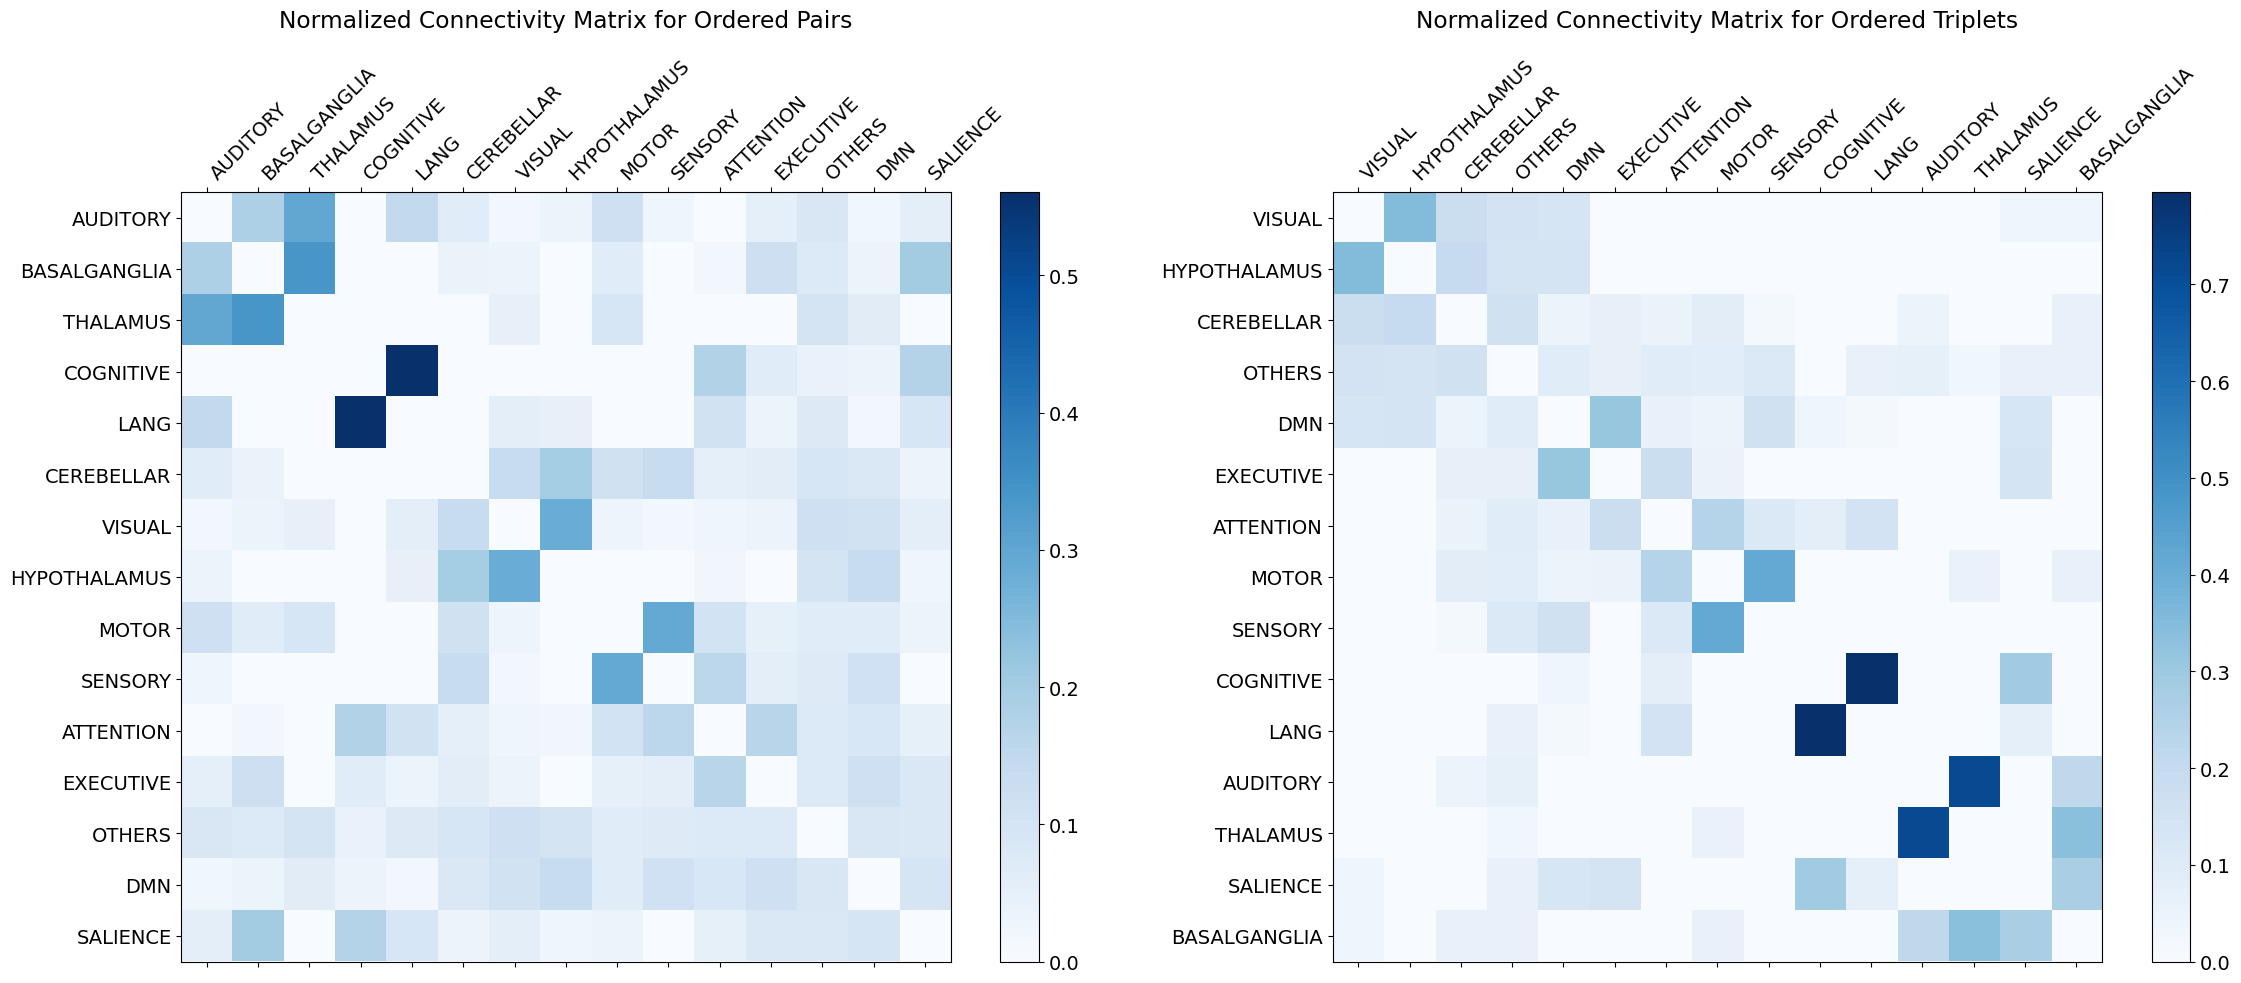

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



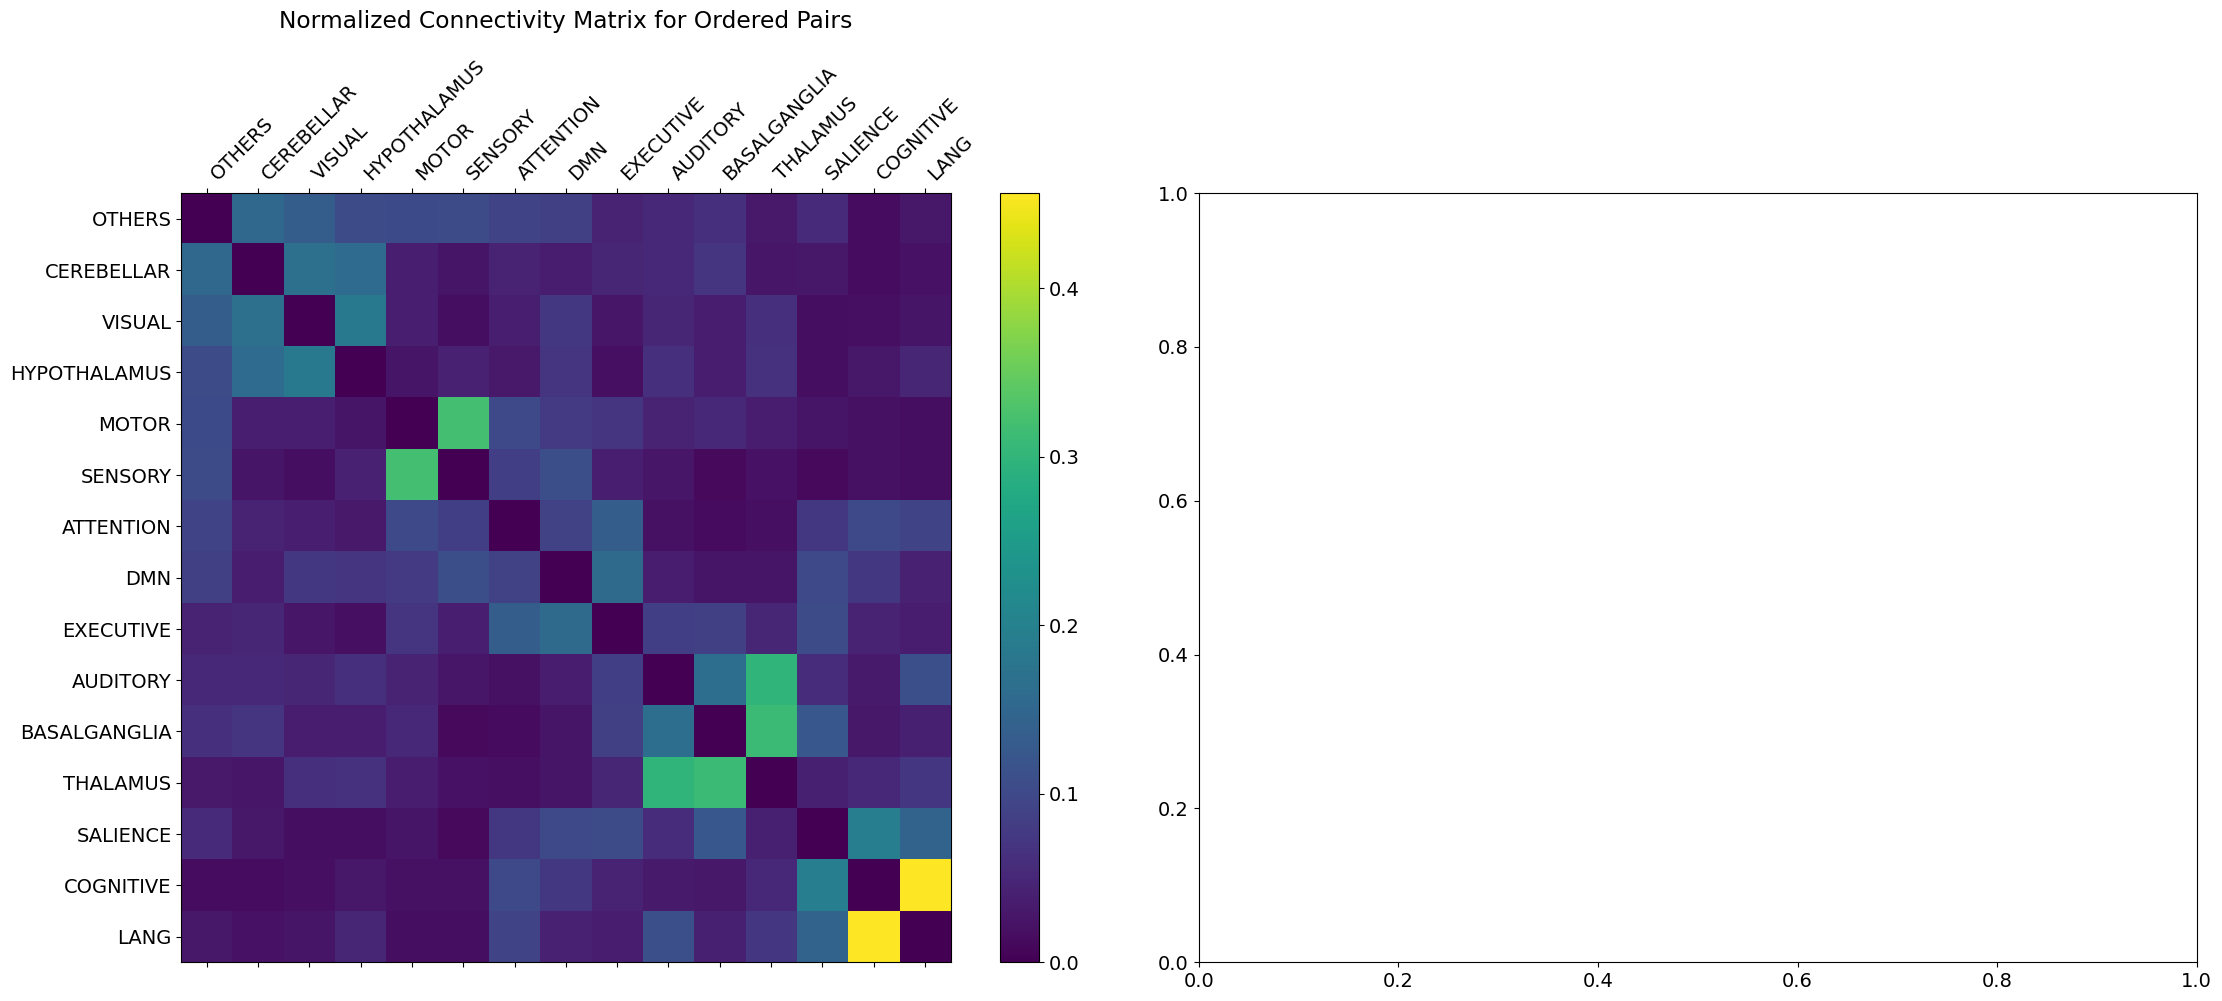

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



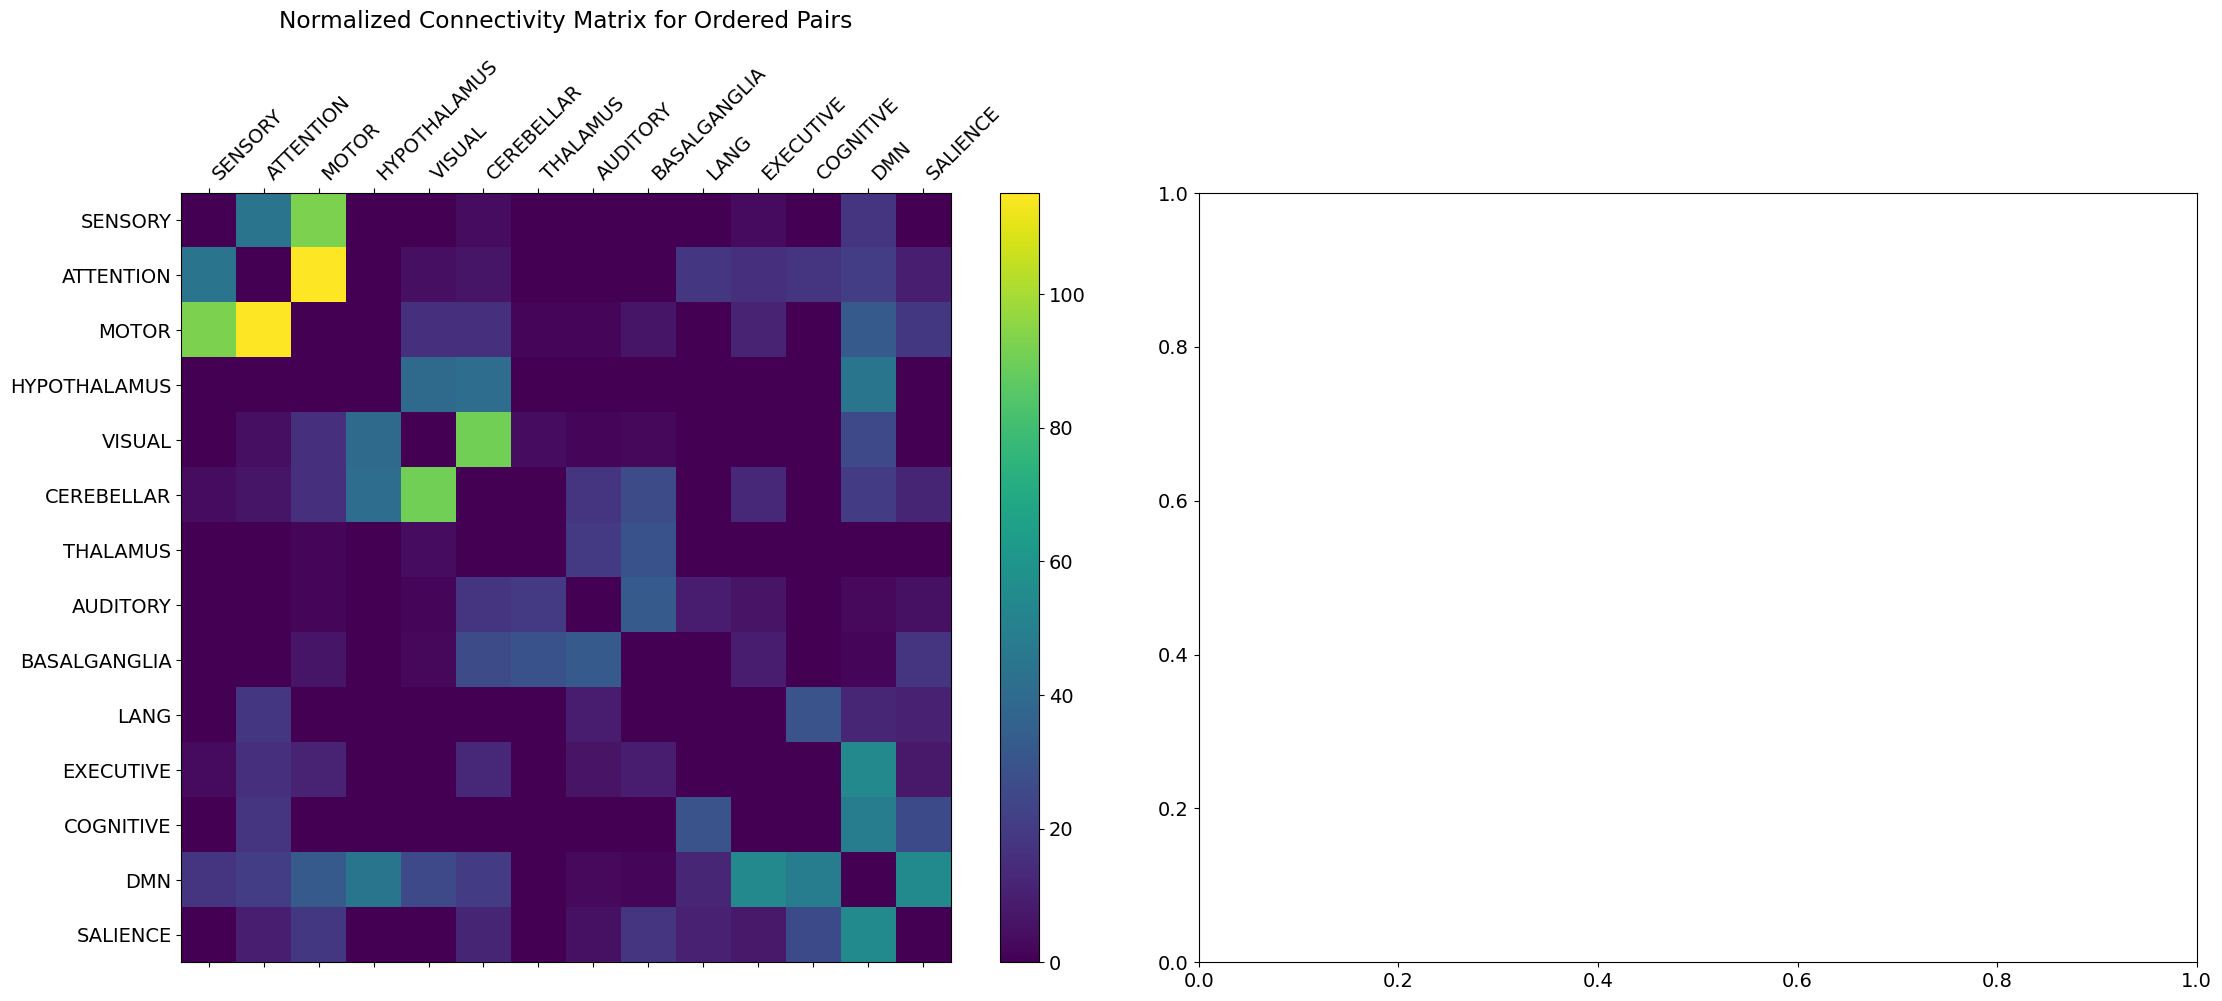

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#FIXED, SQRT NORMALIZATION
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



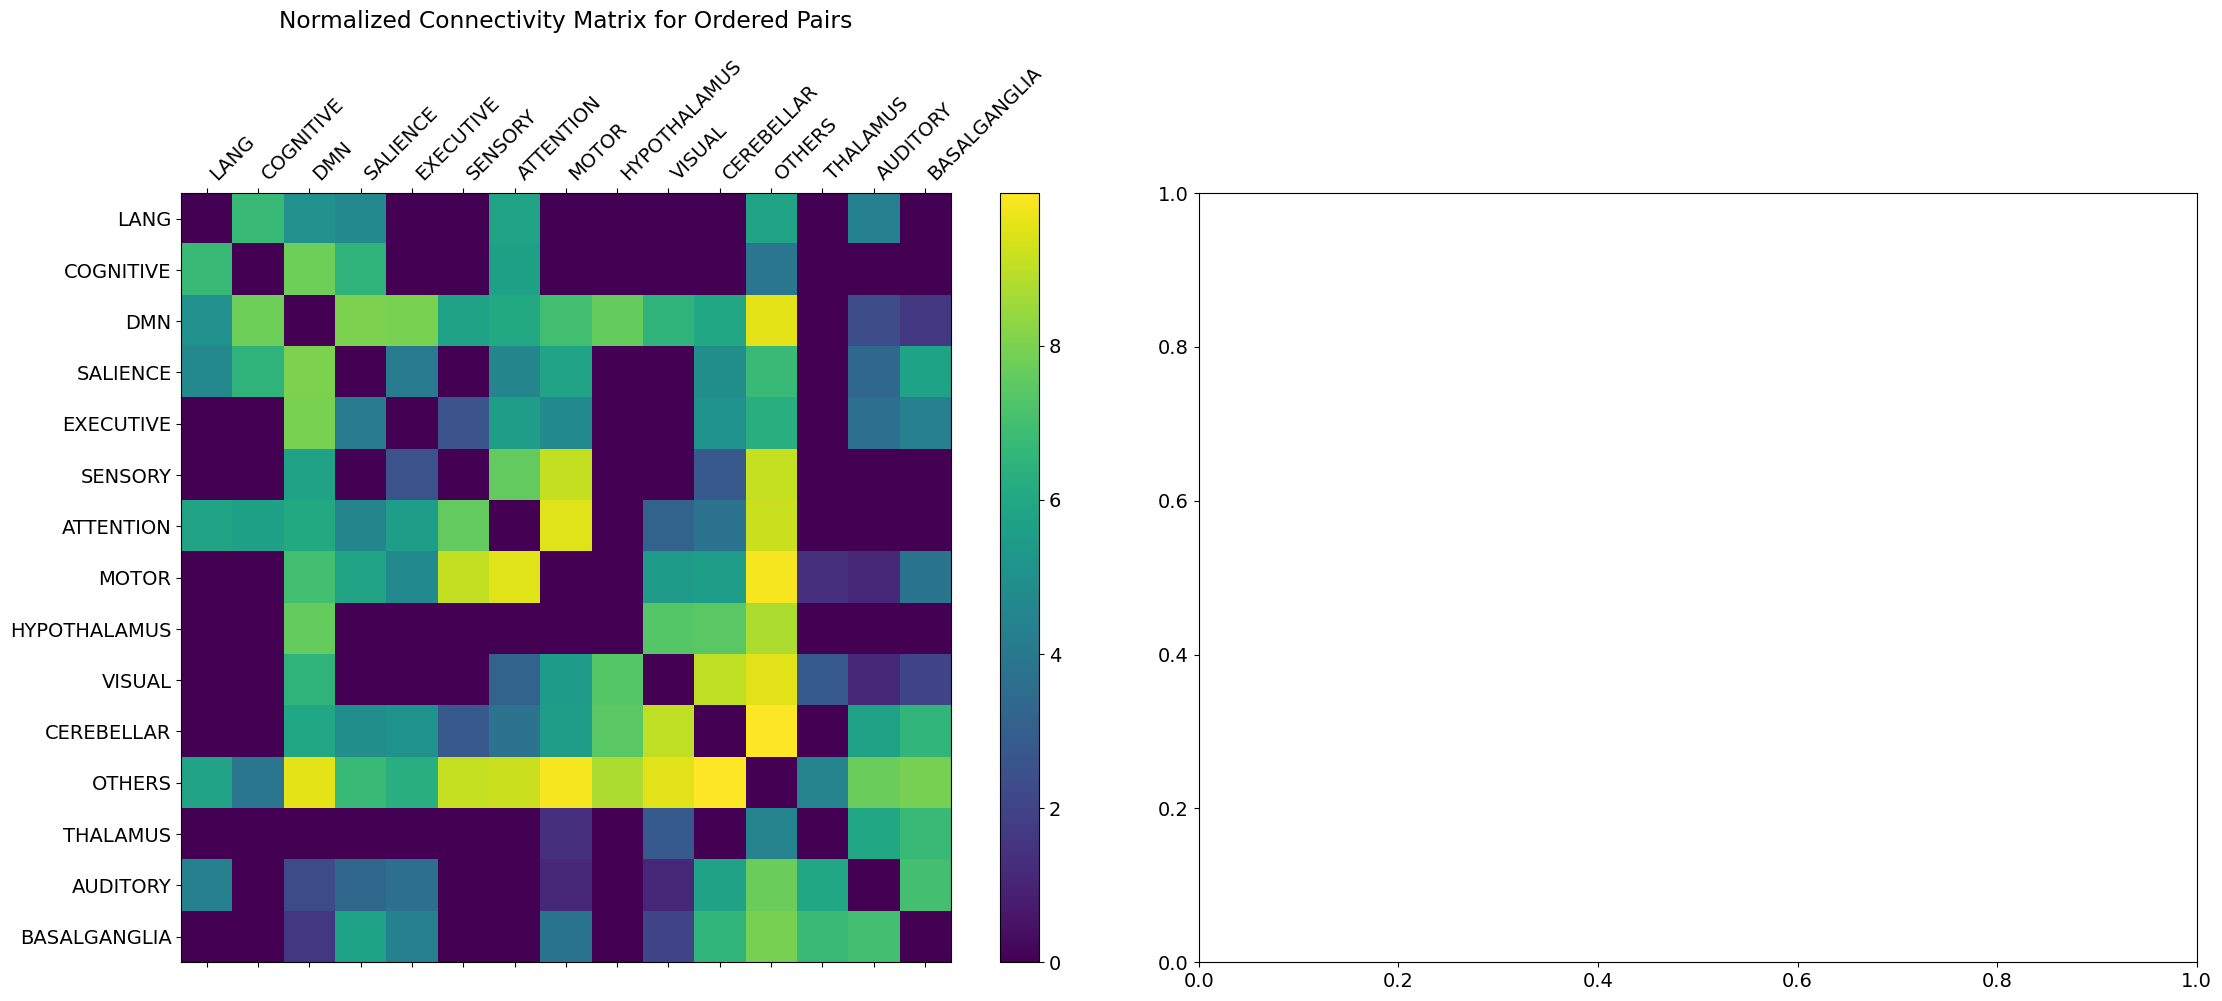

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#FIXED, LOG NORMALIZATION
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



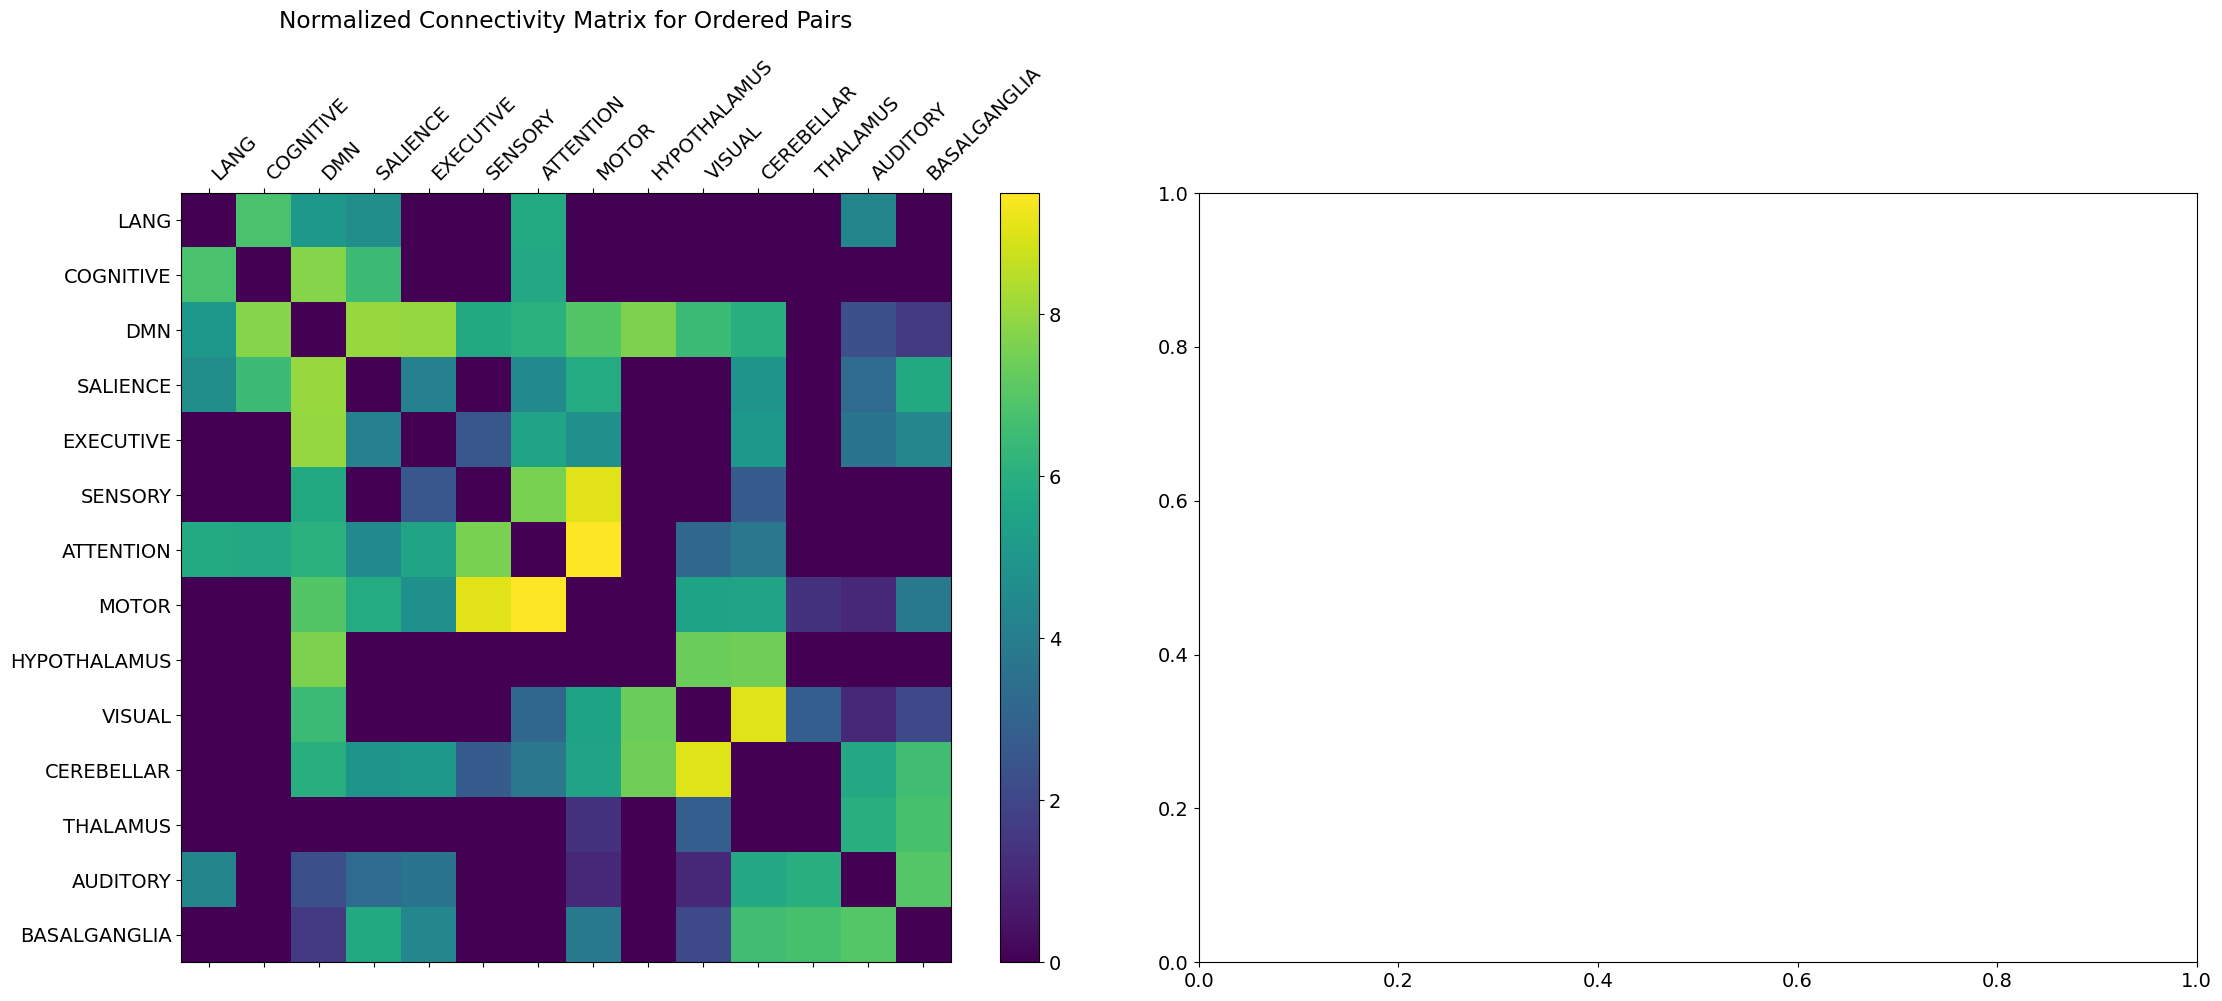

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)
#FIXED, LOG NORMALIZATION
# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



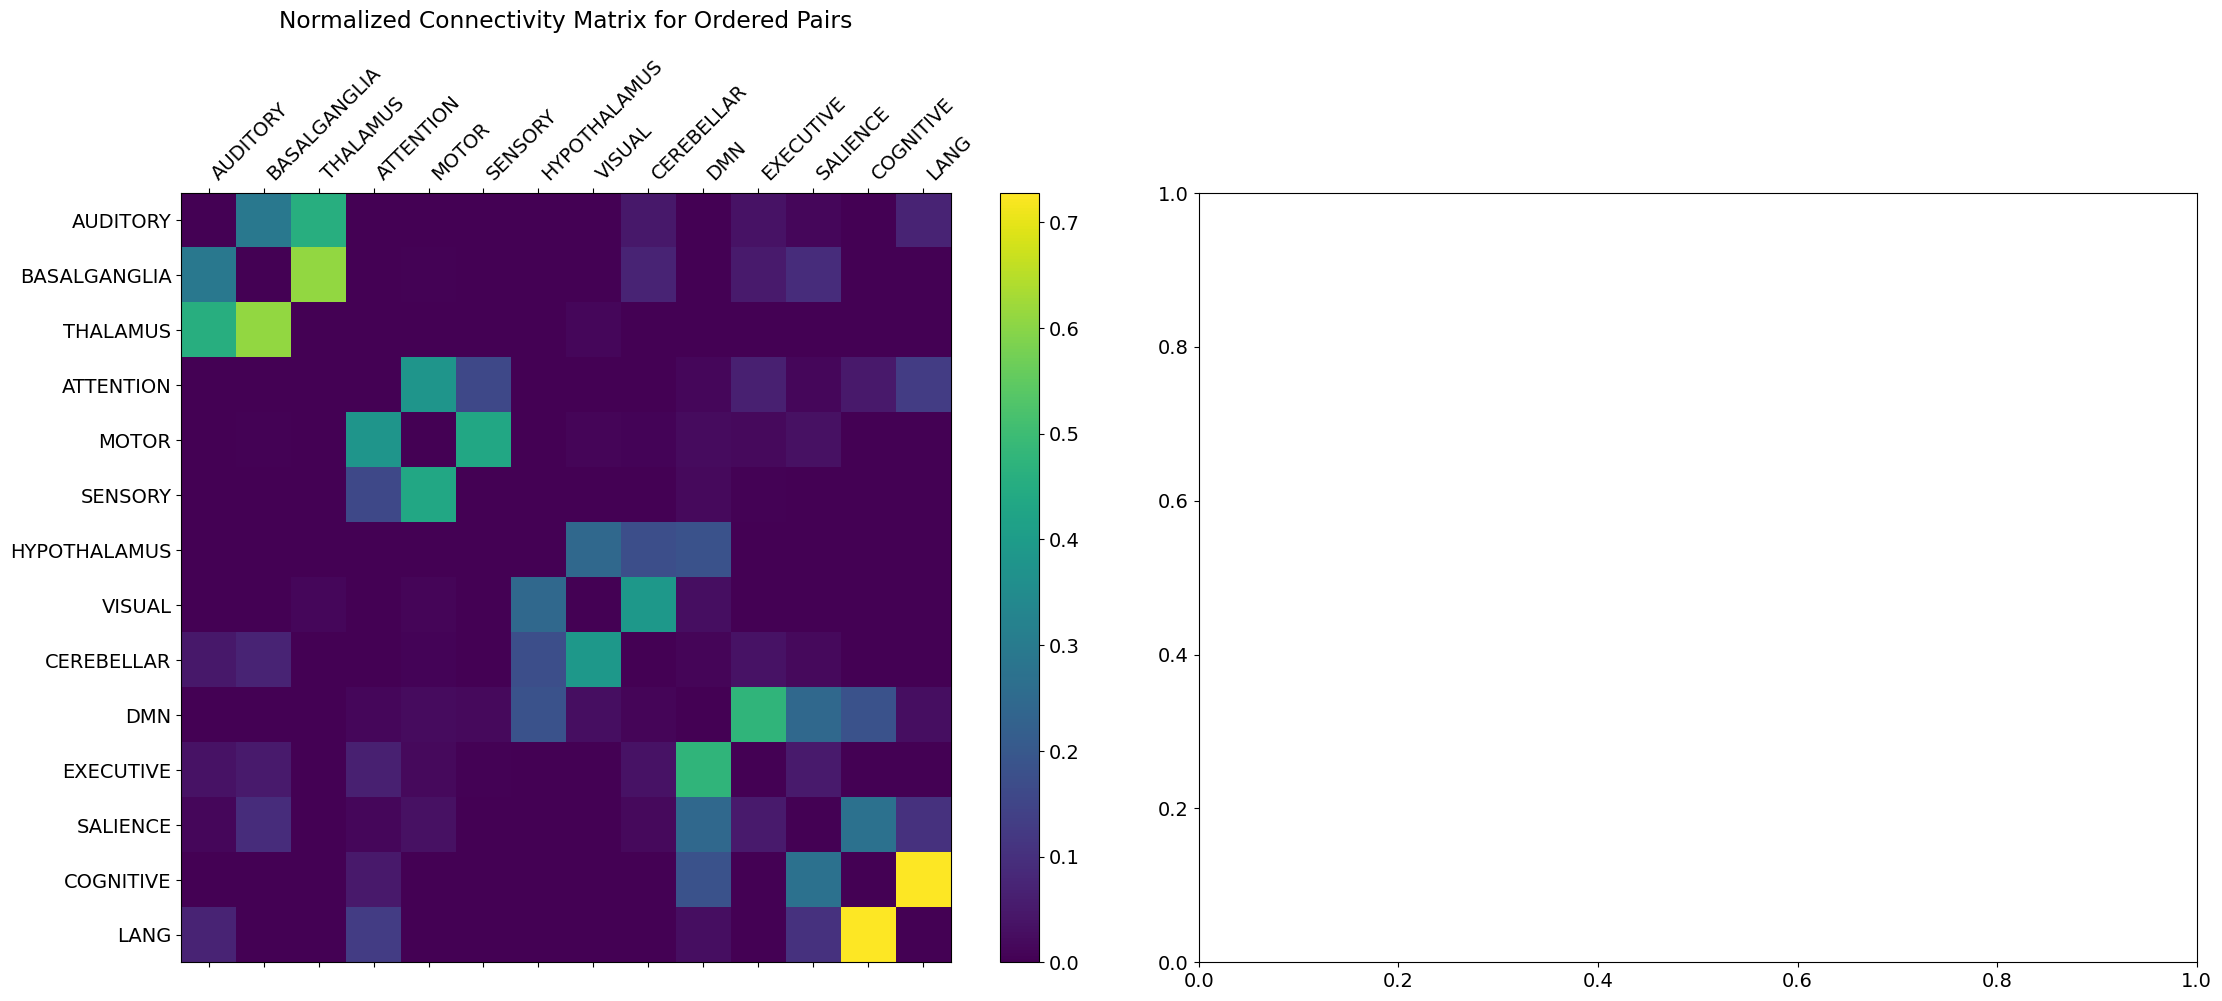

In [ ]:
#FIXED, ROW AND COLUMN NORMALIZATION
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



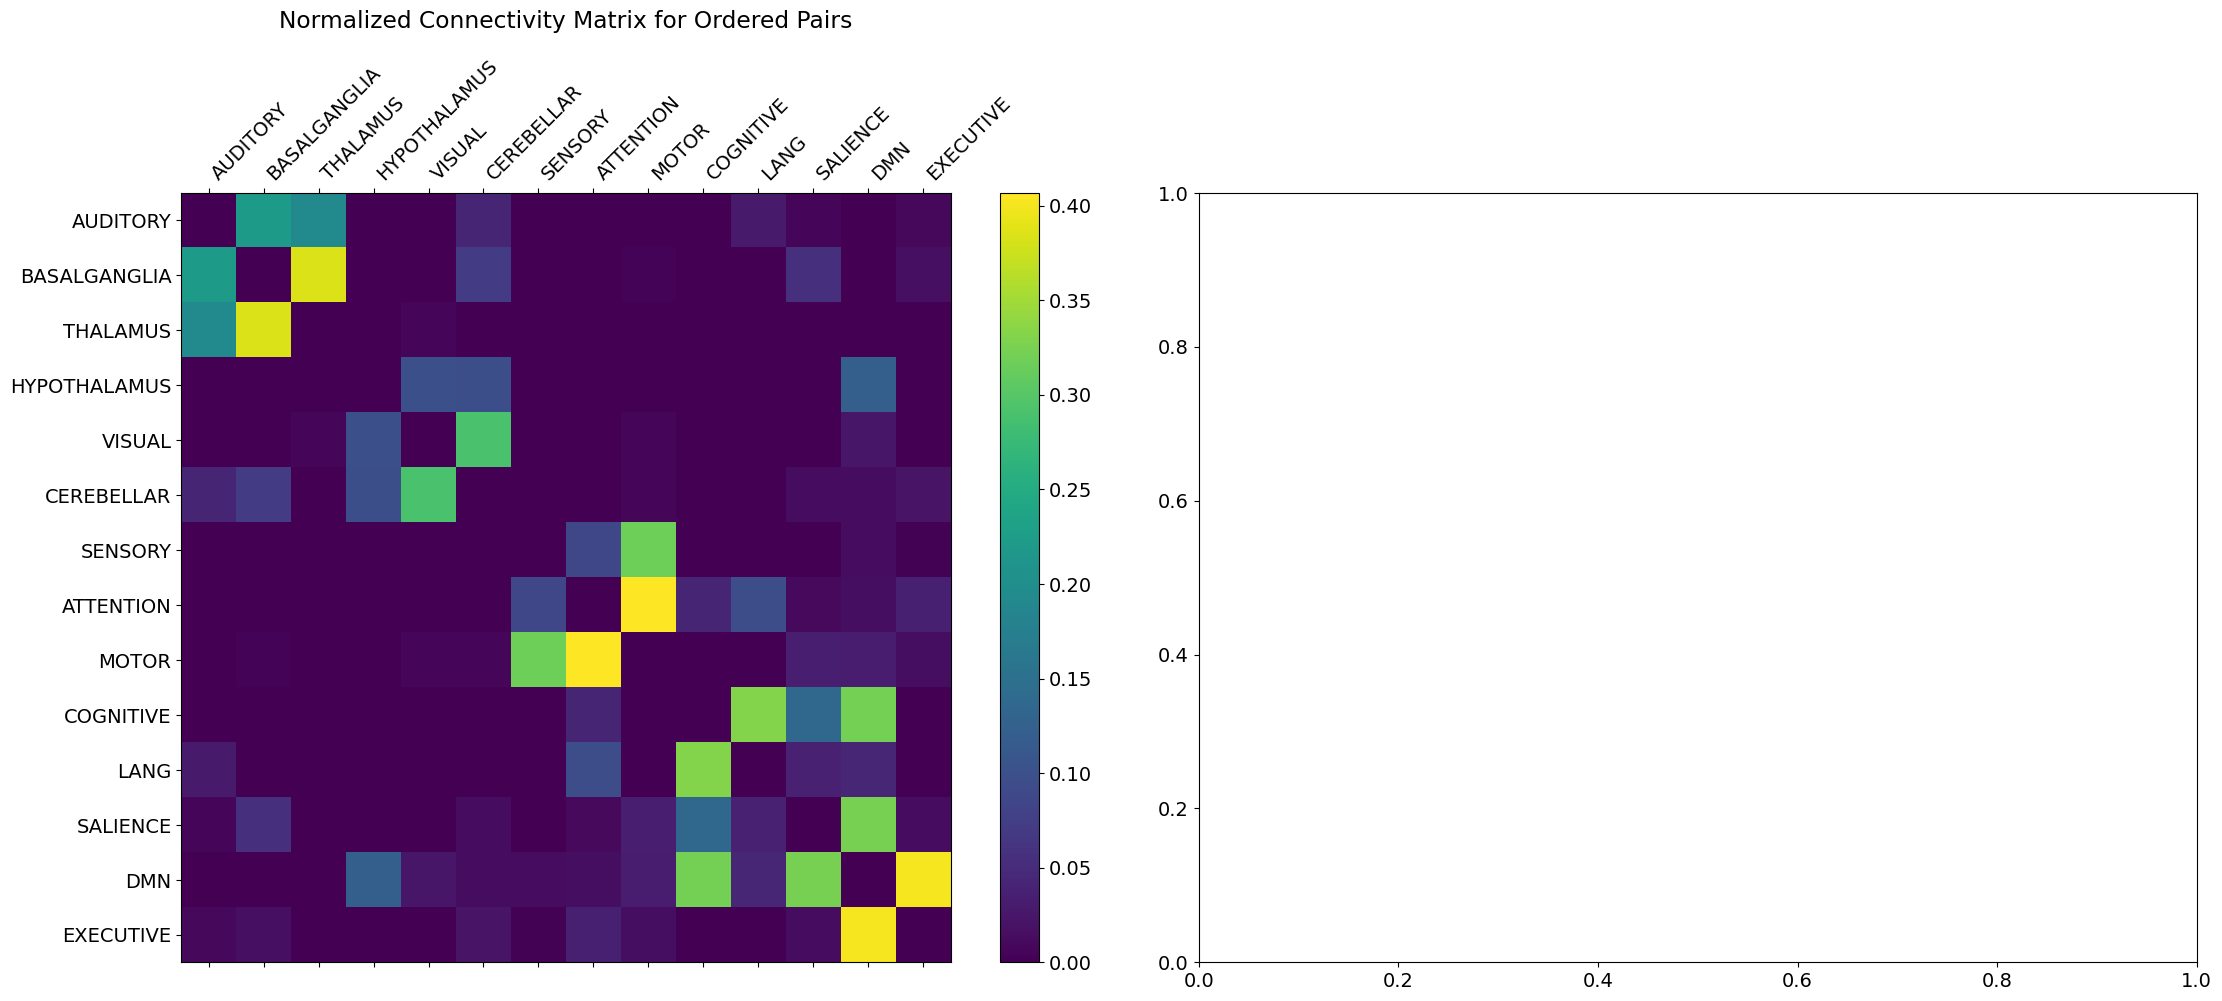

In [ ]:
#FIXED, ROW ONLY
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



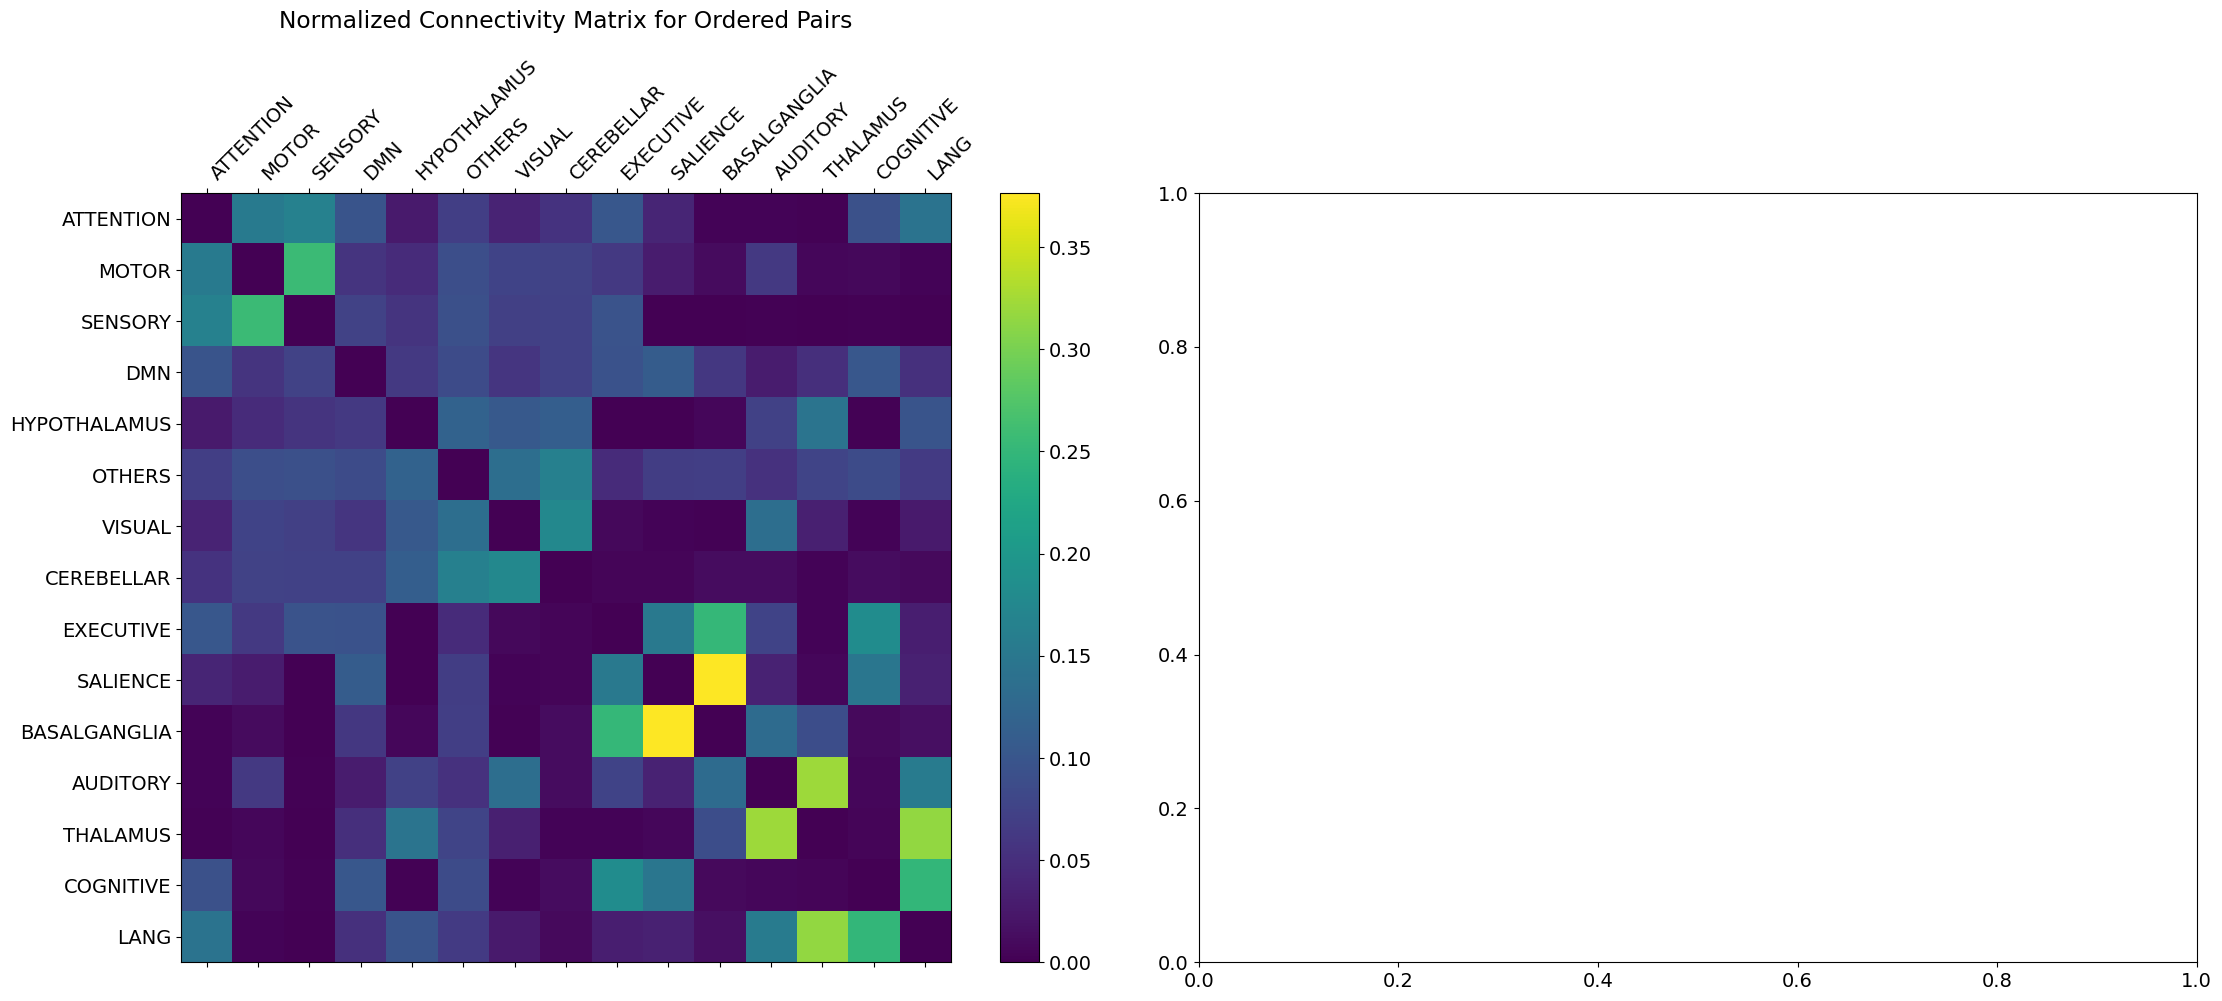

In [ ]:
#FIXED
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
# axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



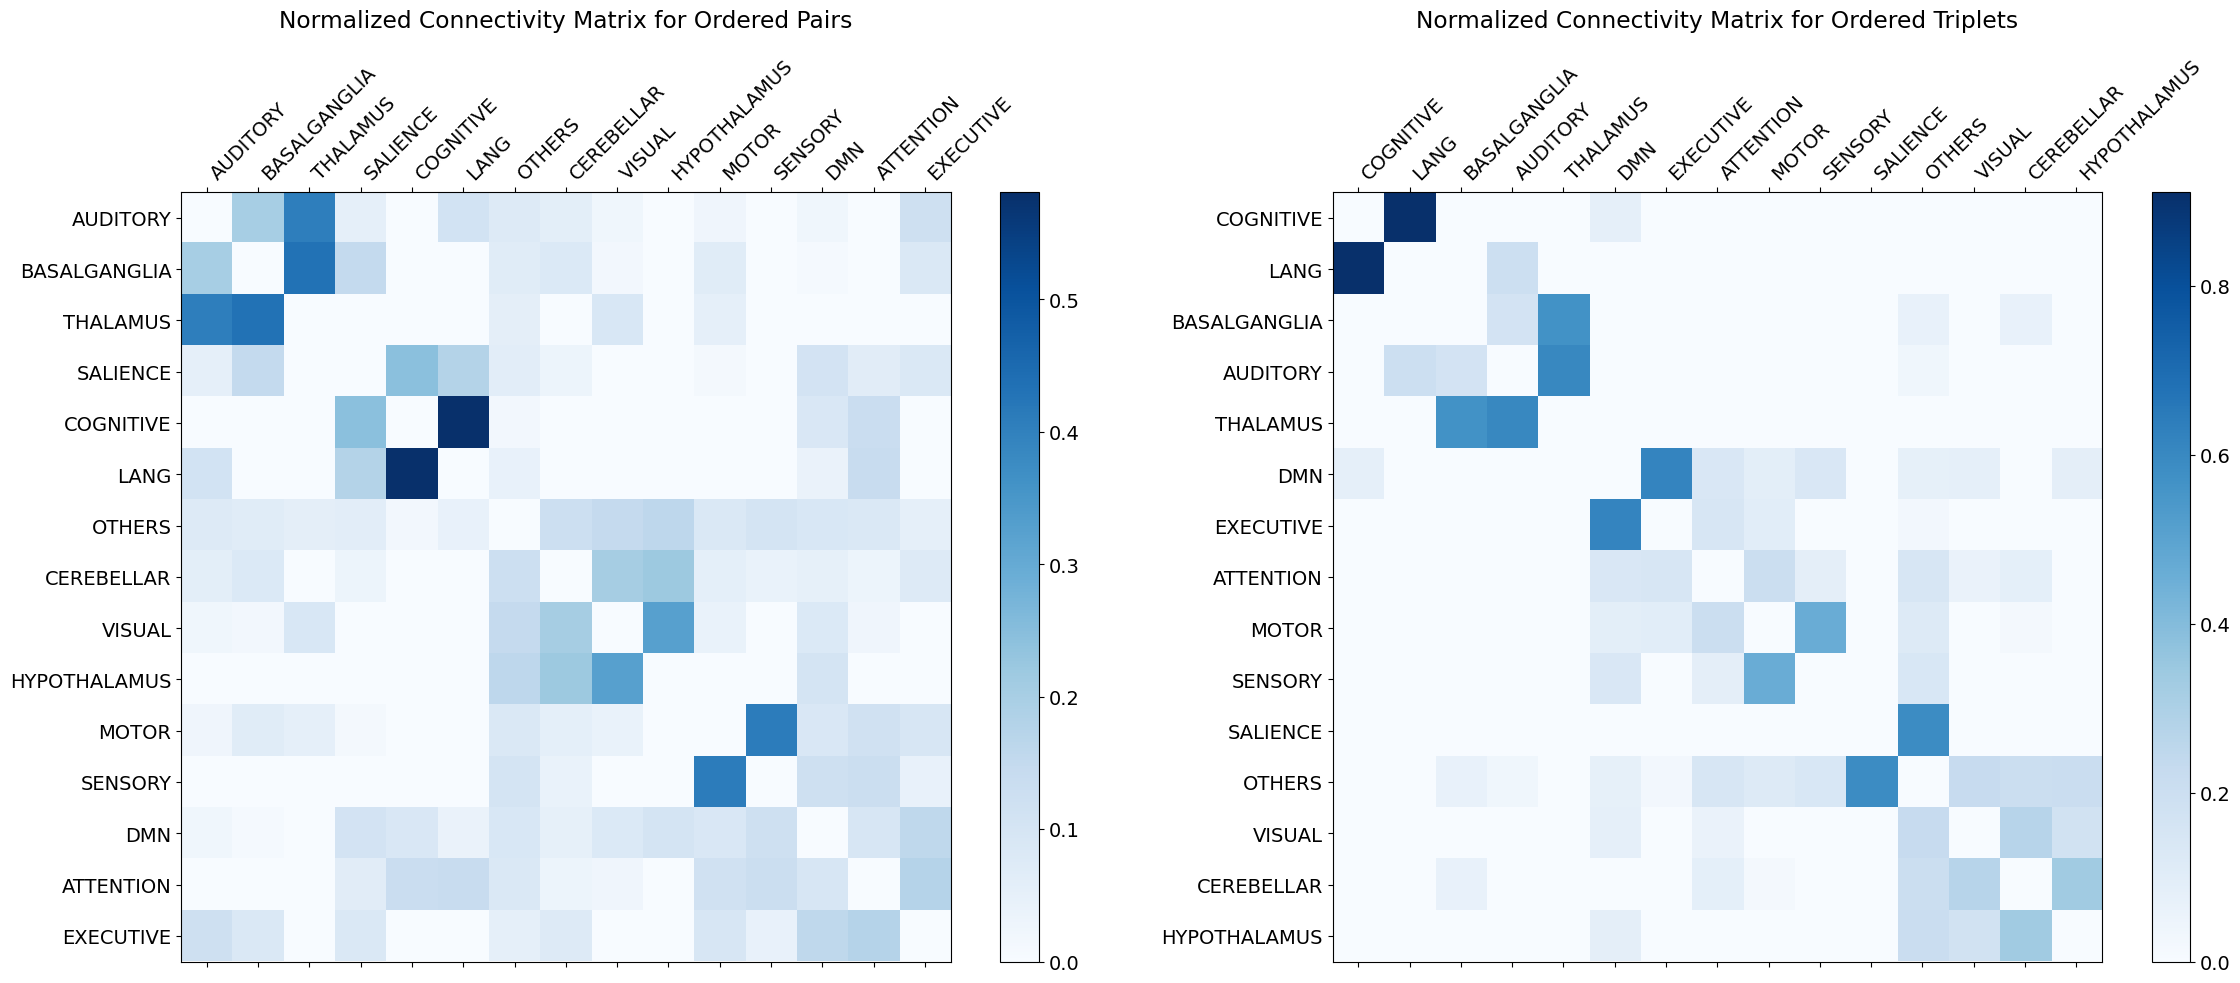

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



Text(0.5, 1.0, 'Normalized Connectivity Matrix for Ordered')

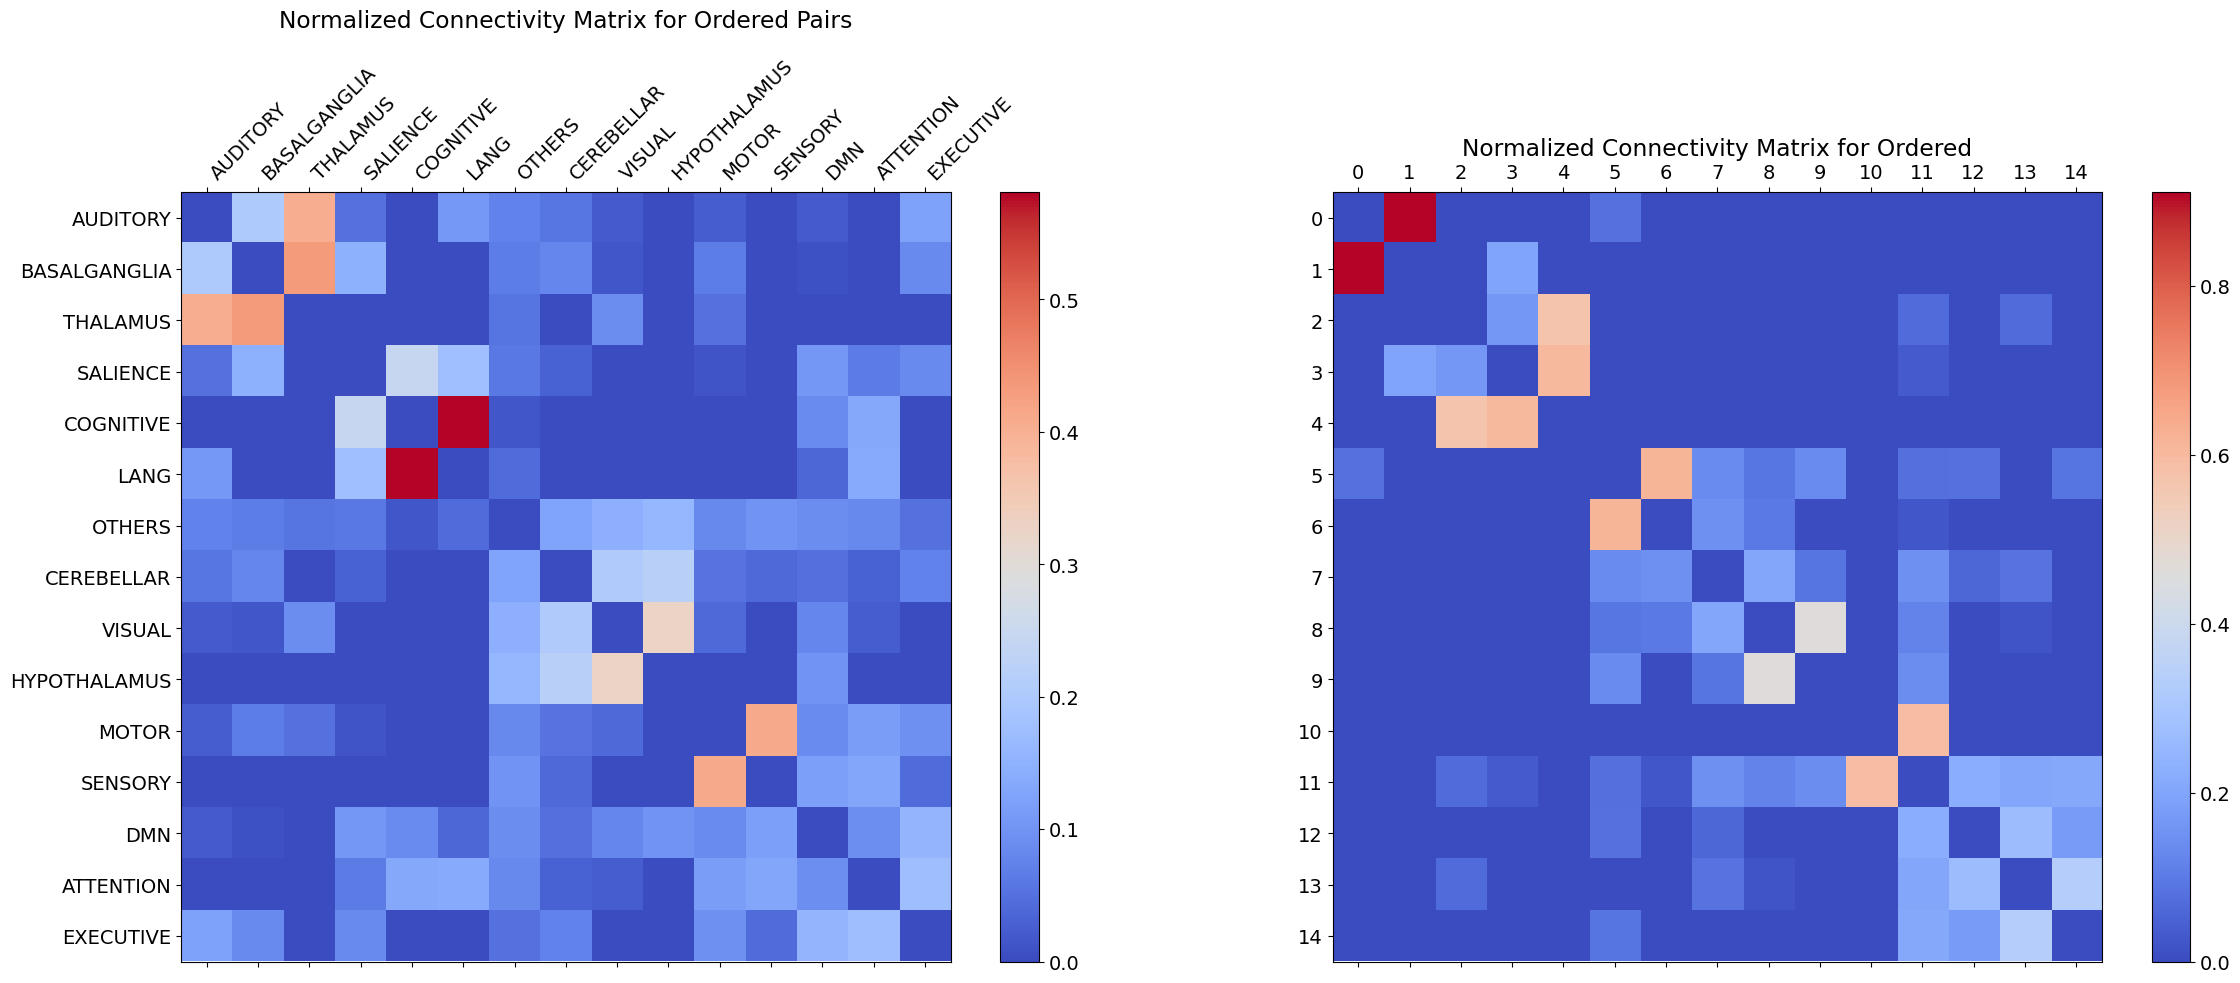

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='coolwarm')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='coolwarm')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered")


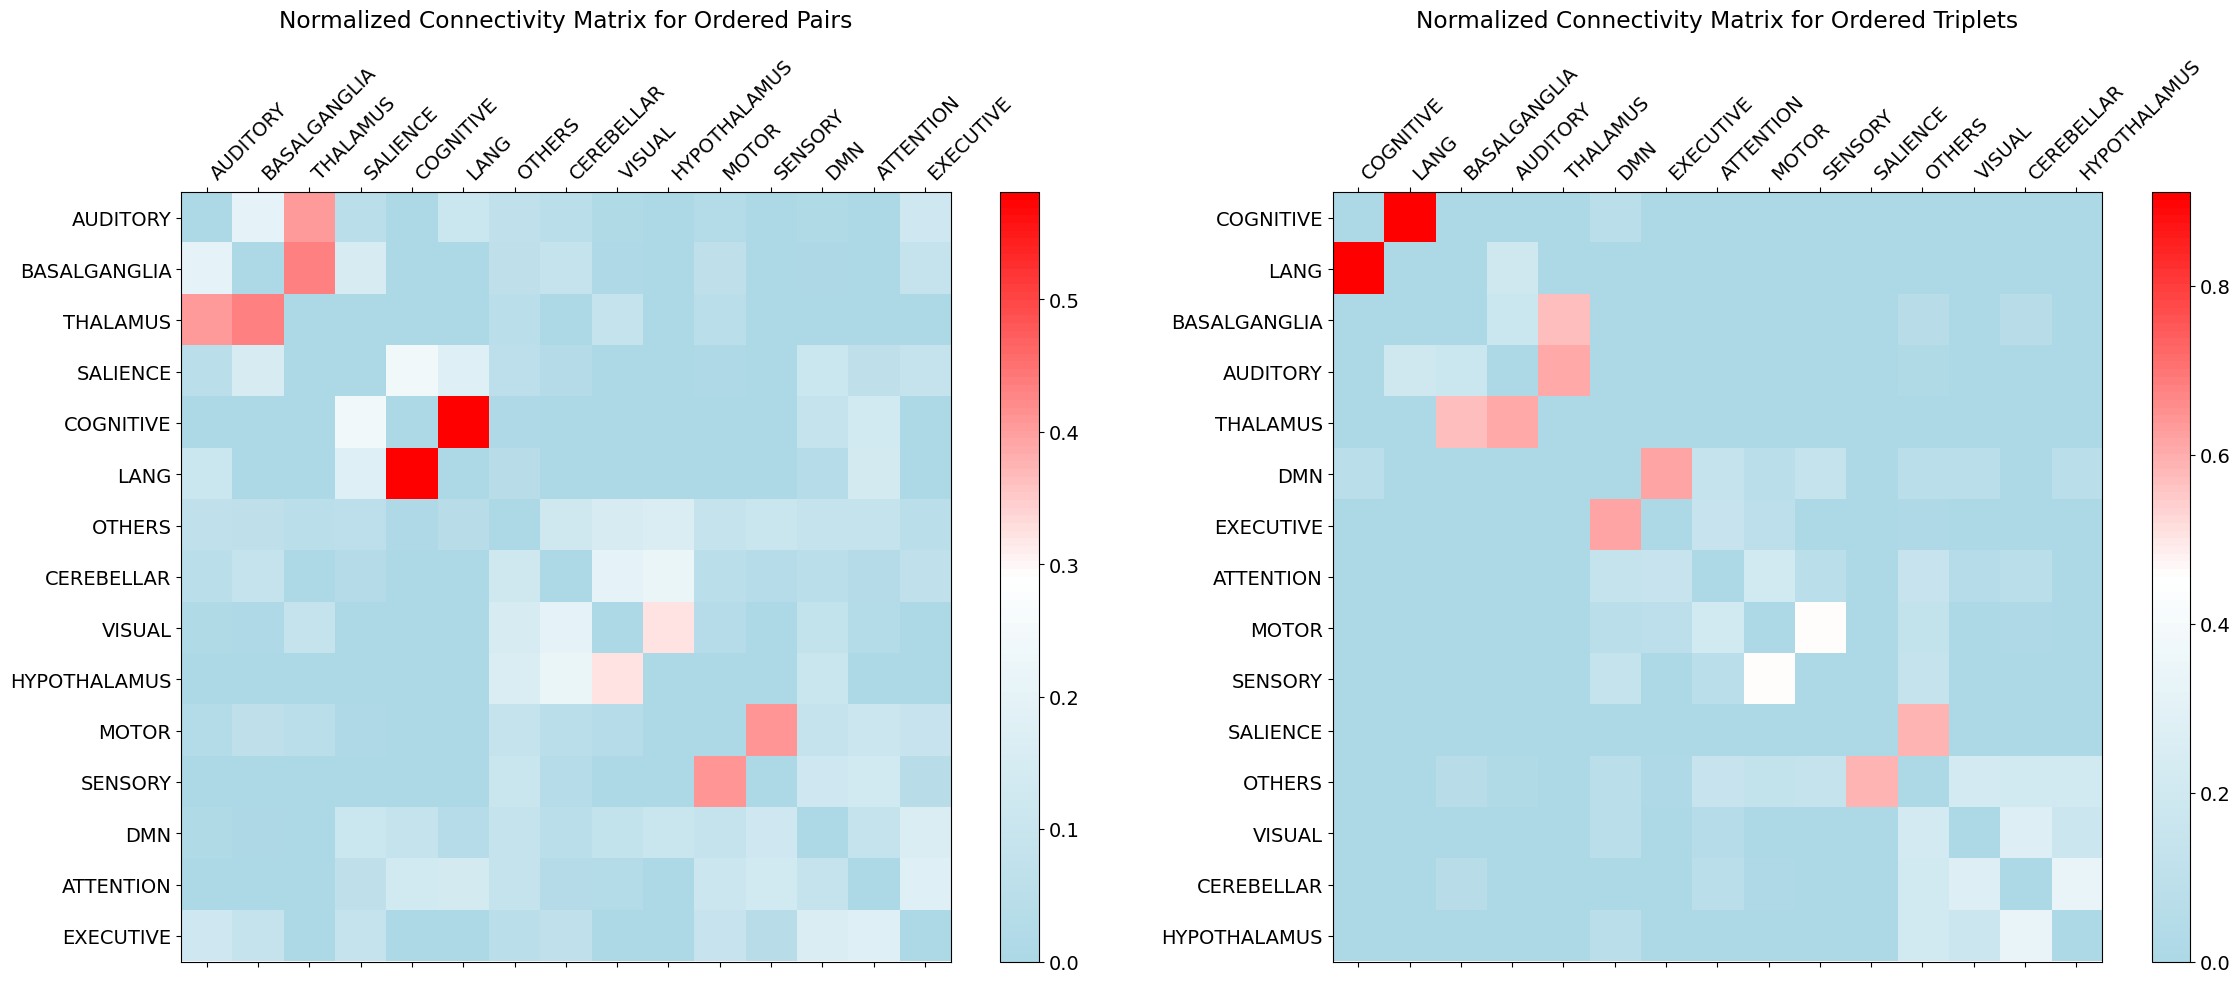

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap
colors = ["lightblue", "white", "red"]  # Start with light blue, transition through white, to red
n_bins = 100  # Increase this number for a smoother transition
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=n_bins)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap=cmap)
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap=cmap)
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()


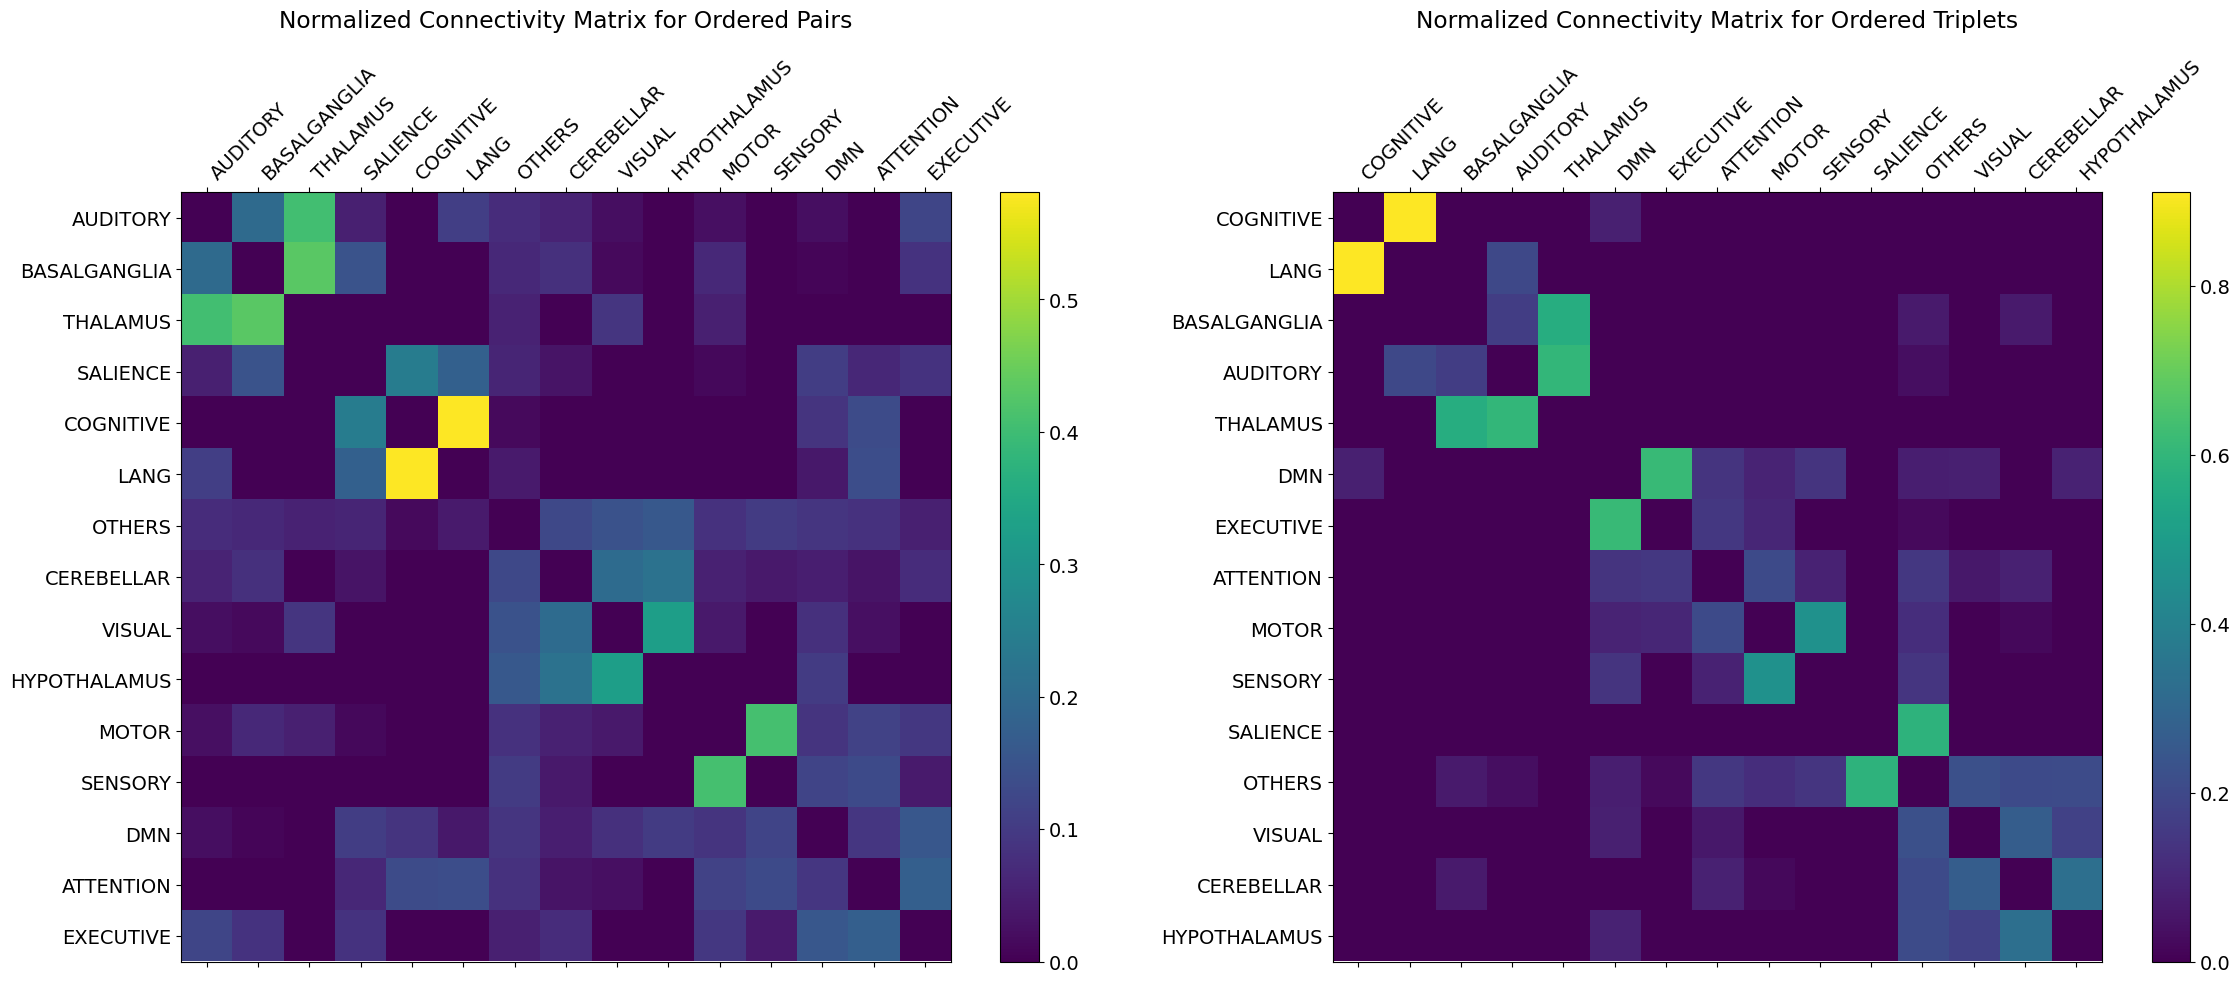

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='viridis')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='viridis')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()


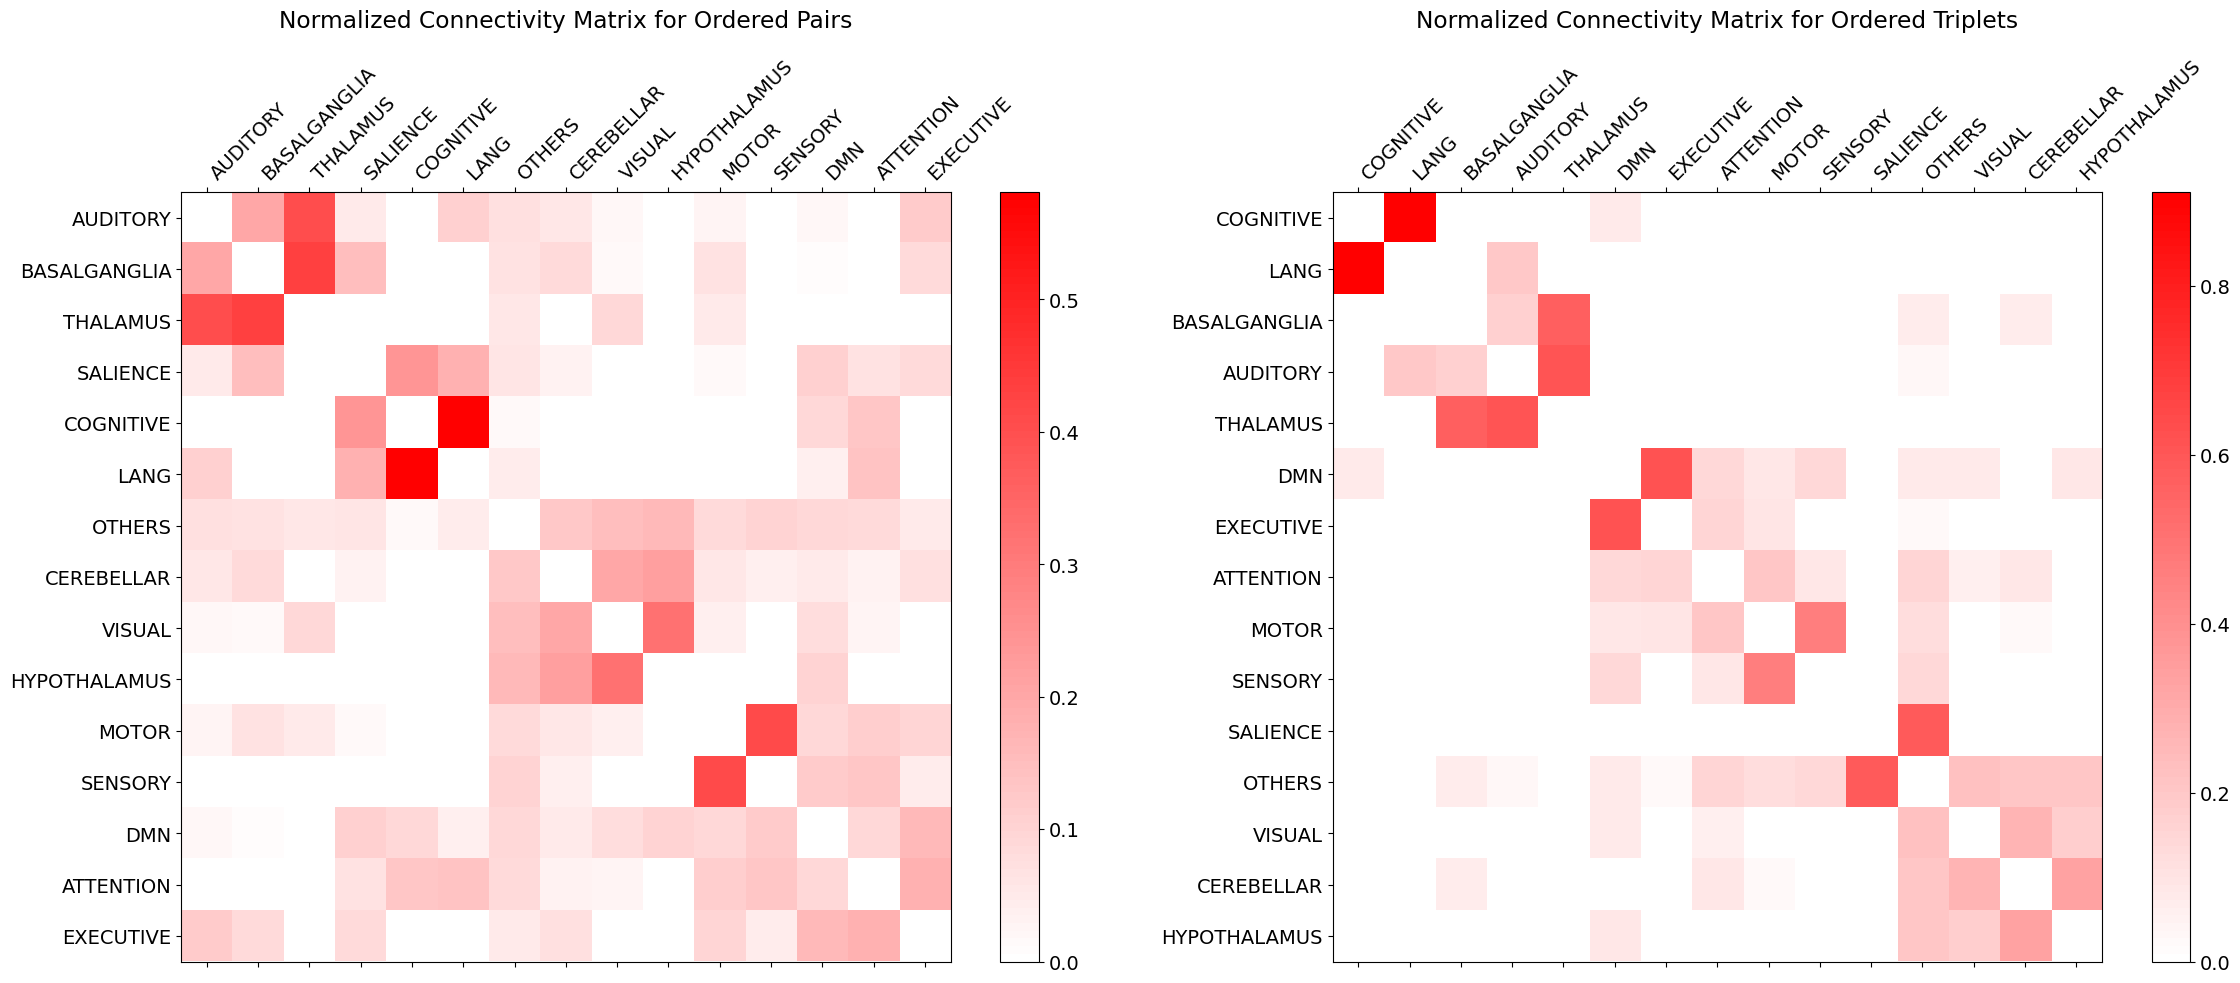

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap
colors = ["white", "red"]  # Start with white, transition to red
n_bins = 100  # Increase this number for a smoother transition
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=n_bins)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap=cmap)
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap=cmap)
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()




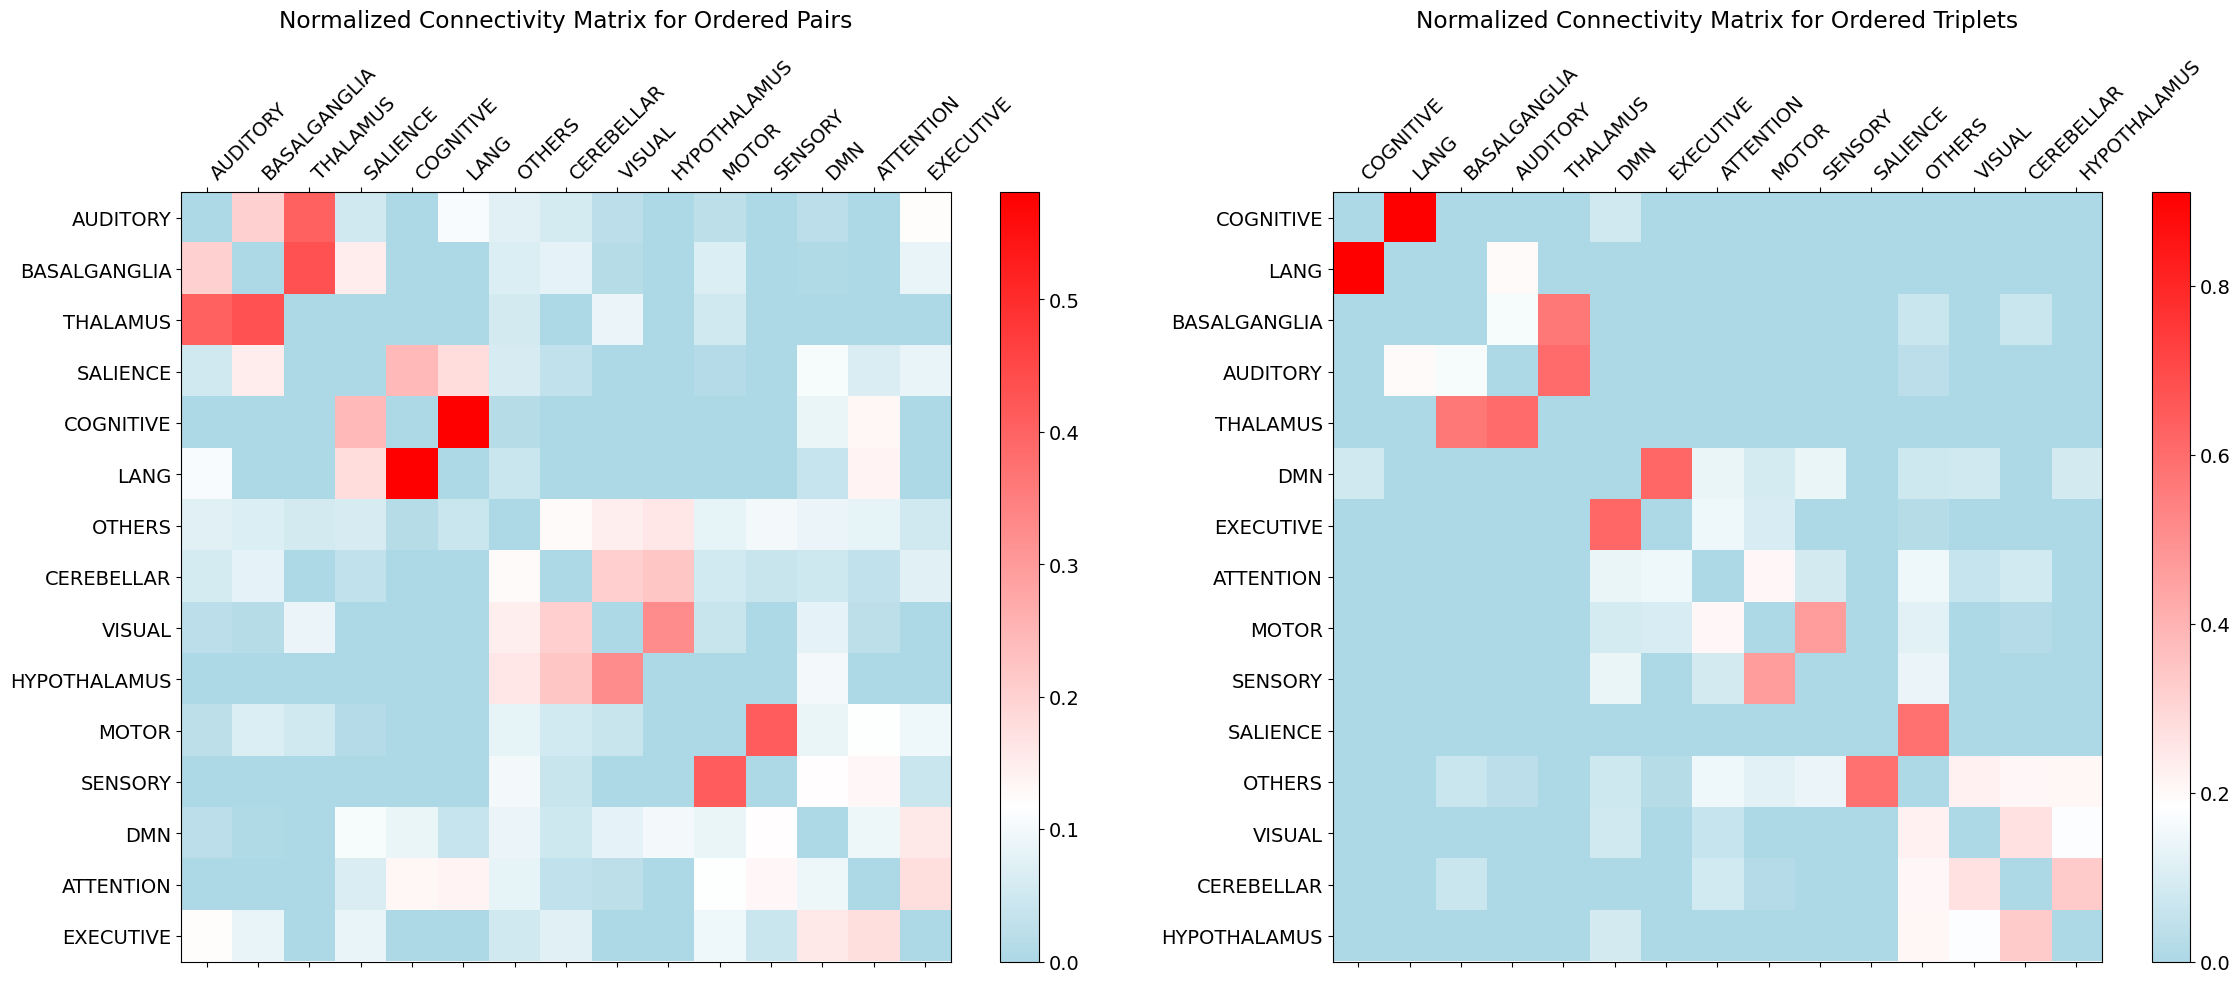

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap with more space for white
cmap = LinearSegmentedColormap.from_list(
    "custom_colormap",
    [(0, "Lightblue"), (0.2, "white"), (1, "red")]  # Adjust these values to control the color transition
)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap=cmap)
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap=cmap)
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()


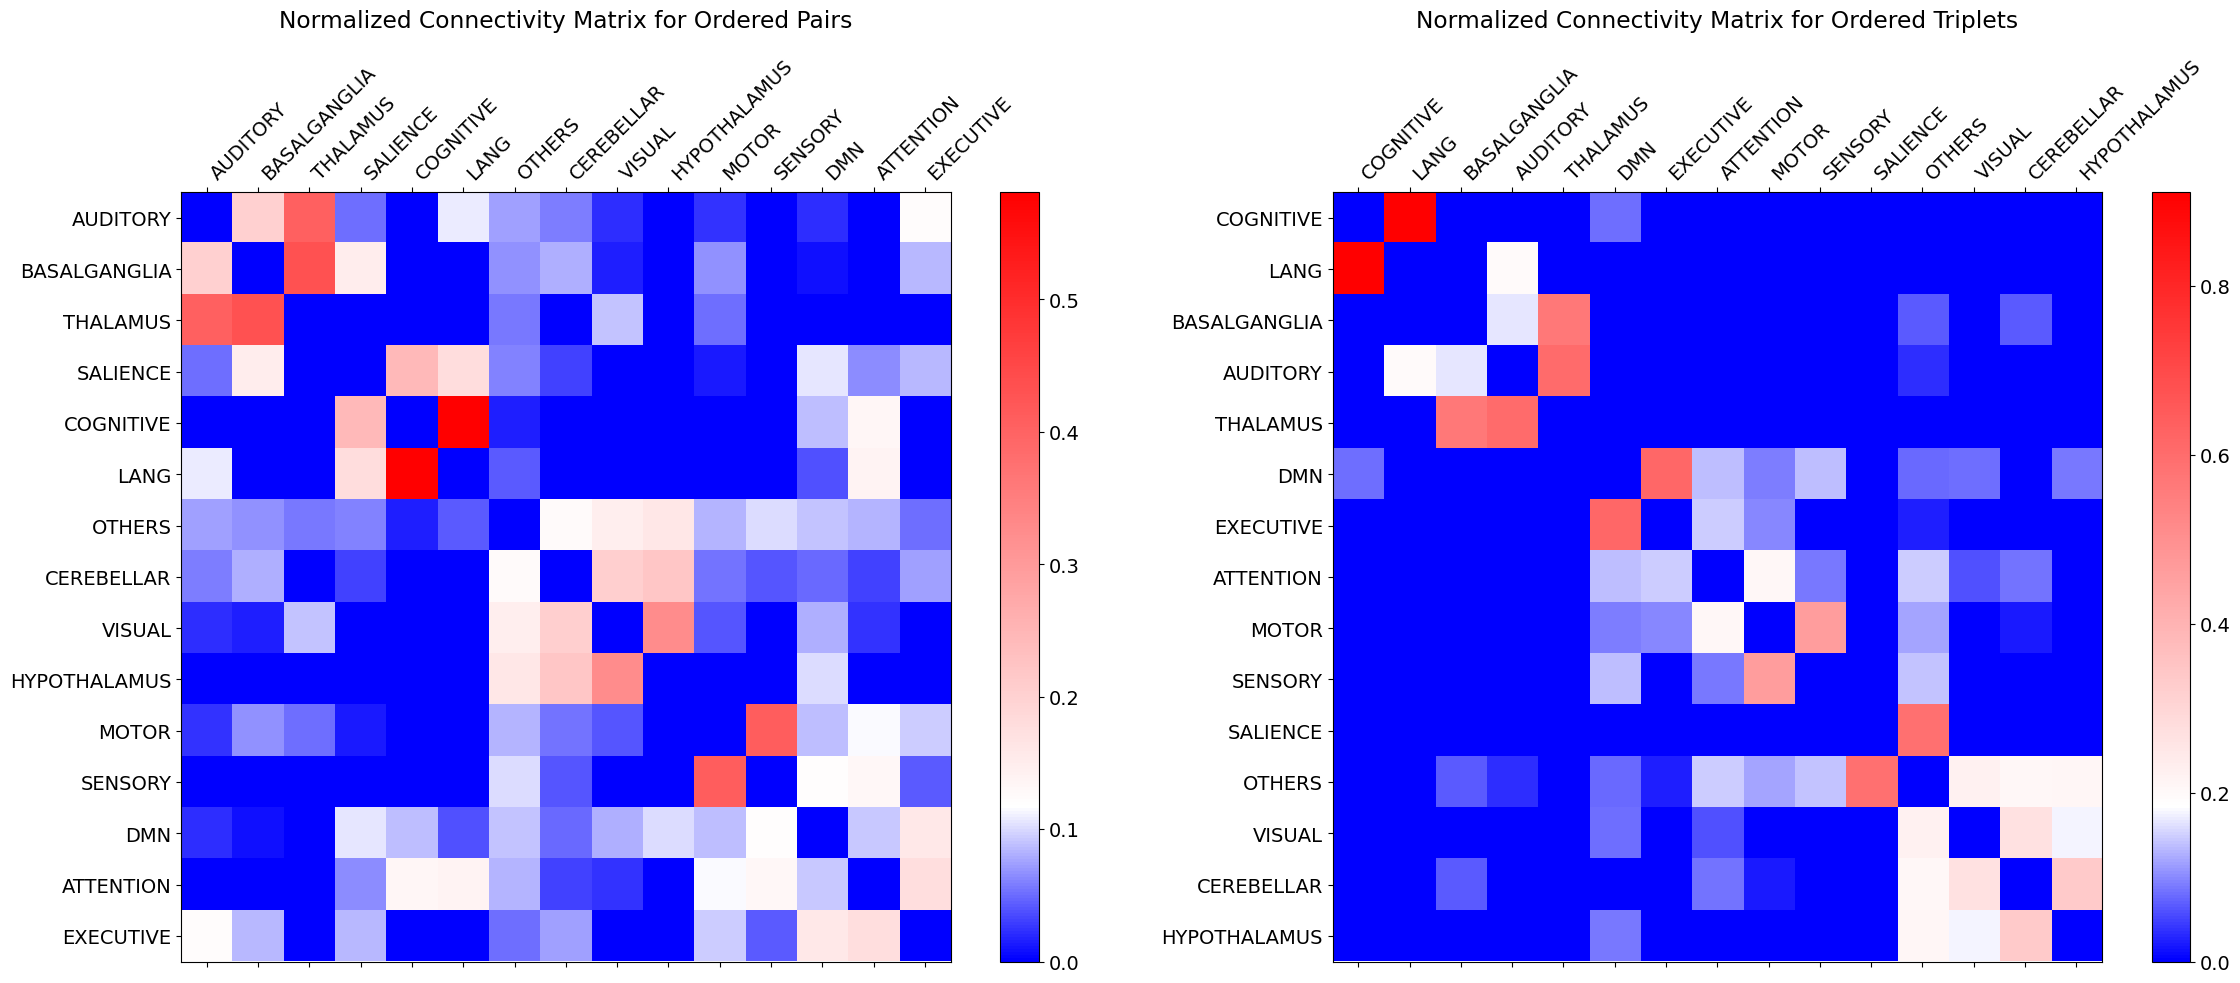

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap with more space for white
cmap = LinearSegmentedColormap.from_list(
    "custom_colormap",
    [(0, "blue"), (0.2, "white"), (1, "red")]  # Adjust these values to control the color transition
)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap=cmap)
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap=cmap)
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()


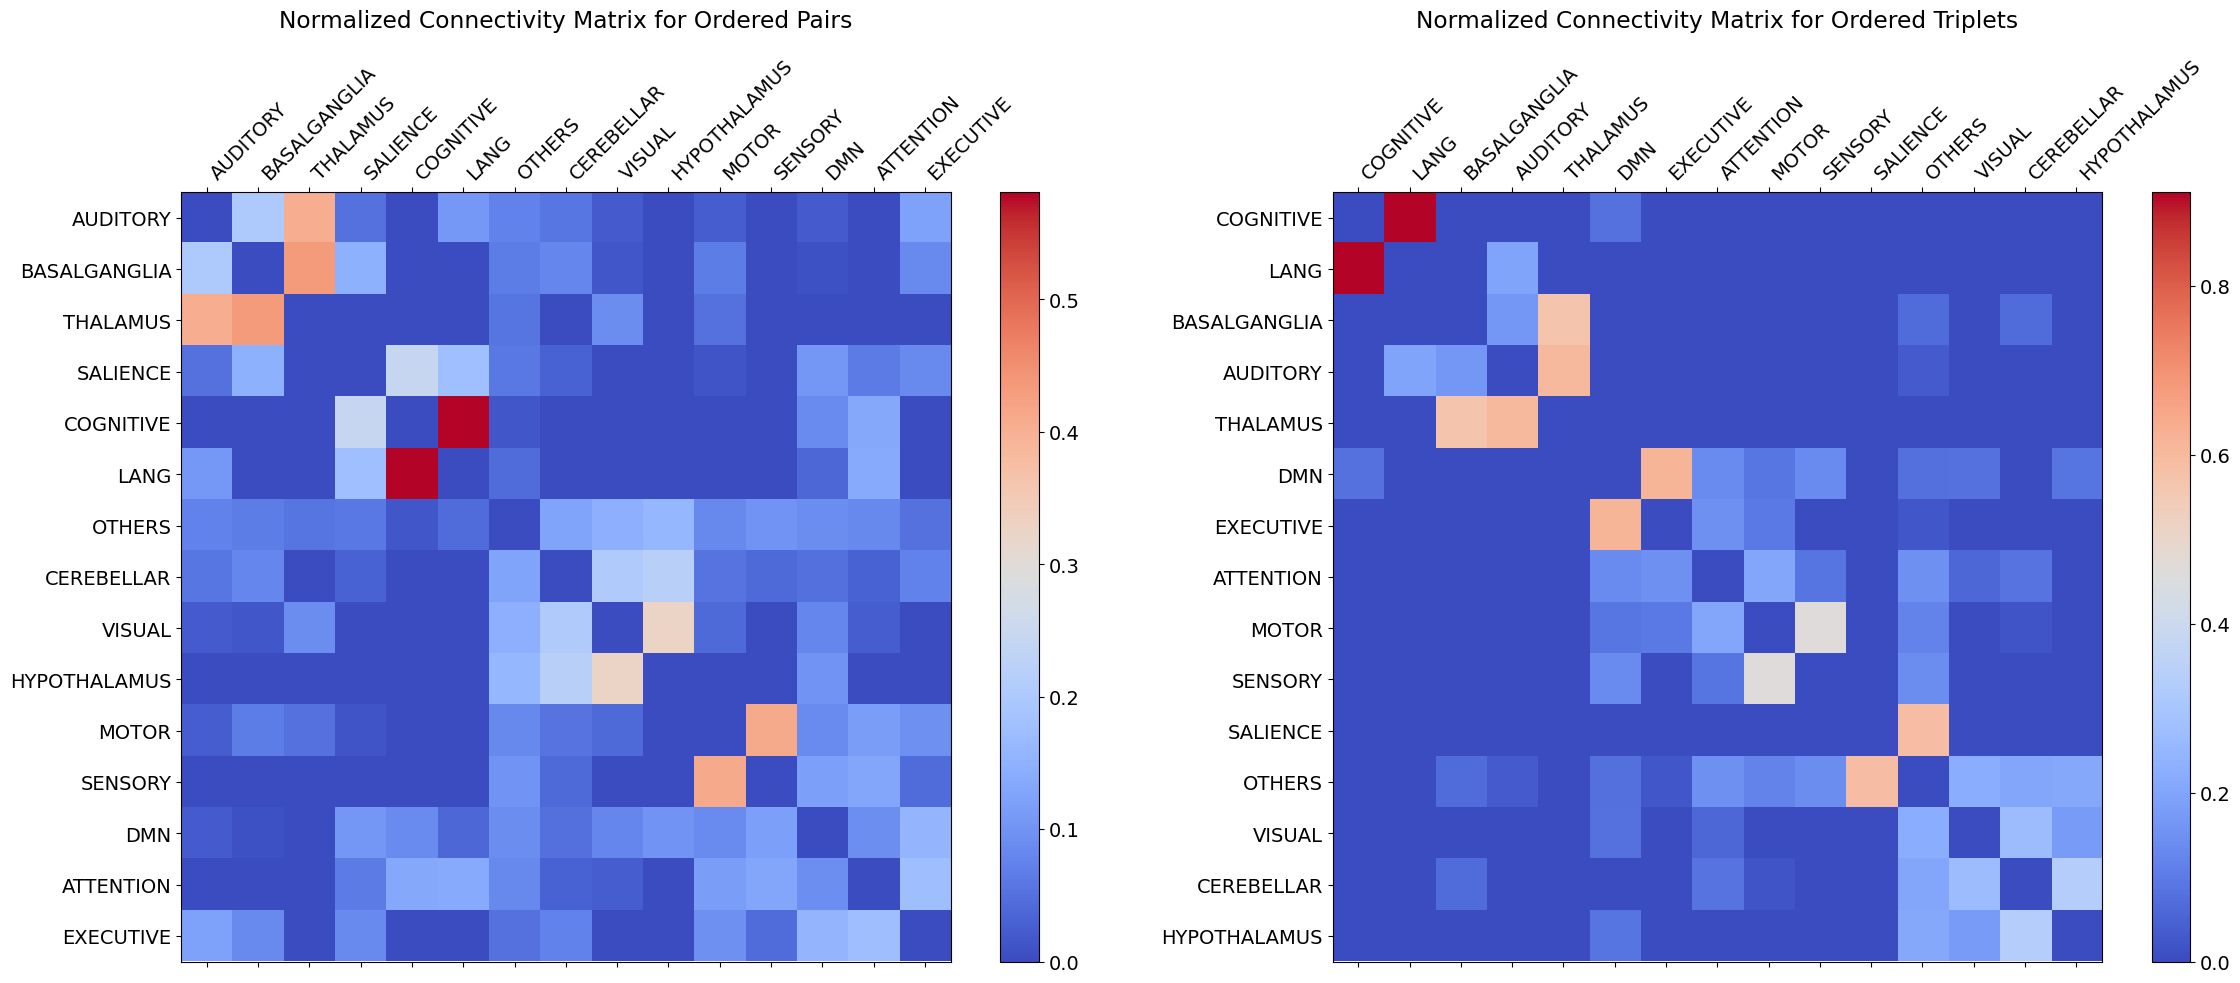

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# # Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='coolwarm')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='coolwarm')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()






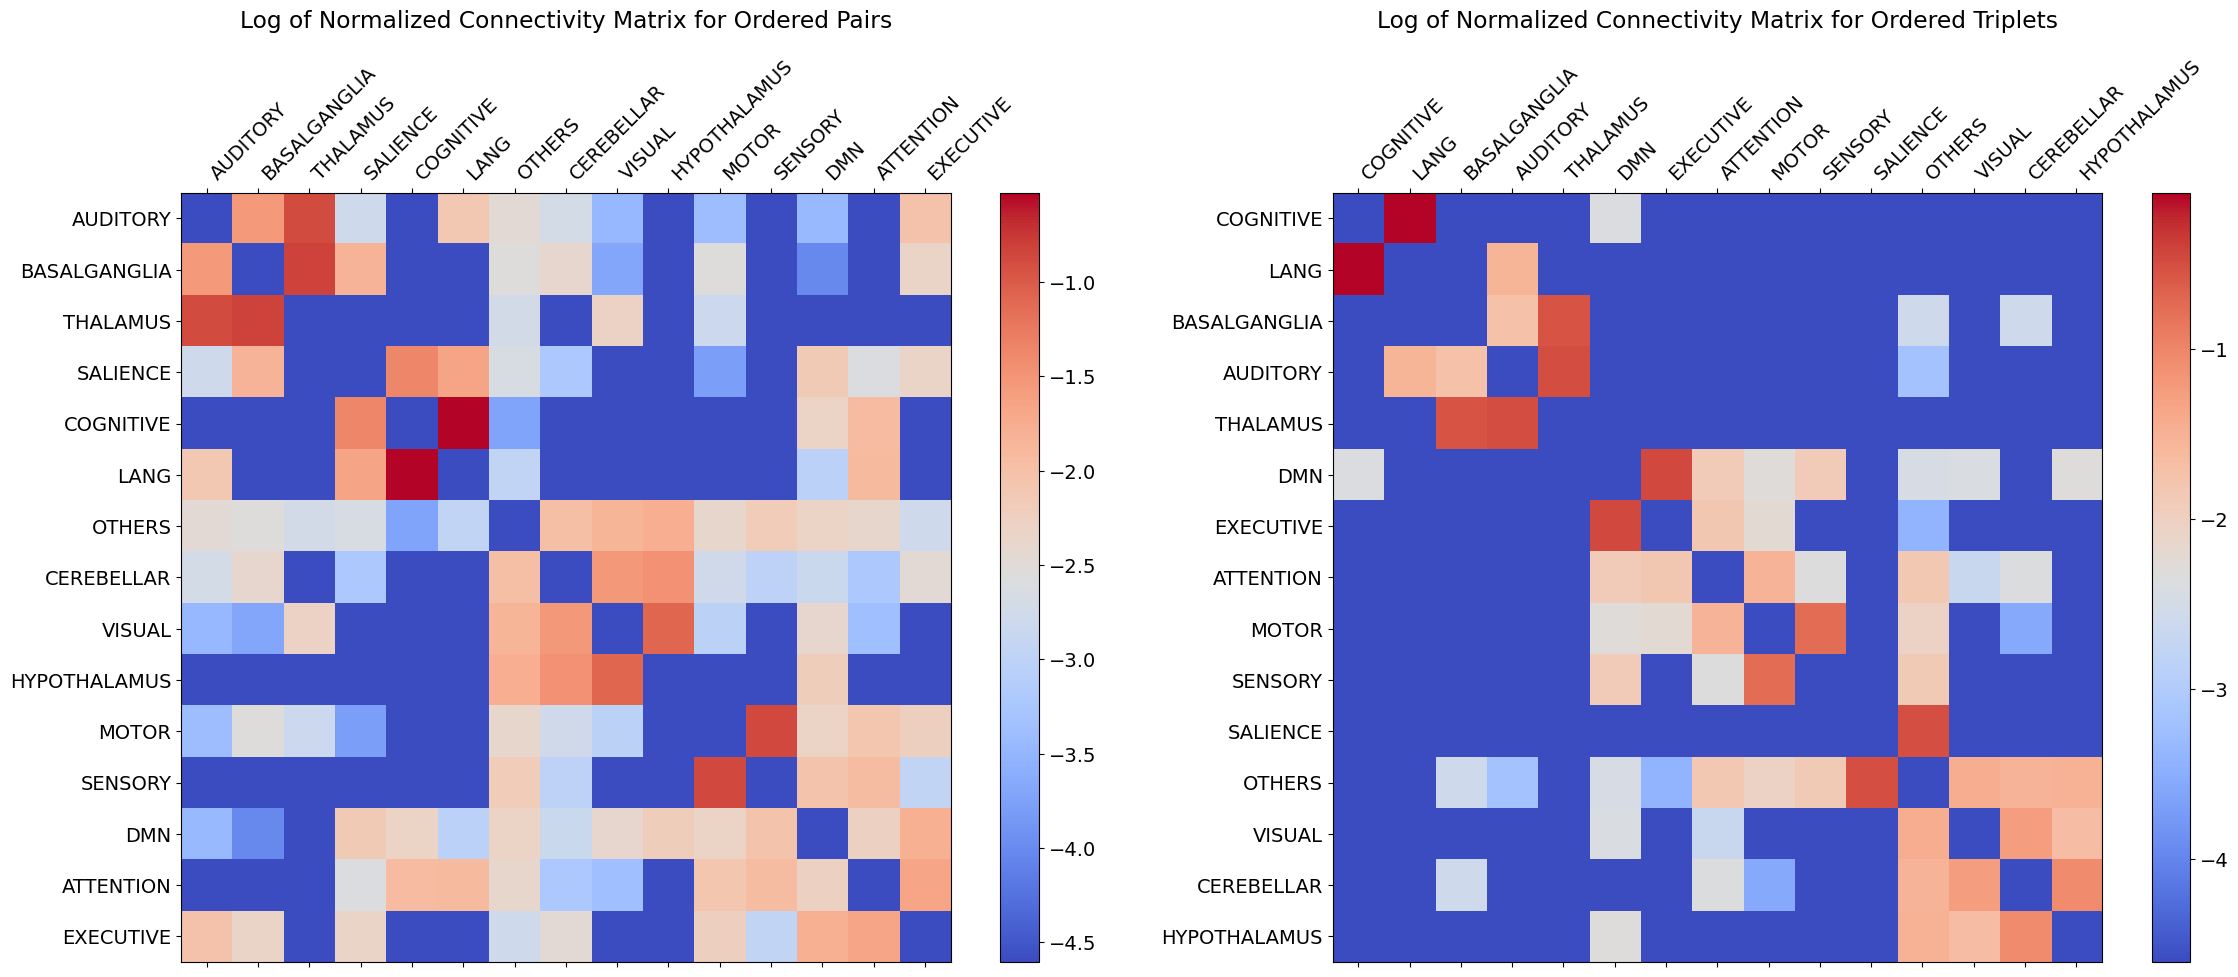

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# Plot for ordered pairs using log values
cax1 = axes[0].matshow(np.log(reordered_avg_brain_regions_df_pair+0.01), cmap='coolwarm')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Log of Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets using log values
cax2 = axes[1].matshow(np.log(reordered_avg_brain_regions_df_triplet+0.01), cmap='coolwarm')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)
axes[1].set_title("Log of Normalized Connectivity Matrix for Ordered Triplets", pad=20)

plt.show()

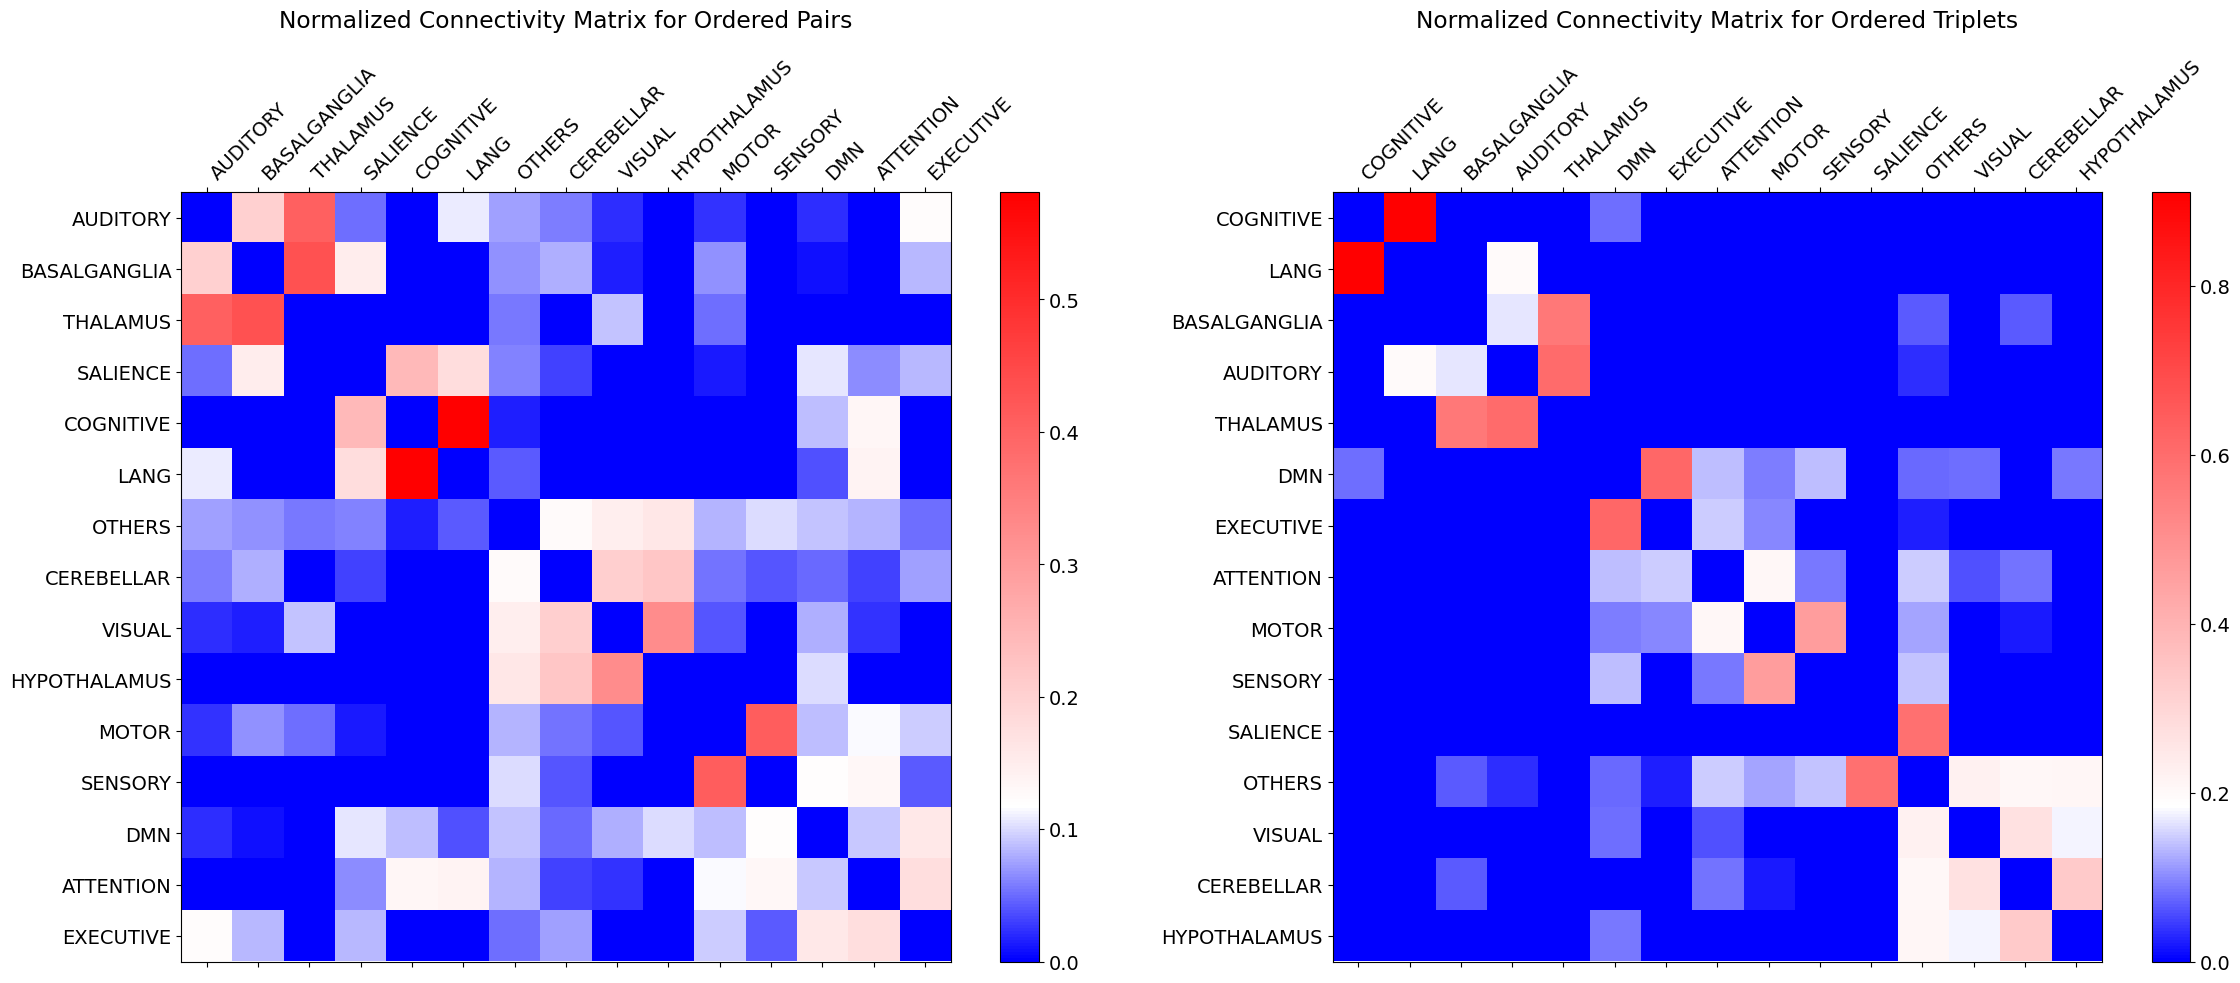

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap with more space for white
cmap = LinearSegmentedColormap.from_list(
    "custom_colormap",
    [(0, "blue"), (0.2, "white"), (1, "red")]  # Adjust these values to control the color transition
)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap=cmap)
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap=cmap)
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()


In [ ]:
# prompt: I actually want to instead plot for the ordered pair and triplets with a color scale that goes from blue to red

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='coolwarm')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='coolwarm')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()


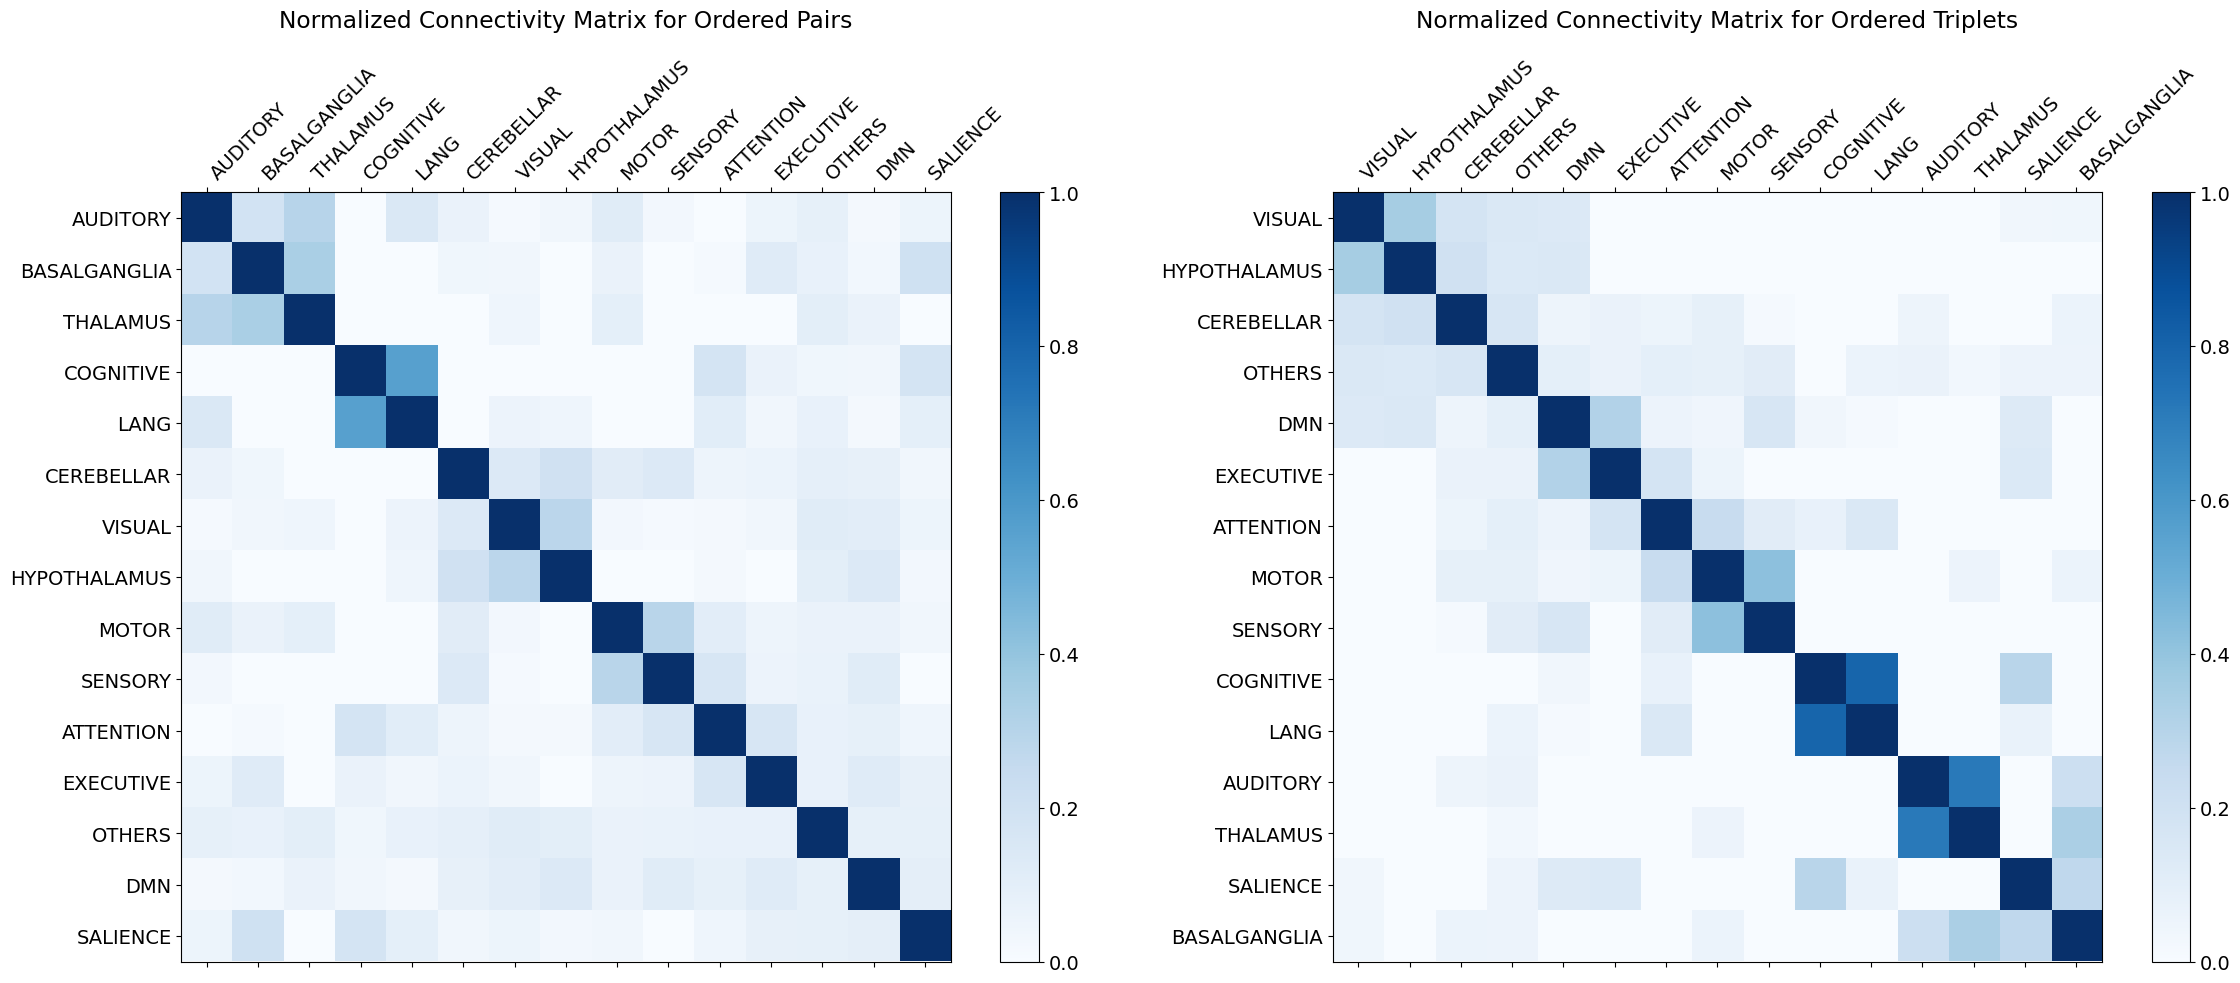

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

#Replace the diagonals with 1 for both the matrices
for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
    reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
    reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



(52799, 11)
(17599, 11)


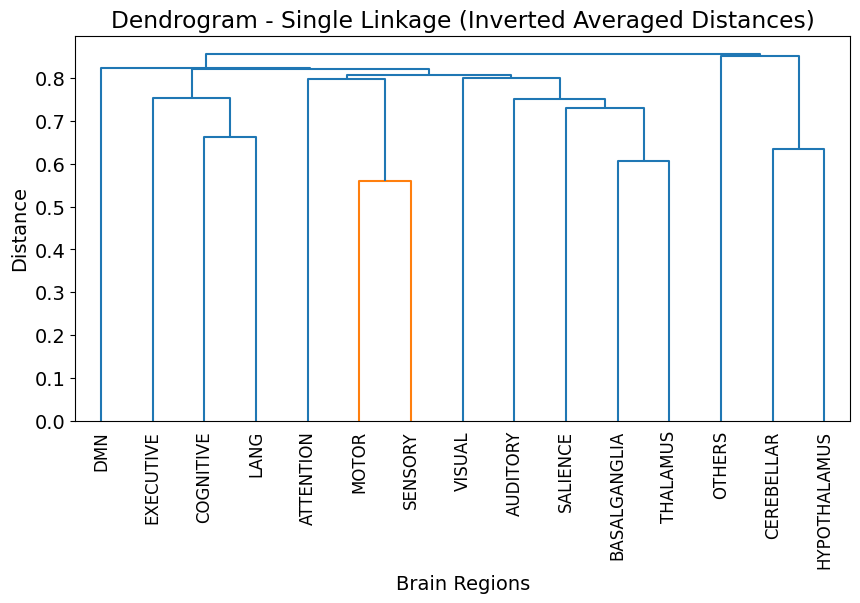

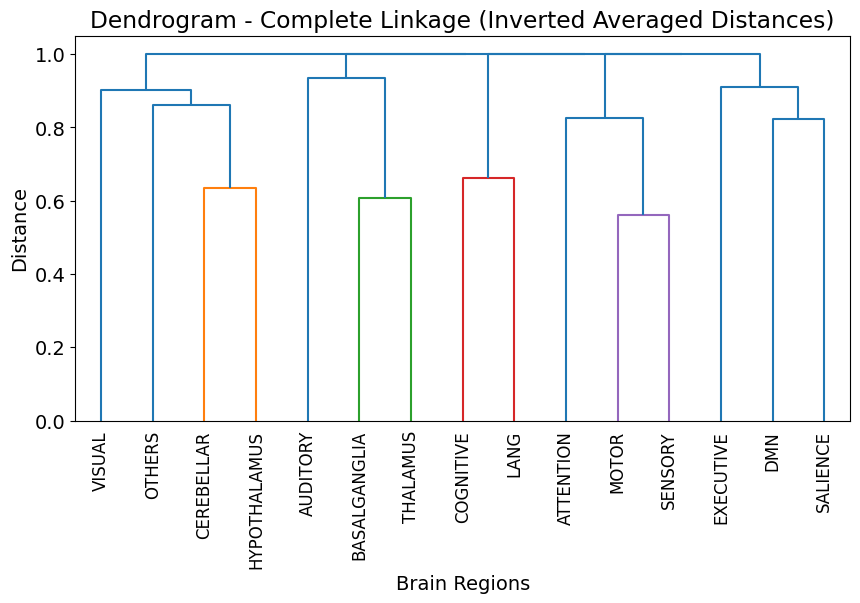

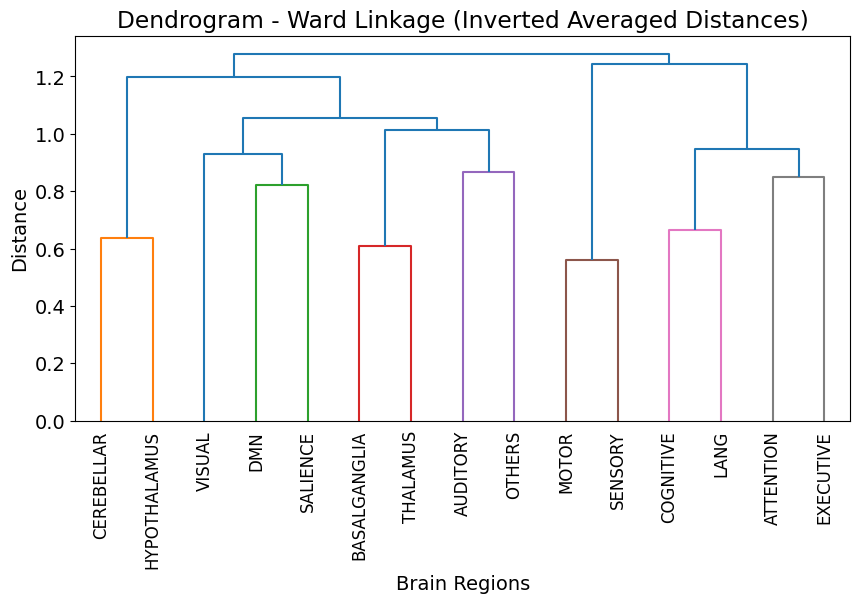

In [ ]:
# Load the data from the provided CSV file
data_new_5 = pd.read_csv("corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv")
print(data_new_5.shape)
#Only keep those rows whose final column ends with "ICA100"
data_new_5 = data_new_5[data_new_5.iloc[:, -1].str.endswith("ICA100")]
print(data_new_5.shape)
# Append "-" right after "HYPOTHALAMUS" in the names
# data_new_5.iloc[:, -1] = data_new_5.iloc[:, -1].apply(lambda x: x[:12] + "-NONE" + x[12:] if "HYPOTHALAMUS" in x else x)

# Extract the parent_network using the corrected dictionaries
data_new_5['parent_network'] = data_new_5.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))

# Create a column for the ordered pairs and triplets of the first two and three symbols respectively
data_new_5['ordered_pair'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str)
data_new_5['ordered_triplet'] = data_new_5.iloc[:, 0].astype(str) + "-" + data_new_5.iloc[:, 1].astype(str) + "-" + data_new_5.iloc[:, 2].astype(str)

# Compute connectivity matrix for ordered pairs using the new approach
matrix_ordered_pair_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_pair')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_pair_new_5 = matrix_ordered_pair_new_5.div(matrix_ordered_pair_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_pair_new_5 = normalized_matrix_ordered_pair_new_5.div(normalized_matrix_ordered_pair_new_5.sum(axis=0), axis=1)

# Compute connectivity matrix for ordered triplets using the new approach
matrix_ordered_triplet_new_5 = compute_new_connectivity_matrix(data_new_5, 'ordered_triplet')

# Normalize the matrix by the sum of the row elements
normalized_matrix_ordered_triplet_new_5 = matrix_ordered_triplet_new_5.div(matrix_ordered_triplet_new_5.sum(axis=1), axis=0)

# Normalize the matrix by the sum of the column elements
normalized_matrix_ordered_triplet_new_5 = normalized_matrix_ordered_triplet_new_5.div(normalized_matrix_ordered_triplet_new_5.sum(axis=0), axis=1)

# # Plot the normalized connectivity matrices for ordered pairs and triplets
# fig, axes = plt.subplots(1, 2, figsize=(24, 10))
# fig.tight_layout(pad=5.0)
# plt.rcParams.update({'font.size': 14})
# # Plot for ordered pairs
# cax1 = axes[0].matshow(normalized_matrix_ordered_pair_new_5, cmap='Blues')
# plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
# axes[0].set_xticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
# axes[0].set_yticks(range(len(normalized_matrix_ordered_pair_new_5.columns)))
# axes[0].set_xticklabels(normalized_matrix_ordered_pair_new_5.columns, rotation=45, ha='left')
# axes[0].set_yticklabels(normalized_matrix_ordered_pair_new_5.columns)
# axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs among 100 ICA", pad=20)

# # Plot for ordered triplets
# cax2 = axes[1].matshow(normalized_matrix_ordered_triplet_new_5, cmap='Blues')
# plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
# axes[1].set_xticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_yticks(range(len(normalized_matrix_ordered_triplet_new_5.columns)))
# axes[1].set_xticklabels(normalized_matrix_ordered_triplet_new_5.columns, rotation=45, ha='left')
# axes[1].set_yticklabels(normalized_matrix_ordered_triplet_new_5.columns)
# axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets among 100 ICA", pad=20)

# plt.show()

# Function to plot dendrogram with brain region labels
brain_regions_df = normalized_matrix_ordered_pair_new_5.copy()

# Display the first few rows of the dataframe to understand its structure
brain_regions_df
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_pair = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_pair = sym_brain_regions_df.iloc[order_avg_inverted_complete_pair, order_avg_inverted_complete_pair]


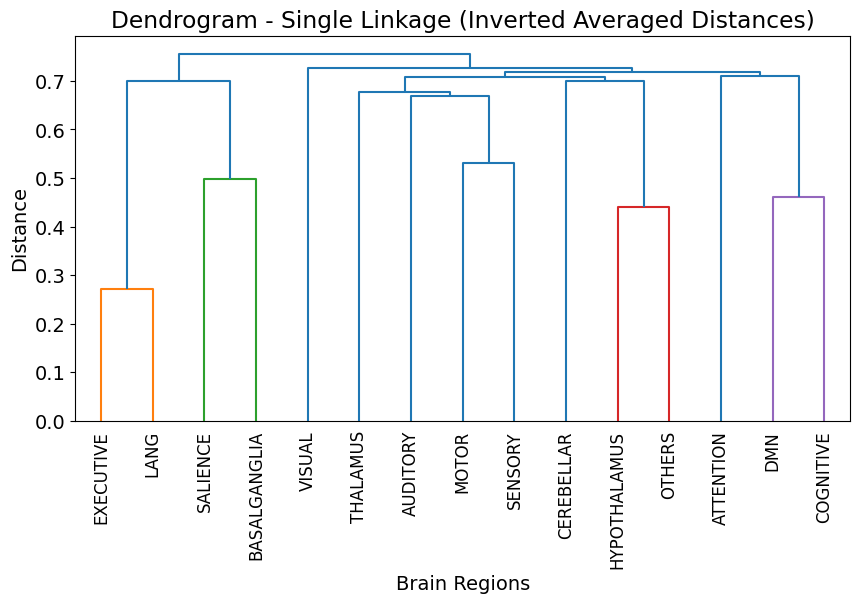

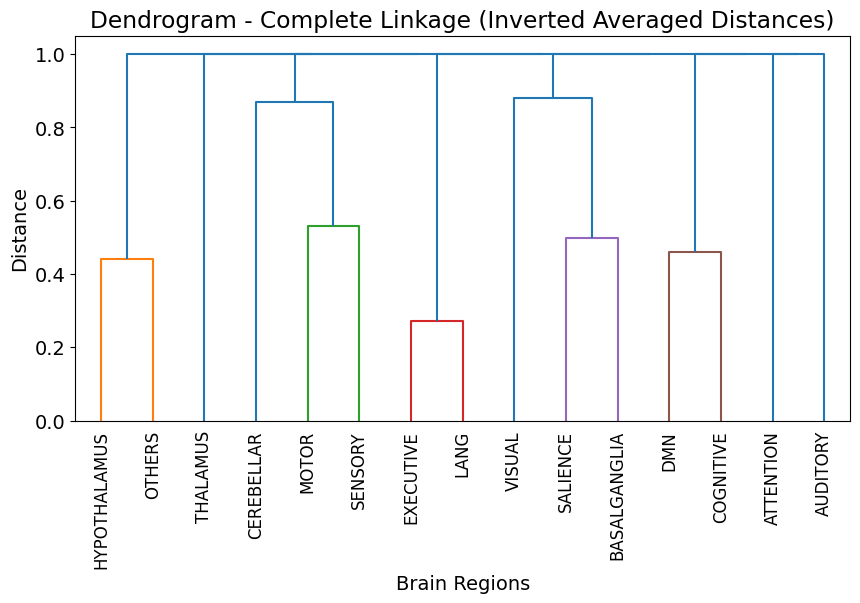

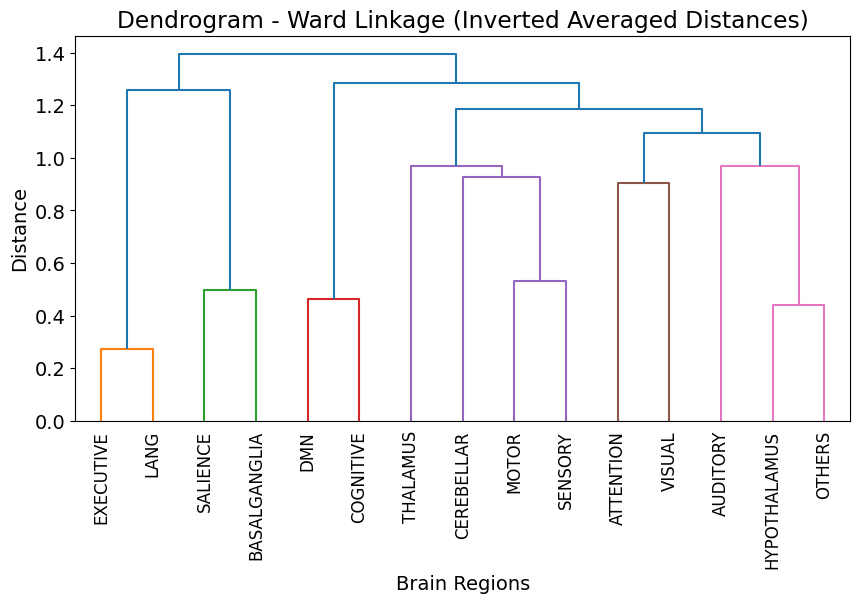

In [ ]:
# Function to plot dendrogram with brain region labels
brain_regions_df = normalized_matrix_ordered_triplet_new_5.copy()
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# Inverting the matrix values to (1 - matrix values)
sym_brain_regions_df = (brain_regions_df + brain_regions_df.T) / 2
inverted_dist_array = squareform(1 - sym_brain_regions_df.values, checks=False)

# Perform hierarchical clustering again using the inverted distances
# linkage_single_inverted = linkage(inverted_dist_array, method='single')
# linkage_complete_inverted = linkage(inverted_dist_array, method='complete')
def plot_dendrogram_with_labels(linkage_matrix, labels, title):
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
    plt.title(title)
    plt.xlabel('Brain Regions')
    plt.ylabel('Distance')
    plt.show()

# Extracting the brain region labels
brain_region_labels = brain_regions_df.columns

# Plot dendrograms with labels for the inverted distance matrix
# Perform hierarchical clustering using different linkage methods on the inverted averaged matrix
linkage_single_avg_inverted = linkage(inverted_dist_array, method='single')
linkage_complete_avg_inverted = linkage(inverted_dist_array, method='complete')
linkage_ward_avg_inverted = linkage(inverted_dist_array, method='ward')

# Plot dendrograms with brain region labels for the different linkage methods
plot_dendrogram_with_labels(linkage_single_avg_inverted, brain_region_labels, 'Dendrogram - Single Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_complete_avg_inverted, brain_region_labels, 'Dendrogram - Complete Linkage (Inverted Averaged Distances)')
plot_dendrogram_with_labels(linkage_ward_avg_inverted, brain_region_labels, 'Dendrogram - Ward Linkage (Inverted Averaged Distances)')

# Get the order from the complete linkage method (as it was preferred earlier)
order_avg_inverted_complete_triplet = leaves_list(linkage_ward_avg_inverted)

# Reorder the original (non-inverted) averaged distance matrix using this new order
reordered_avg_brain_regions_df_triplet = sym_brain_regions_df.iloc[order_avg_inverted_complete_triplet, order_avg_inverted_complete_triplet]


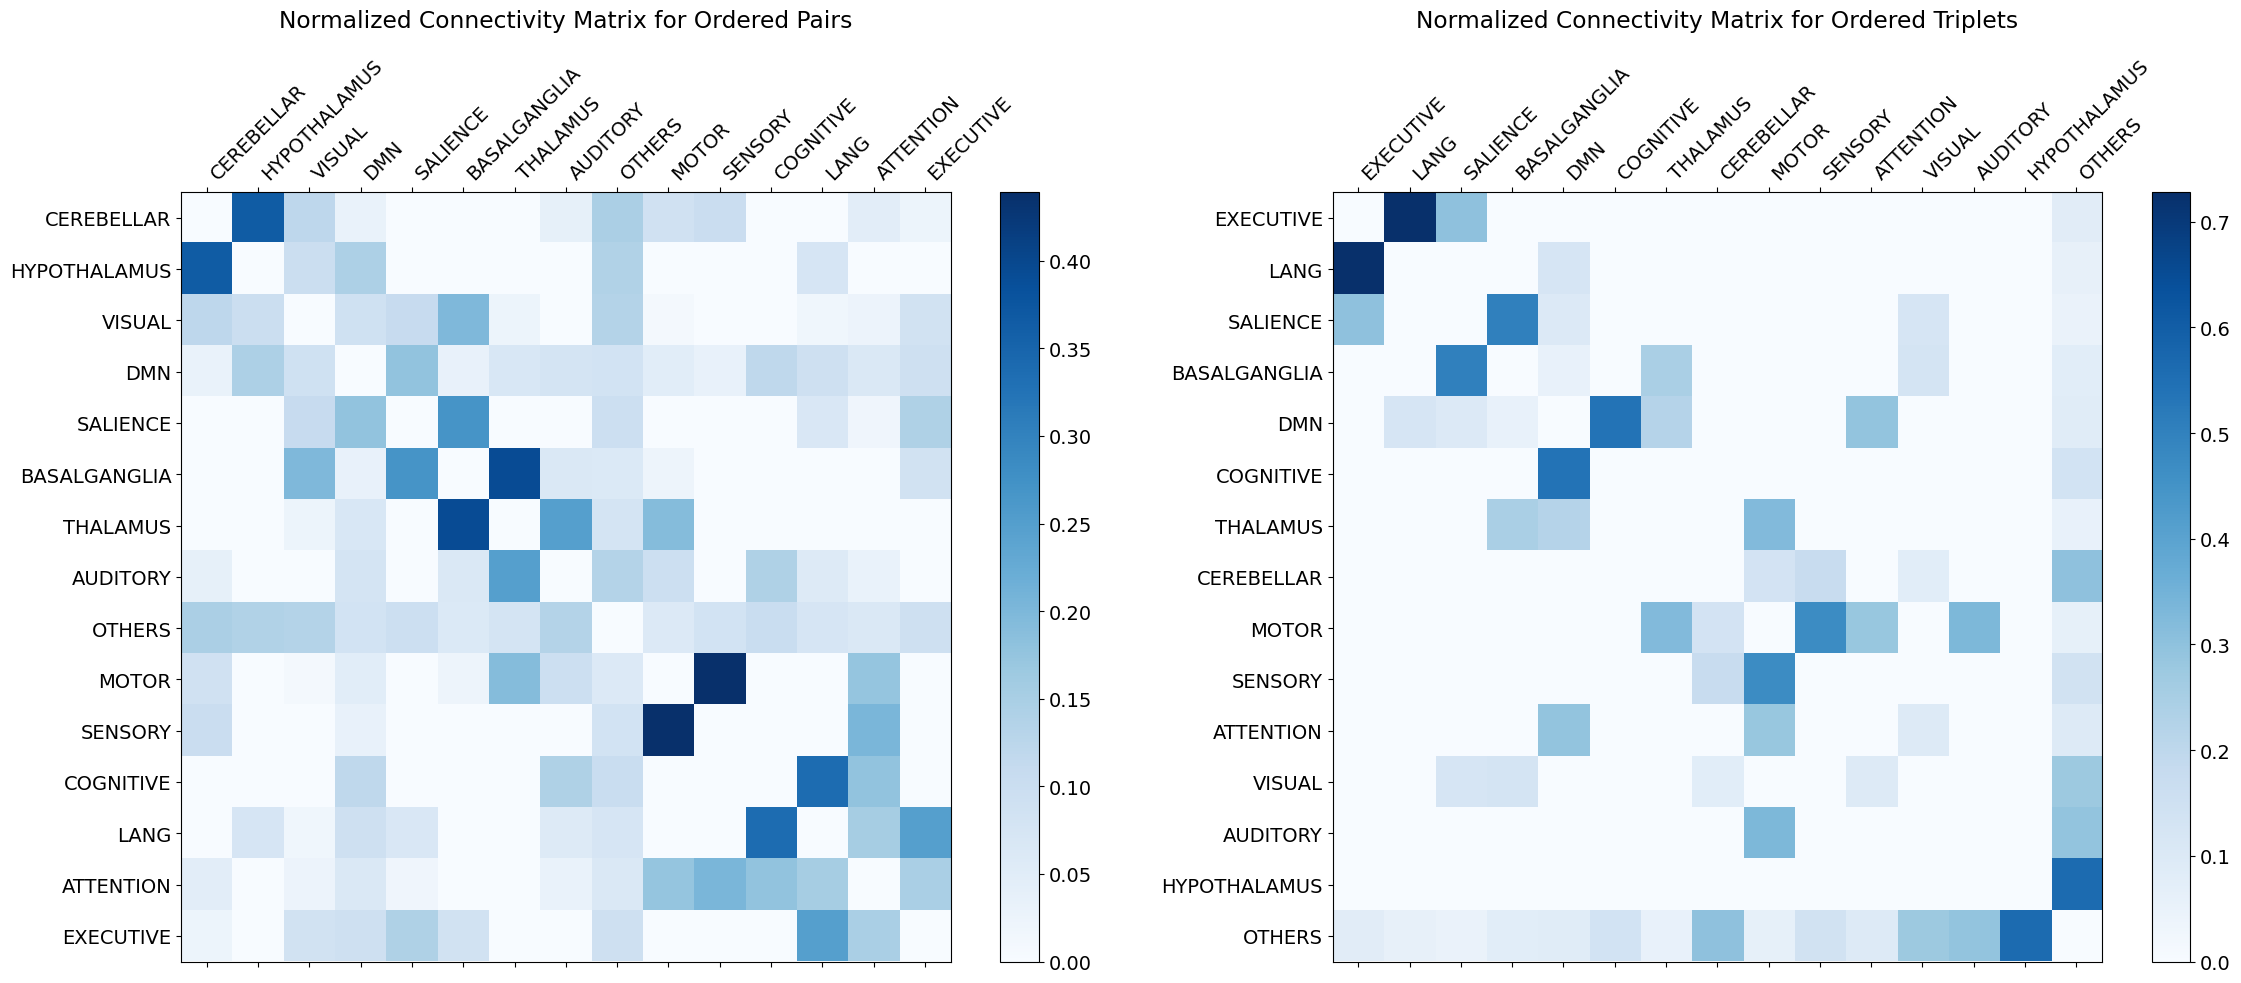

In [ ]:
#rewrite the plotting part, but wherever, normalized_matrix_ordered_pair is mentioned, replace it with reordered_avg_brain_regions_df_pair and replace all mentions of normalized_matrix_ordered_triplet with reordered_avg_brain_regions_df_triplet
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.tight_layout(pad=5.0)

# #Replace the diagonals with 1 for both the matrices
# for i in range(len(reordered_avg_brain_regions_df_pair.columns)):
#     reordered_avg_brain_regions_df_pair.iloc[i, i] = 1
#     reordered_avg_brain_regions_df_triplet.iloc[i, i] = 1


# Plot for ordered pairs
cax1 = axes[0].matshow(reordered_avg_brain_regions_df_pair, cmap='Blues')
plt.colorbar(cax1, ax=axes[0], orientation='vertical', fraction=0.045, pad=0.05)
axes[0].set_xticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_yticks(range(len(reordered_avg_brain_regions_df_pair.columns)))
axes[0].set_xticklabels(reordered_avg_brain_regions_df_pair.columns, rotation=45, ha='left')
axes[0].set_yticklabels(reordered_avg_brain_regions_df_pair.columns)
axes[0].set_title("Normalized Connectivity Matrix for Ordered Pairs", pad=20)

# Plot for ordered triplets
cax2 = axes[1].matshow(reordered_avg_brain_regions_df_triplet, cmap='Blues')
plt.colorbar(cax2, ax=axes[1], orientation='vertical', fraction=0.045, pad=0.05)
axes[1].set_xticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_yticks(range(len(reordered_avg_brain_regions_df_triplet.columns)))
axes[1].set_title("Normalized Connectivity Matrix for Ordered Triplets", pad=20)
axes[1].set_xticklabels(reordered_avg_brain_regions_df_triplet.columns, rotation=45, ha='left')
axes[1].set_yticklabels(reordered_avg_brain_regions_df_triplet.columns)

plt.show()



In [ ]:
def has_common_parent(matching_row, parent_network):
    # Split the parent networks in the matching row and strip whitespace
    matching_row_parents = [network.strip() for network in matching_row.split(',')]
    # Check if the parent network of the row is in the list
    return parent_network in matching_row_parents
def calculate_accuracy(data, prefix_size, sentence_length):
    """
    Calculate the accuracy based on the given prefix size.

    Args:
    data (DataFrame): The dataset containing the columns for symbols, label, parent network, and ICA order.
    prefix_size (int): The prefix size to be used for matching.

    Returns:
    float: The calculated accuracy.
    """

    # Determine the ICA order based on the prefix size
    # ica_order_map = {1: 20), 2: 20*int(0.4*sentence_length), 3: 20*int(0.6*sentence_length), 4: 20*int(0.8*sentence_length)}
    #Just map 1 to 20, 2 to 40, 3 to 60, 4 to 80
    ica_order_map = {1:20, 2: 40, 3: 60, 4: 80, 5: 100}
    target_ica_order = ica_order_map.get(prefix_size, None)

    if target_ica_order is None:
        raise ValueError("Invalid prefix size. Prefix size should be one of [1, 2, 3, 4, 5].")

    # Filter rows with ICA order 100
    ica_100_rows = data[data['ICA_order'] == 100]

    # The columns in the dataframe do not have explicit names, so we use the column indices
    column_names = data.columns[:int(prefix_size*(sentence_length/5))]

    # Initialize a list to store the percentages for each row with ICA 100
    percentages = []
    target_ica_rows = data[data['ICA_order'] == target_ica_order]
    # Iterate over each row in ica_100_rows
    for _, row in ica_100_rows.iterrows():
        # Get the values for the specified prefix size columns
        prefix_values = tuple(row[name] for name in column_names)

        # Filter rows with the target ICA order and the same prefix columns
        matching_rows = target_ica_rows[(target_ica_rows[list(column_names)] == prefix_values).all(axis=1)]

        # If there are no matching rows, continue to the next iteration
        if matching_rows.empty:
            continue

        # Calculate the percentage of labels with the same parent name
        # print("matching rows",matching_rows['parent_network'])
        # print("actual row",row['parent_network'])
        # The parent network of the given row
        single_parent_network = row['parent_network']

        # Count the number of matching rows that have a common parent network
        same_parent_count = matching_rows['parent_network'].apply(has_common_parent, args=(single_parent_network,)).sum()
        # same_parent_count = matching_rows['parent_network'].eq(row['parent_network']).sum()
        total_count = len(matching_rows)
        percentage = (same_parent_count / total_count) * 100
        percentages.append(percentage)

    # Calculate the overall accuracy for the entire dataset
    overall_accuracy = sum(percentages) / len(percentages) if percentages else 0

    return overall_accuracy

# Example usage of the function
# calculate_accuracy(data, 2) # This would give the result for prefix size 2, which we've already calculated


41.881996041775515
88.13551524710833
97.76699029126213
99.5685936151855


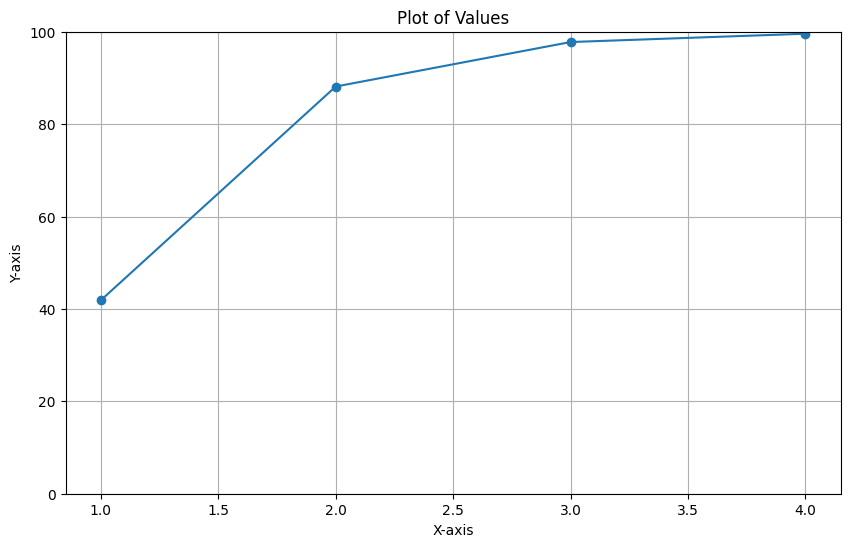

In [ ]:
file_path = 'corrected_table_sent_5_epoch_789_motsenexeattbastha_ICA_progressive_strict_assymmetry.csv'
import pandas as pd
# Reload the dataset without treating the first row as a header
data = pd.read_csv(file_path, header=None)

# Adding column names for clarity
data.columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Brain_Region_Label']

# data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in str(x)), 'OTHERS'))
data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))
data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))
# print(calculate_accuracy(data, 1, 5))
# print(calculate_accuracy(data, 2, 5))
# print(calculate_accuracy(data, 3, 5))
# print(calculate_accuracy(data, 4, 5))

import matplotlib.pyplot as plt
x_values = [1, 2, 3, 4]
y_values = [calculate_accuracy(data, 1, 5),calculate_accuracy(data, 2, 5),calculate_accuracy(data, 3, 5),calculate_accuracy(data, 4, 5)]
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')  # 'o' for circular markers

# Setting the y-axis range from 0 to 100
plt.ylim(0, 100)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Values')

# Show the plot
plt.grid(True)
plt.show()


62.79492670891186
77.05028575798174
82.52843399731347
94.09350524692495


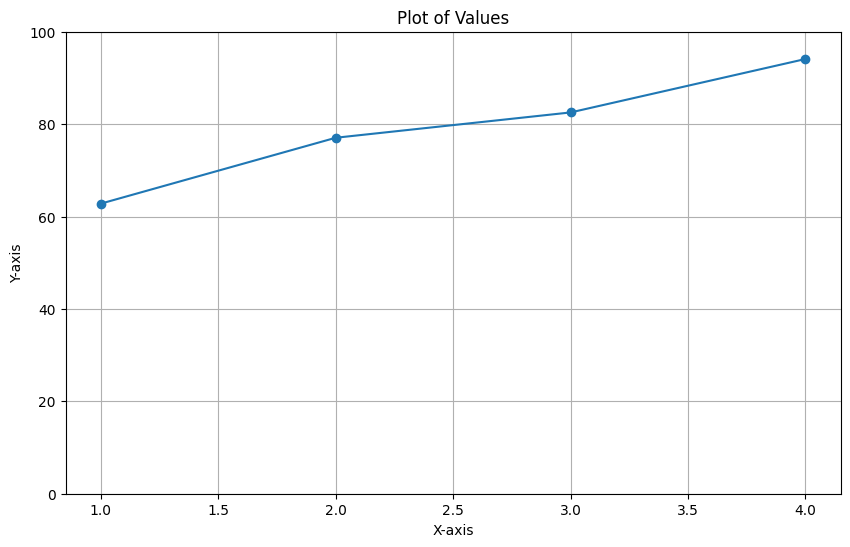

In [ ]:
file_path = 'corrected_table_sent_5_epoch_197_all_ICA_progressive_strict_assymmetry.csv'
import pandas as pd
# Reload the dataset without treating the first row as a header
data = pd.read_csv(file_path, header=None)

# Adding column names for clarity
data.columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Brain_Region_Label']

# data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in str(x)), 'OTHERS'))
data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))
data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))

y1 = calculate_accuracy(data, 1, 5)
print(y1)
y2 = calculate_accuracy(data, 2, 5)
print(y2)
y3 = calculate_accuracy(data, 3, 5)
print(y3)
y4 = calculate_accuracy(data, 4, 5)
print(y4)

import matplotlib.pyplot as plt
x_values = [1, 2, 3, 4]
y_values = [y1, y2, y3, y4]
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')  # 'o' for circular markers

# Setting the y-axis range from 0 to 100
plt.ylim(0, 100)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Values')

# Show the plot
plt.grid(True)
plt.show()


62.76947494898601
95.53357314148681
99.03846153846153
100.0


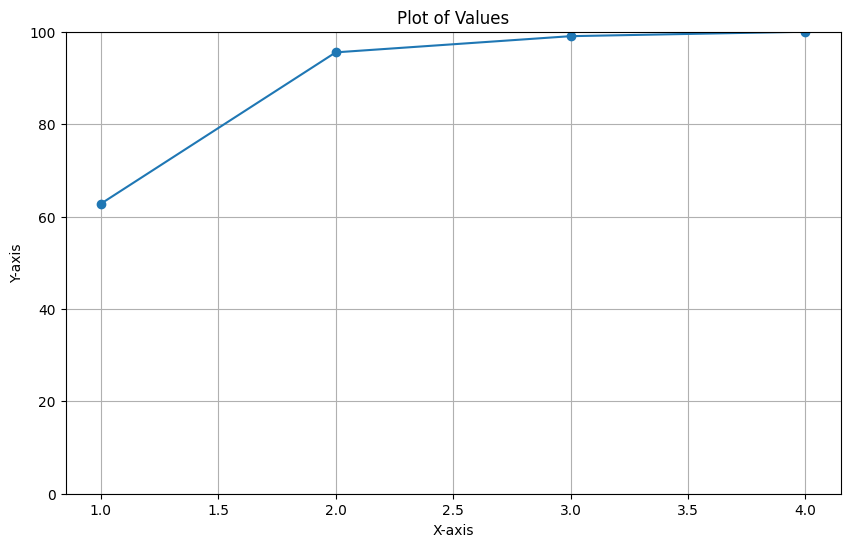

In [ ]:
file_path = 'corrected_vocab100_sent_10_epoch_360_all_ICA_progressive_strict.csv'
import pandas as pd
# Reload the dataset without treating the first row as a header
data = pd.read_csv(file_path, header=None)
sentence_length = 10
# Adding column names for clarity
# data.columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Brain_Region_Label']
#Instead of Col1, Col2, until Col5, it should go until sentence_length number of times, followed by the simple brain region label column
data.columns = ["Col" + str(i) for i in range(1, sentence_length + 1)] + ["Brain_Region_Label"]

# data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in str(x)), 'OTHERS'))
data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))
data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))


#Write y1, y2, y3, y4, again, but isntead of 5, write sentence length
y1 = calculate_accuracy(data, 1, sentence_length)
print(y1)
y2 = calculate_accuracy(data, 2, sentence_length)
print(y2)
y3 = calculate_accuracy(data, 3, sentence_length)
print(y3)
y4 = calculate_accuracy(data, 4, sentence_length)
print(y4)
import matplotlib.pyplot as plt
x_values = [1, 2, 3, 4]
y_values = [y1, y2, y3, y4]
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')  # 'o' for circular markers

# Setting the y-axis range from 0 to 100
plt.ylim(0, 100)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Values')

# Show the plot
plt.grid(True)
plt.show()


68.14629157664963
97.88235294117646
97.95918367346938
100.0


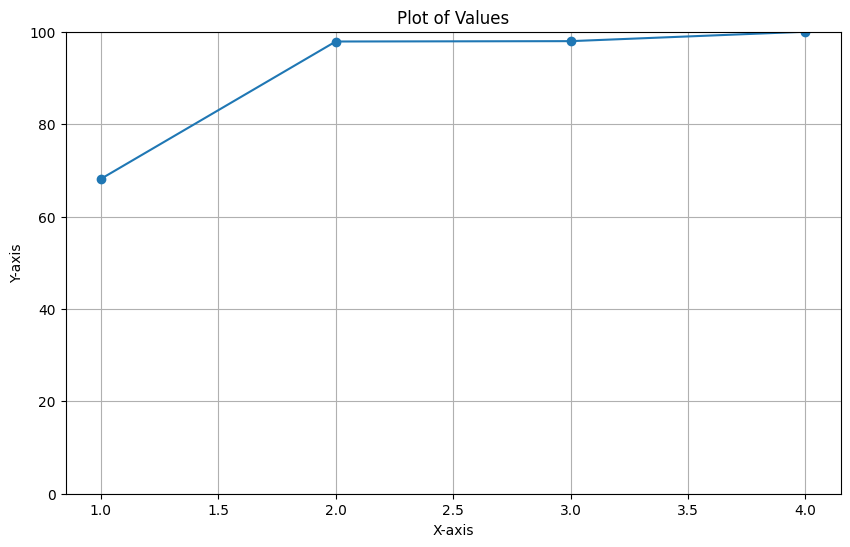

In [ ]:
file_path = 'corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv'
import pandas as pd
# Reload the dataset without treating the first row as a header
data = pd.read_csv(file_path, header=None)
sentence_length = 10
# Adding column names for clarity
# data.columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Brain_Region_Label']
#Instead of Col1, Col2, until Col5, it should go until sentence_length number of times, followed by the simple brain region label column
data.columns = ["Col" + str(i) for i in range(1, sentence_length + 1)] + ["Brain_Region_Label"]

# data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in str(x)), 'OTHERS'))
data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))
data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))


#Write y1, y2, y3, y4, again, but isntead of 5, write sentence length
y1 = calculate_accuracy(data, 1, sentence_length)
print(y1)
y2 = calculate_accuracy(data, 2, sentence_length)
print(y2)
y3 = calculate_accuracy(data, 3, sentence_length)
print(y3)
y4 = calculate_accuracy(data, 4, sentence_length)
print(y4)

import matplotlib.pyplot as plt
x_values = [1, 2, 3, 4]
y_values = [y1, y2, y3, y4]
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')  # 'o' for circular markers

# Setting the y-axis range from 0 to 100
plt.ylim(0, 100)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Values')

# Show the plot
plt.grid(True)
plt.show()


59.76013018870182
78.97627574064484
73.60449440832392
89.76548781010116


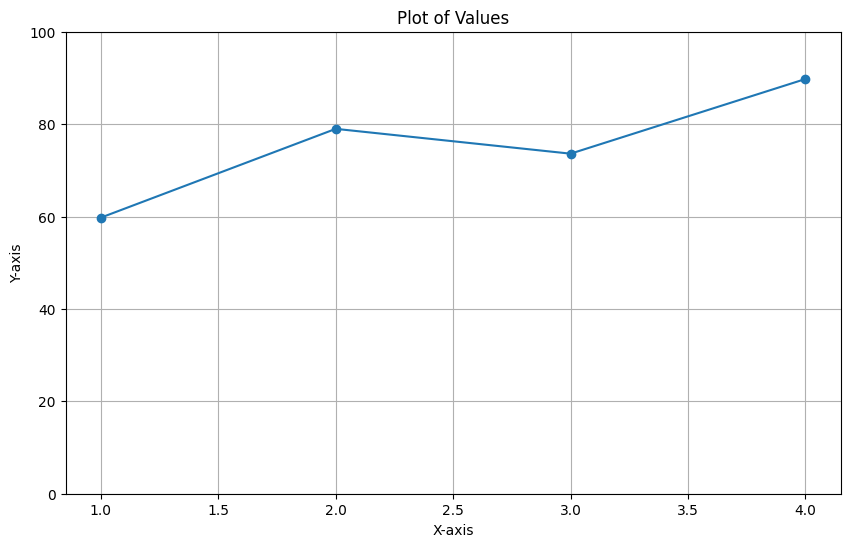

In [ ]:
file_path = 'corrected_vocab100_sent_5_epoch_1373_2040100_ICA_progressive_strict.csv'
import pandas as pd
# Reload the dataset without treating the first row as a header
data = pd.read_csv(file_path, header=None)
sentence_length = 5
# Adding column names for clarity
# data.columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Brain_Region_Label']
#Instead of Col1, Col2, until Col5, it should go until sentence_length number of times, followed by the simple brain region label column
data.columns = ["Col" + str(i) for i in range(1, sentence_length + 1)] + ["Brain_Region_Label"]

# data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in str(x)), 'OTHERS'))
data['parent_network'] = data.iloc[:, -1].apply(lambda x: next((k for k, v in newlabels_corrected.items() if k in x), 'OTHERS'))
data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))


#Write y1, y2, y3, y4, again, but isntead of 5, write sentence length
y1 = calculate_accuracy(data, 1, sentence_length)
print(y1)
y2 = calculate_accuracy(data, 2, sentence_length)
print(y2)
y3 = calculate_accuracy(data, 3, sentence_length)
print(y3)
y4 = calculate_accuracy(data, 4, sentence_length)
print(y4)

import matplotlib.pyplot as plt
x_values = [1, 2, 3, 4]
y_values = [y1, y2, y3, y4]
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')  # 'o' for circular markers

# Setting the y-axis range from 0 to 100
plt.ylim(0, 100)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Values')

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def find_parent_networks(cell_value):
    # Split the cell value by commas and strip whitespace
    parts = [part.strip() for part in cell_value.split(',')]
    # Find labels for each part
    labels = [next((k for k, v in newlabels_corrected.items() if k in part), 'OTHERS') for part in parts]
    # Remove duplicates and join them with comma
    unique_labels = ','.join(sorted(set(labels)))
    return unique_labels


def process_file(file_path, sentence_length, newlabels_corrected):
    # Load the data
    data = pd.read_csv(file_path, header=None)
    data.columns = ["Col" + str(i) for i in range(1, sentence_length + 1)] + ["Brain_Region_Label"]
    # Apply the function to each cell in the last column
    data['parent_network'] = data.iloc[:, -1].apply(find_parent_networks)
    data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))

    # Calculate accuracy
    y_values = [calculate_accuracy(data, i, sentence_length) for i in range(1, 5)]
    return y_values

[53.30850557932639, 75.5400587228753, 79.53933990303726, 92.60157671315947]
[65.92101219131729, 76.82837161133226, 91.16480793060717, 99.51328597737438]
[61.61172071381506, 77.71480645608425, 88.0897296837679, 99.35221710862734]


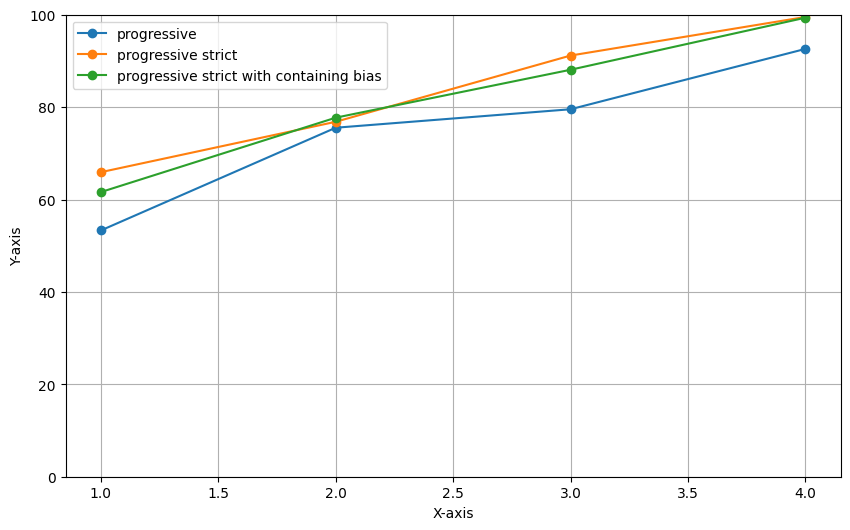

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 5

# Process each file
y_values1 = process_file('corrected_vocab100_sent_5_epoch_540_all_ICA_progressive.csv', sentence_length, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_vocab100_sent_5_epoch_728_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
print(y_values2)
y_values3 = process_file('corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values3)

# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
plt.plot(x_values, y_values3, marker='o', label='File 3')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive', 'progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

[62.76947494898601, 95.53357314148681, 99.03846153846153, 100.0]
[68.14629157664963, 97.88235294117646, 97.95918367346938, 100.0]


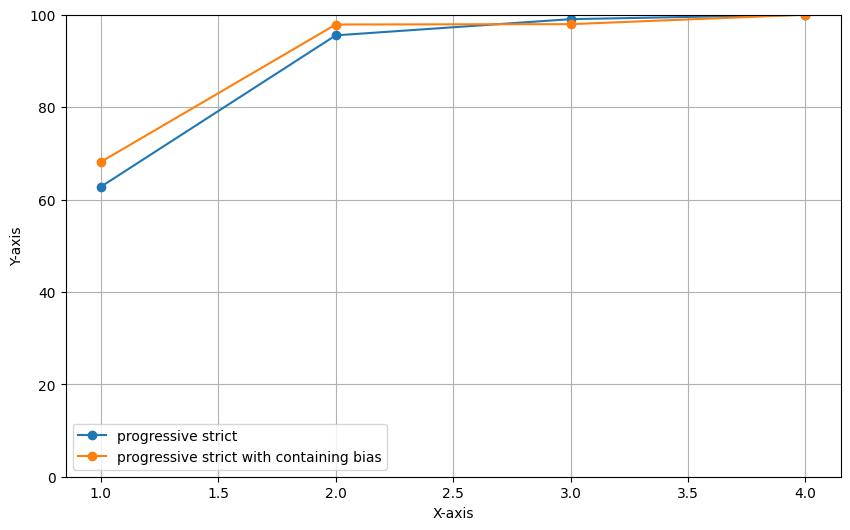

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 10

# Process each file
y_values1 = process_file('corrected_vocab100_sent_10_epoch_360_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values2)
# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
# plt.plot(x_values, y_values3, marker='o', label='File 3')
# plt.plot(x_values, y_values4, marker='o', label='File 4')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

[62.302721825629646, 89.2423379827308, 98.62542955326461, 100.0]


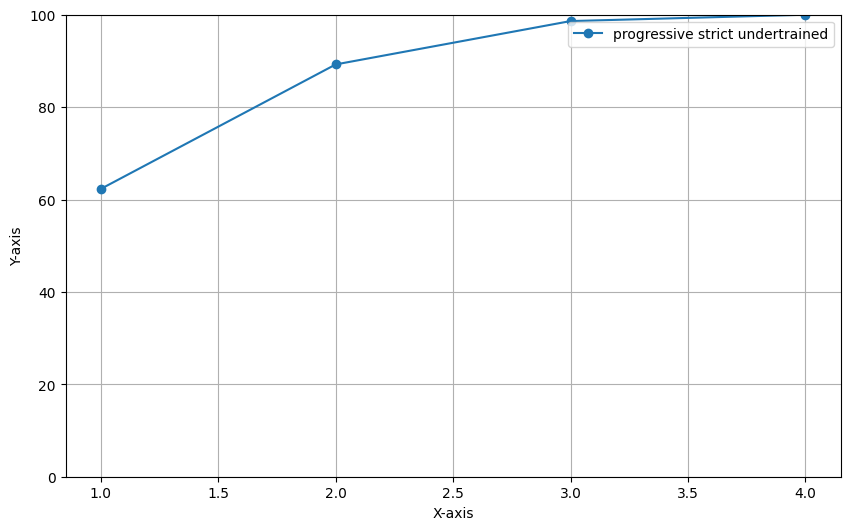

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 10

# Process each file
y_values1 = process_file('corrected_table_sent_10_epoch_171_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values1)
# y_values2 = process_file('corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
# print(y_values2)
# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
# plt.plot(x_values, y_values2, marker='o', label='File 2')
# plt.plot(x_values, y_values3, marker='o', label='File 3')
# plt.plot(x_values, y_values4, marker='o', label='File 4')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive strict undertrained'])

# Show the plot
plt.show()

In [ ]:
# prompt: What other type of analysis should I try doing?

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a TSNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit the model to the data
tsne_data = tsne.fit_transform(data)

# Plot the results
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=data['parent_network'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


1

[28.688759097434897, 50.185010008451044, 80.83493519329573, 97.34050019306432]
[39.882596342566124, 75.02941176470588, 97.95918367346938, 100.0]


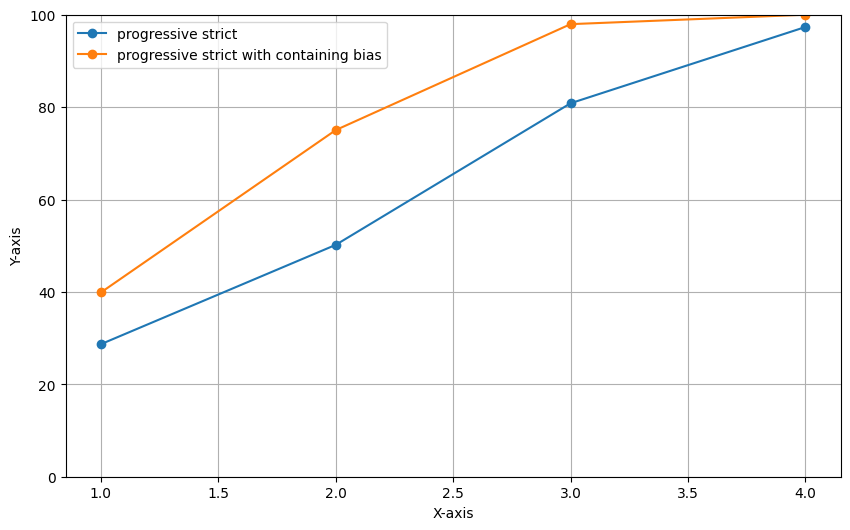

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 5

# Process each file
y_values1 = process_file('corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv', 5, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv', 10, newlabels_corrected)
print(y_values2)
# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
# plt.plot(x_values, y_values3, marker='o', label='File 3')
# plt.plot(x_values, y_values4, marker='o', label='File 4')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

[29.20407116297905, 73.19907012050477, 98.39633447880871, 100.0]
[24.425087816771306, 47.76508300323078, 63.4942032173488, 85.47639932660941]


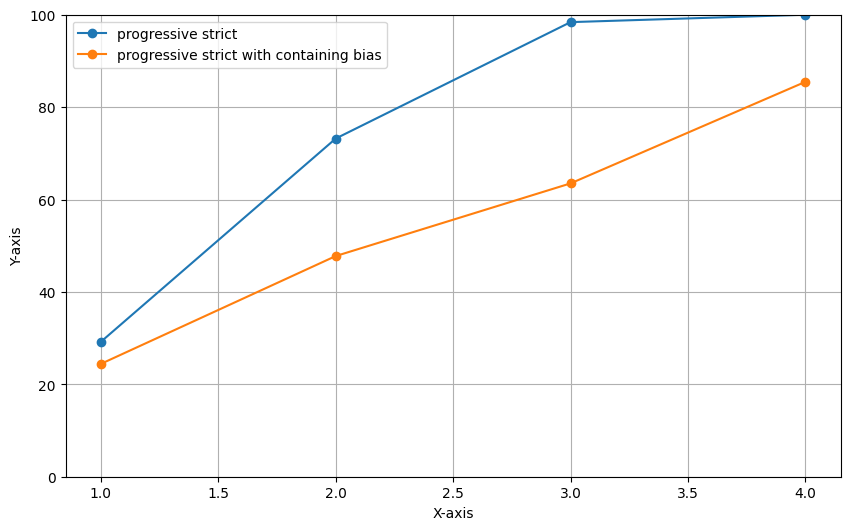

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 5

# Process each file
y_values1 = process_file('corrected_table_sent_10_epoch_171_all_ICA_progressive_strict_assymmetry.csv', 10, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_table_sent_5_epoch_197_all_ICA_progressive_strict_assymmetry.csv', 5, newlabels_corrected)
print(y_values2)
# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
# plt.plot(x_values, y_values3, marker='o', label='File 3')
# plt.plot(x_values, y_values4, marker='o', label='File 4')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

In [ ]:
newlabels_corrected

{'DMN': 0,
 'ATTENTION': 1,
 'MOTOR': 2,
 'VISUAL': 3,
 'EXECUTIVE': 4,
 'SENSORY': 5,
 'SALIENCE': 6,
 'AUDITORY': 7,
 'COGNITIVE': 8,
 'BASALGANGLIA': 9,
 'LANG': 10,
 'CEREBELLAR': 11,
 'HYPOTHALAMUS': 12,
 'THALAMUS': 13,
 'OTHERS': 14}

[20.489678994483423, 36.43287515423156, 60.774640189102364, 87.54591527332573]
[26.42219357586342, 49.14100150524575, 84.57284475128344, 98.21428571428572]
[28.688759097434897, 50.185010008451044, 80.83493519329573, 97.34050019306432]


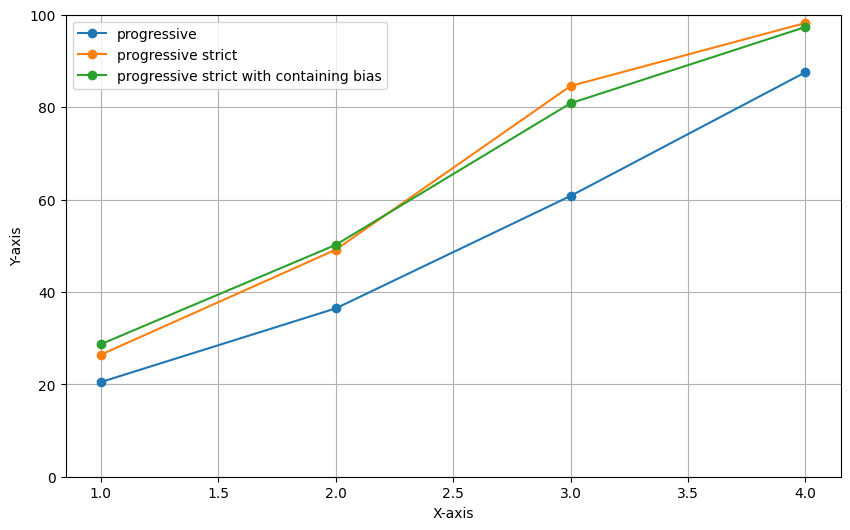

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 5

# Process each file
y_values1 = process_file('corrected_vocab100_sent_5_epoch_540_all_ICA_progressive.csv', sentence_length, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_vocab100_sent_5_epoch_728_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
print(y_values2)
y_values3 = process_file('corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values3)

# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
plt.plot(x_values, y_values3, marker='o', label='File 3')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive', 'progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

[32.637164806251675, 61.84652278177458, 97.11538461538461, 100.0]
[39.882596342566124, 75.02941176470588, 97.95918367346938, 100.0]


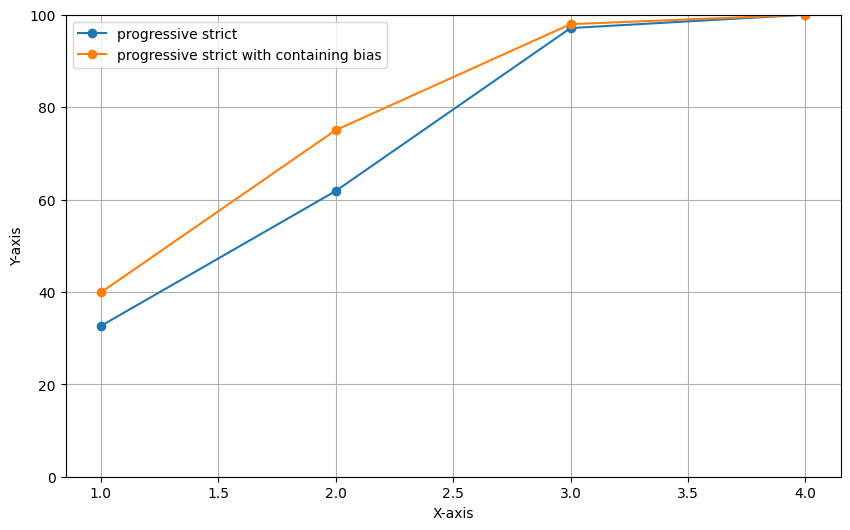

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 10

# Process each file
y_values1 = process_file('corrected_vocab100_sent_10_epoch_360_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values2)
# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
# plt.plot(x_values, y_values3, marker='o', label='File 3')
# plt.plot(x_values, y_values4, marker='o', label='File 4')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

In [ ]:
#CORRECTED
import pandas as pd
import matplotlib.pyplot as plt
def find_parent_networks(cell_value):
    # Split the cell value by commas and strip whitespace
    parts = [part.strip() for part in cell_value.split(',')]
    # Find labels for each part
    labels = [next((k for k, v in newlabels_corrected.items() if k in part), 'OTHERS') for part in parts]
    # Remove duplicates and join them with comma
    unique_labels = ','.join(sorted(set(labels)))
    return unique_labels


def process_file(file_path, sentence_length, newlabels_corrected):
    # Load the data
    data = pd.read_csv(file_path, header=None)
    data.columns = ["Col" + str(i) for i in range(1, sentence_length + 1)] + ["Brain_Region_Label"]
    # Apply the function to each cell in the last column
    data['parent_network'] = data.iloc[:, -1].apply(find_parent_networks)
    data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))

    # Calculate accuracy
    y_values = [calculate_accuracy(data, i, sentence_length) for i in range(1, 6)]
    return y_values
# #Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
# #Define sentence length
# sentence_length = 10

# # Process each file
# y_values1 = process_file('corrected_vocab100_sent_10_epoch_360_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
# print(y_values1)
# y_values2 = process_file('corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
# print(y_values2)
# # Create the plot
# plt.figure(figsize=(10, 6))
# x_values = [1, 2, 3, 4]

# # Plot each set of y_values
# plt.plot(x_values, y_values1, marker='o', label='File 1')
# plt.plot(x_values, y_values2, marker='o', label='File 2')
# # plt.plot(x_values, y_values3, marker='o', label='File 3')
# # plt.plot(x_values, y_values4, marker='o', label='File 4')

# # Setting plot details
# plt.ylim(0, 100)
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('')
# plt.grid(True)
# plt.legend(['progressive strict', 'progressive strict with containing bias'])

# # Show the plot
# plt.show()

[20.8416194955537, 37.60932332317061, 61.73492154735225, 87.54591527332573]
[26.744247470971924, 49.65918572427266, 84.67817312798725, 98.21428571428572]
[29.797981260468944, 51.05083504163197, 80.90842274698822, 97.34050019306432]


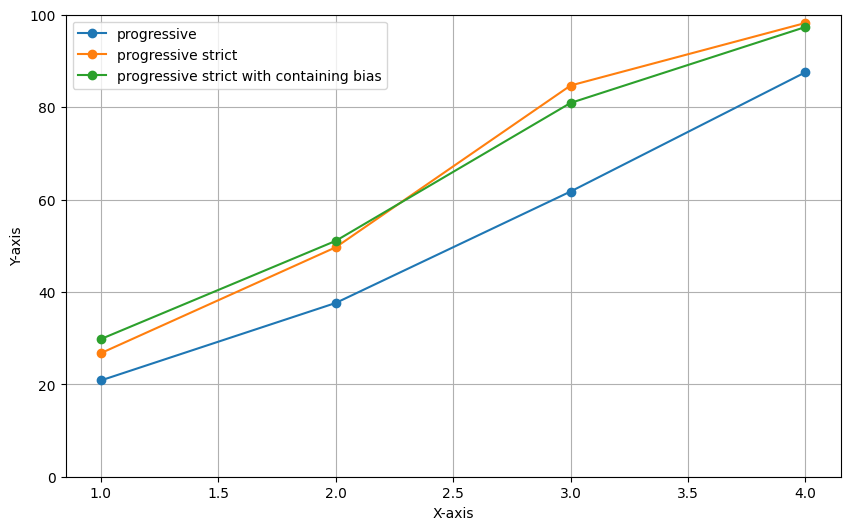

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 5

# Process each file
y_values1 = process_file('corrected_vocab100_sent_5_epoch_540_all_ICA_progressive.csv', sentence_length, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_vocab100_sent_5_epoch_728_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
print(y_values2)
y_values3 = process_file('corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values3)

# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
plt.plot(x_values, y_values3, marker='o', label='File 3')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive', 'progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

[33.138244001759084, 73.62605560299838, 98.39633447880871, 100.0]
[25.40859008047171, 49.10823579044464, 64.547453452965, 85.47639932660941]


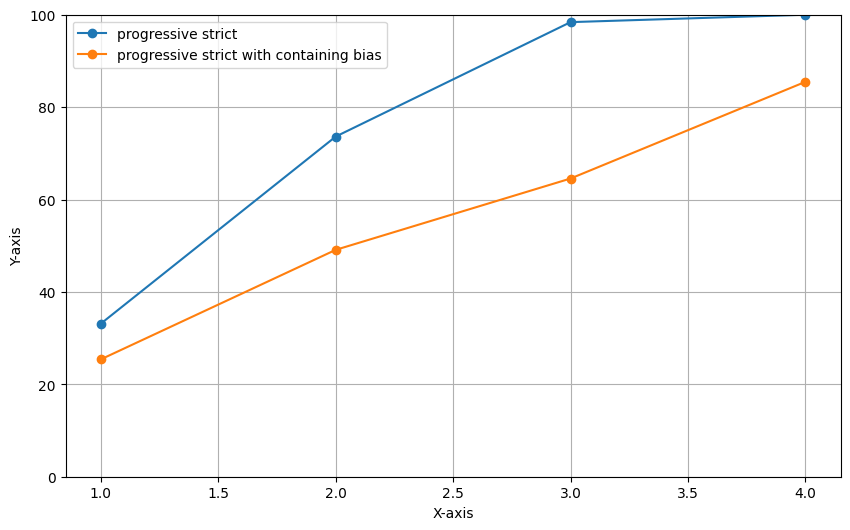

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 5

# Process each file
y_values1 = process_file('corrected_table_sent_10_epoch_171_all_ICA_progressive_strict_assymmetry.csv', 10, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_table_sent_5_epoch_197_all_ICA_progressive_strict_assymmetry.csv', 5, newlabels_corrected)
print(y_values2)
# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
# plt.plot(x_values, y_values3, marker='o', label='File 3')
# plt.plot(x_values, y_values4, marker='o', label='File 4')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

[43.525085226605505, 75.02941176470588, 97.95918367346938, 100.0]
[29.797981260468944, 51.05083504163197, 80.90842274698822, 97.34050019306432]


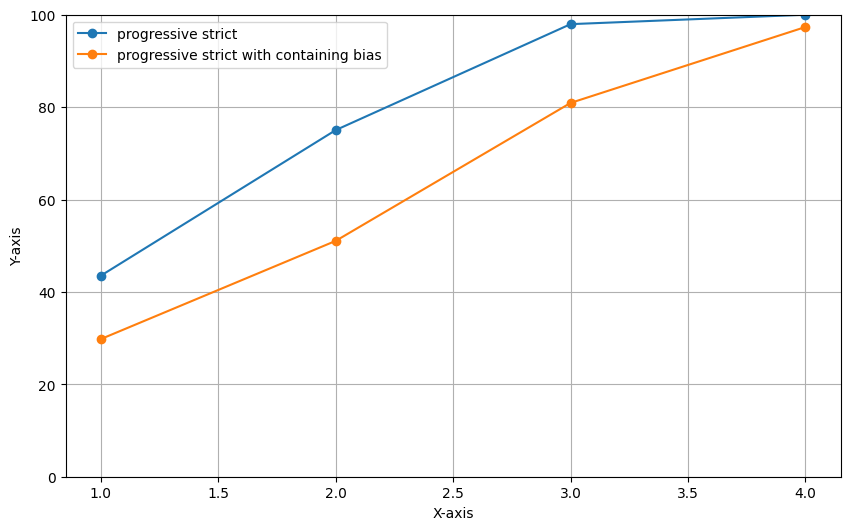

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 5

# Process each file
y_values1 = process_file('corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv', 10, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv', 5, newlabels_corrected)
print(y_values2)
# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
# plt.plot(x_values, y_values3, marker='o', label='File 3')
# plt.plot(x_values, y_values4, marker='o', label='File 4')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

[48.096101738707084, 88.39624398650065, 93.1556956152832, 98.13165389461776]
[41.881996041775515, 88.48054679284965, 97.76699029126213, 99.5685936151855]
[33.7675459043495, 69.9427301431103, 89.02086797579314, 95.10670595588891]
[29.797981260468944, 51.05083504163197, 80.90842274698822, 97.34050019306432]


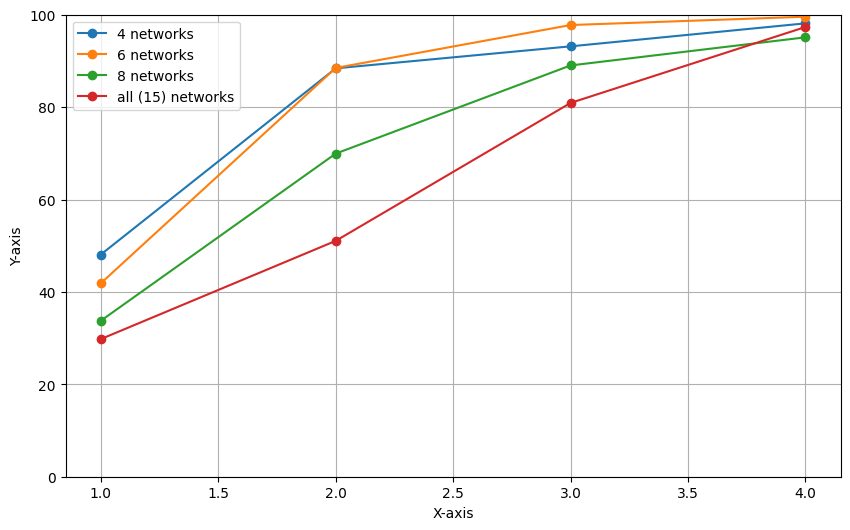

In [ ]:
# #Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
# #Define sentence length
# sentence_length = 5

# # Process each file
# y_values1 = process_file('corrected_table_sent_5_epoch_362_motsenexeatt_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
# print(y_values1)
# y_values2 = process_file('corrected_table_sent_5_epoch_789_motsenexeattbastha_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
# print(y_values2)
# y_values3 = process_file('corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
# print(y_values3)
# y_values4 = process_file('corrected_table_sent_5_epoch_386_motsenexeattbasthasalcer_ICA_progressive_strict_assymmetry_entropy.csv', sentence_length, newlabels_corrected)
# print(y_values4)
# # Create the plot
print(y_values1)
print(y_values2)
print(y_values4)
print(y_values3)

plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
plt.plot(x_values, y_values4, marker='o', label='File 4')
plt.plot(x_values, y_values3, marker='o', label='File 3')


# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['4 networks', '6 networks', '8 networks', 'all (15) networks'])

# Show the plot
plt.show()


[69.23084558990608, 78.42323651452283, 96.75675675675676, 100.0]


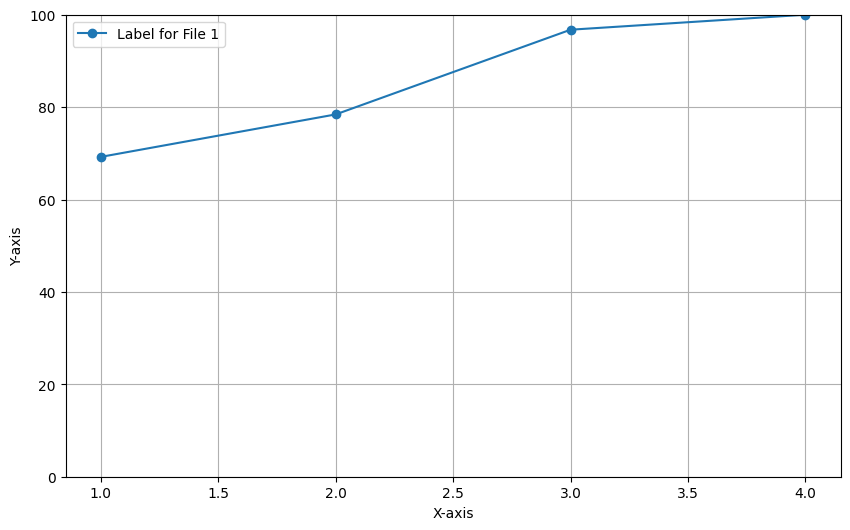

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def find_parent_networks(cell_value):
    # Split the cell value by commas and strip whitespace
    parts = [part.strip() for part in cell_value.split(',')]
    # Find labels for each part
    labels = [next((k for k, v in newlabels_corrected.items() if k in part), 'OTHERS') for part in parts]
    # Remove duplicates and join them with comma
    unique_labels = ','.join(sorted(set(labels)))
    return unique_labels

def process_file(file_path, sentence_length, newlabels_corrected):
    # Load the data
    data = pd.read_csv(file_path, header=None)
    data.columns = ["Col" + str(i) for i in range(1, sentence_length + 1)] + ["Brain_Region_Label"]
    # Apply the function to each cell in the last column
    data['parent_network'] = data.iloc[:, -1].apply(find_parent_networks)
    data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))

    # Calculate accuracy
    y_values = [calculate_accuracy(data, i, sentence_length) for i in range(1, 5)]
    return y_values

# Define sentence length
sentence_length = 10

# Process the specified file
y_values = process_file('corrected_table_sent_10_epoch_353_all_ICA_progressive.csv', sentence_length, newlabels_corrected)
print(y_values)

# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot the y_values
plt.plot(x_values, y_values, marker='o', label='File 1')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['Label for File 1'])

# Show the plot
plt.show()


[28.137344570446718, 50.66390041493776, 94.05405405405405, 100.0]
[43.525085226605505, 75.02941176470588, 97.95918367346938, 100.0]
[32.81202391892626, 62.68585131894484, 97.11538461538461, 100.0]


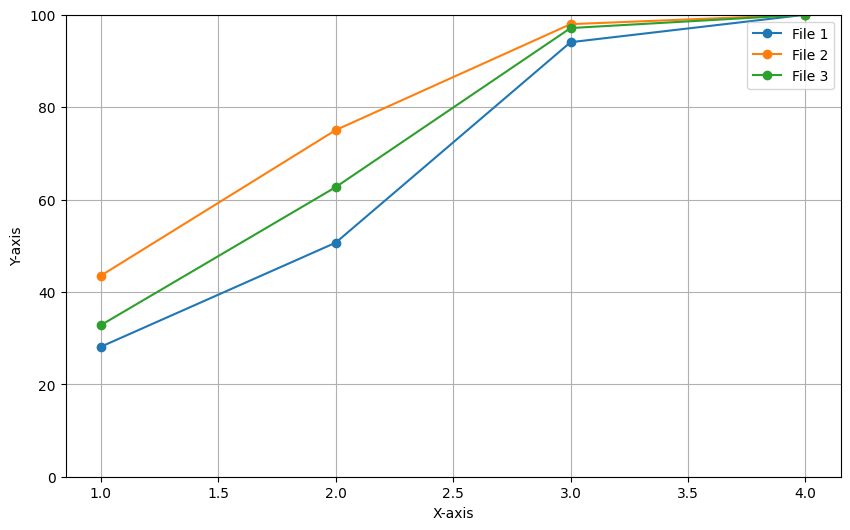

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def find_parent_networks(cell_value):
    # Split the cell value by commas and strip whitespace
    parts = [part.strip() for part in cell_value.split(',')]
    # Find labels for each part
    labels = [next((k for k, v in newlabels_corrected.items() if k in part), 'OTHERS') for part in parts]
    # Remove duplicates and join them with comma
    unique_labels = ','.join(sorted(set(labels)))
    return unique_labels

def process_file(file_path, sentence_length, newlabels_corrected):
    # Load the data
    data = pd.read_csv(file_path, header=None)
    data.columns = ["Col" + str(i) for i in range(1, sentence_length + 1)] + ["Brain_Region_Label"]
    # Apply the function to each cell in the last column
    data['parent_network'] = data.iloc[:, -1].apply(find_parent_networks)
    data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))

    # Calculate accuracy
    y_values = [calculate_accuracy(data, i, sentence_length) for i in range(1, 5)]
    return y_values

# Define sentence length
sentence_length = 10

# Process each file
y_values1 = process_file('corrected_table_sent_10_epoch_353_all_ICA_progressive.csv', sentence_length, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values2)
y_values3 = process_file('corrected_vocab100_sent_10_epoch_360_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
print(y_values3)


# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
plt.plot(x_values, y_values3, marker='o', label='File 3')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['File 1', 'File 2', 'File 3'])

# Show the plot
plt.show()


In [ ]:
#CORRECTED
import pandas as pd
import matplotlib.pyplot as plt
def find_parent_networks(cell_value):
    # Split the cell value by commas and strip whitespace
    parts = [part.strip() for part in cell_value.split(',')]
    # Find labels for each part
    labels = [next((k for k, v in newlabels_corrected.items() if k in part), 'OTHERS') for part in parts]
    # Remove duplicates and join them with comma
    unique_labels = ','.join(sorted(set(labels)))
    return unique_labels


def process_file(file_path, sentence_length, newlabels_corrected):
    # Load the data
    data = pd.read_csv(file_path, header=None)
    data.columns = ["Col" + str(i) for i in range(1, sentence_length + 1)] + ["Brain_Region_Label"]
    # Apply the function to each cell in the last column
    data['parent_network'] = data.iloc[:, -1].apply(find_parent_networks)
    data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))

    # Calculate accuracy
    y_values = [calculate_accuracy(data, i, sentence_length) for i in range(1, 5)]
    return y_values
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 10

# Process each file
y_values1 = process_file('corrected_vocab100_sent_10_epoch_360_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values2)
# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
# plt.plot(x_values, y_values3, marker='o', label='File 3')
# plt.plot(x_values, y_values4, marker='o', label='File 4')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()

[28.137344570446718, 50.66390041493776, 94.05405405405405, 100.0, 100.0]
[43.525085226605505, 75.02941176470588, 97.95918367346938, 100.0, 100.0]
[32.81202391892626, 62.68585131894484, 97.11538461538461, 100.0, 100.0]


ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

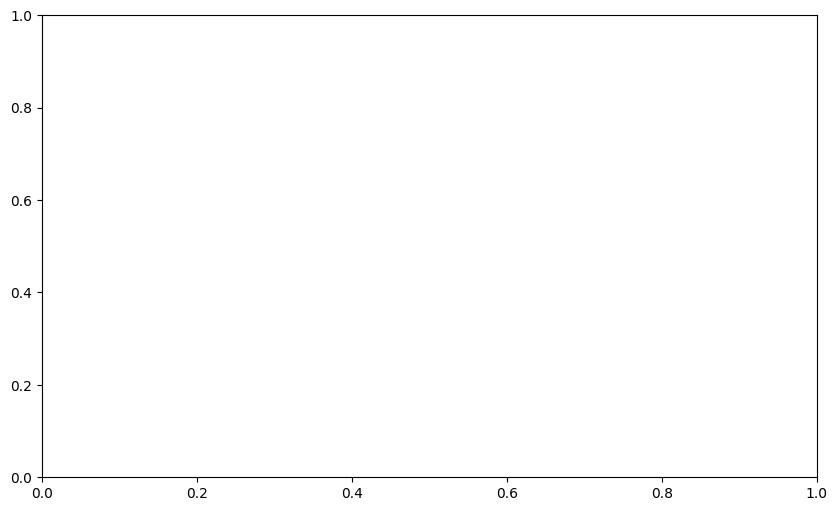

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def find_parent_networks(cell_value):
    # Split the cell value by commas and strip whitespace
    parts = [part.strip() for part in cell_value.split(',')]
    # Find labels for each part
    labels = [next((k for k, v in newlabels_corrected.items() if k in part), 'OTHERS') for part in parts]
    # Remove duplicates and join them with comma
    unique_labels = ','.join(sorted(set(labels)))
    return unique_labels

def process_file(file_path, sentence_length, newlabels_corrected):
    # Load the data
    data = pd.read_csv(file_path, header=None)
    data.columns = ["Col" + str(i) for i in range(1, sentence_length + 1)] + ["Brain_Region_Label"]
    # Apply the function to each cell in the last column
    data['parent_network'] = data.iloc[:, -1].apply(find_parent_networks)
    data['ICA_order'] = data.iloc[:, -2].apply(lambda x: int(x.split('ICA')[-1]))

    # Calculate accuracy
    y_values = [calculate_accuracy(data, i, sentence_length) for i in range(1, 6)]
    return y_values

# Define sentence length
sentence_length = 10

# Process each file
y_values1 = process_file('corrected_table_sent_10_epoch_353_all_ICA_progressive.csv', sentence_length, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_table_sent_10_epoch_171_222_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values2)
y_values3 = process_file('corrected_vocab100_sent_10_epoch_360_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
print(y_values3)


# Create the plot
plt.figure(figsize=(10, 6))
x_values = [1, 2, 3, 4]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
plt.plot(x_values, y_values3, marker='o', label='File 3')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['File 1', 'File 2', 'File 3'])

# Show the plot
plt.show()


[20.8416194955537, 37.60932332317061, 61.73492154735225, 87.54591527332573, 99.93465909090911]
[26.744247470971924, 49.65918572427266, 84.67817312798725, 98.21428571428572, 99.99431818181819]
[29.797981260468944, 51.05083504163197, 80.90842274698822, 97.34050019306432, 99.9324945887446]


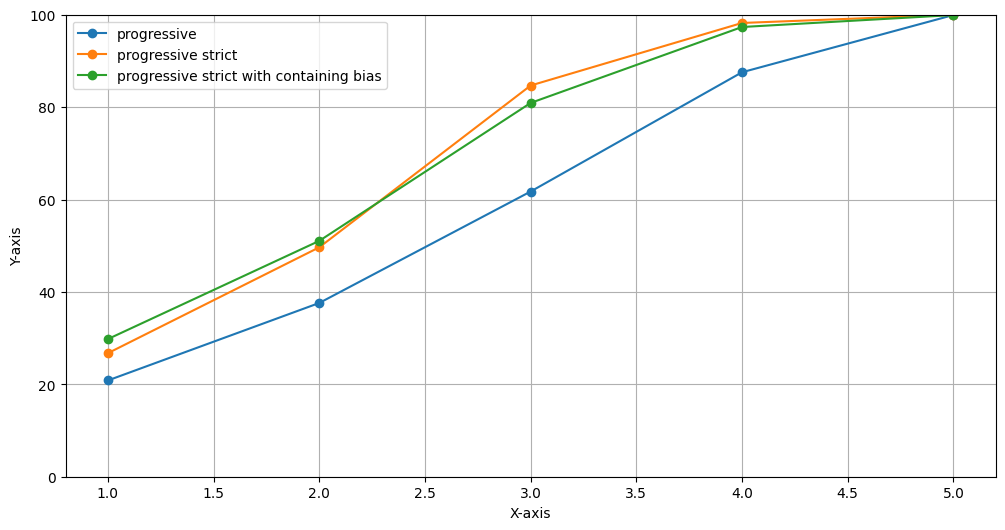

In [ ]:
#Compare parent-level accuracy of whole sentences with prefixes of different sizes accross multiple symbolic tables
#Define sentence length
sentence_length = 5

# Process each file
y_values1 = process_file('corrected_vocab100_sent_5_epoch_540_all_ICA_progressive.csv', sentence_length, newlabels_corrected)
print(y_values1)
y_values2 = process_file('corrected_vocab100_sent_5_epoch_728_all_ICA_progressive_strict.csv', sentence_length, newlabels_corrected)
print(y_values2)
y_values3 = process_file('corrected_table_sent_5_epoch_197_261_all_ICA_progressive_strict_assymmetry.csv', sentence_length, newlabels_corrected)
print(y_values3)

# Create the plot
plt.figure(figsize=(12, 6))
x_values = [1, 2, 3, 4, 5]

# Plot each set of y_values
plt.plot(x_values, y_values1, marker='o', label='File 1')
plt.plot(x_values, y_values2, marker='o', label='File 2')
plt.plot(x_values, y_values3, marker='o', label='File 3')

# Setting plot details
plt.ylim(0, 100)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')
plt.grid(True)
plt.legend(['progressive', 'progressive strict', 'progressive strict with containing bias'])

# Show the plot
plt.show()